In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
# Import charging output file from SUMO
df_output = pd.read_csv('charging_output.csv', delimiter=";")
df_output

C:\Users\joey_\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,step,charging_station,status,EV,watt_charged,current_battery,max_battery
0,0,hh1_ev1_homecs,not charging,NaN,NaN,NaN,NaN
1,0,hh1_ev3_homecs,not charging,NaN,NaN,NaN,NaN
2,0,hh1_ev4_homecs,not charging,NaN,NaN,NaN,NaN
3,0,hh1_ev5_homecs,not charging,NaN,NaN,NaN,NaN
4,0,hh1_ev7_homecs,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
202850,86400,hh16_ev132_public,not charging,NaN,NaN,NaN,NaN
202851,86400,hh16_ev133_public,not charging,NaN,NaN,NaN,NaN
202852,86400,hh16_ev134_public,not charging,NaN,NaN,NaN,NaN
202853,86400,hh16_ev135_public,not charging,NaN,NaN,NaN,NaN


# Home

In [3]:
# Make copy
df = df_output
df

,step,charging_station,status,EV,watt_charged,current_battery,max_battery
0,0,hh1_ev1_homecs,not charging,NaN,NaN,NaN,NaN
1,0,hh1_ev3_homecs,not charging,NaN,NaN,NaN,NaN
2,0,hh1_ev4_homecs,not charging,NaN,NaN,NaN,NaN
3,0,hh1_ev5_homecs,not charging,NaN,NaN,NaN,NaN
4,0,hh1_ev7_homecs,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
202850,86400,hh16_ev132_public,not charging,NaN,NaN,NaN,NaN
202851,86400,hh16_ev133_public,not charging,NaN,NaN,NaN,NaN
202852,86400,hh16_ev134_public,not charging,NaN,NaN,NaN,NaN
202853,86400,hh16_ev135_public,not charging,NaN,NaN,NaN,NaN


In [4]:
# Filter by charging steps of home charging stations only
df_home = df.loc[df['charging_station'].str.contains("homecs")]
df_home

,step,charging_station,status,EV,watt_charged,current_battery,max_battery
0,0,hh1_ev1_homecs,not charging,NaN,NaN,NaN,NaN
1,0,hh1_ev3_homecs,not charging,NaN,NaN,NaN,NaN
2,0,hh1_ev4_homecs,not charging,NaN,NaN,NaN,NaN
3,0,hh1_ev5_homecs,not charging,NaN,NaN,NaN,NaN
4,0,hh1_ev7_homecs,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
201791,86400,hh16_ev128_homecs,not charging,NaN,NaN,NaN,NaN
201792,86400,hh16_ev129_homecs,not charging,NaN,NaN,NaN,NaN
201793,86400,hh16_ev132_homecs,not charging,NaN,NaN,NaN,NaN
201794,86400,hh16_ev133_homecs,not charging,NaN,NaN,NaN,NaN


In [5]:
# Filter second auxiliary data table by charging events at home
df_home2 = df.loc[df['status'] == "charging"]
df_home2 = df_home2.loc[df_home2['charging_station'].str.contains("homecs")]
df_home2

,step,charging_station,status,EV,watt_charged,current_battery,max_battery
47759,20400,hh7_ev24_homecs,charging,HH_7_EV_24.0,1.94,9624.87,50000.0
49158,21000,hh7_ev24_homecs,charging,HH_7_EV_24.0,1.94,10791.54,50000.0
50557,21600,hh7_ev24_homecs,charging,HH_7_EV_24.0,1.94,11958.21,50000.0
51956,22200,hh7_ev24_homecs,charging,HH_7_EV_24.0,1.94,13124.87,50000.0
53355,22800,hh7_ev24_homecs,charging,HH_7_EV_24.0,1.94,14291.54,50000.0
...,...,...,...,...,...,...,...
114735,49200,hh1_ev25_homecs,charging,HH_1_EV_25.0,1.94,37568.46,41000.0
114841,49200,hh3_ev131_homecs,charging,HH_3_EV_131.0,1.94,39068.23,41000.0
116134,49800,hh1_ev25_homecs,charging,HH_1_EV_25.0,1.94,38735.13,41000.0
116240,49800,hh3_ev131_homecs,charging,HH_3_EV_131.0,1.94,40234.90,41000.0


In [6]:
# Filter third auxiliary data table by charging events at home
df_home3 = df.loc[df['status'] == "not charging"]
df_home3 = df_home3.loc[df_home3['charging_station'].str.contains("homecs")]
df_home3

,step,charging_station,status,EV,watt_charged,current_battery,max_battery
0,0,hh1_ev1_homecs,not charging,NaN,NaN,NaN,NaN
1,0,hh1_ev3_homecs,not charging,NaN,NaN,NaN,NaN
2,0,hh1_ev4_homecs,not charging,NaN,NaN,NaN,NaN
3,0,hh1_ev5_homecs,not charging,NaN,NaN,NaN,NaN
4,0,hh1_ev7_homecs,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
201791,86400,hh16_ev128_homecs,not charging,NaN,NaN,NaN,NaN
201792,86400,hh16_ev129_homecs,not charging,NaN,NaN,NaN,NaN
201793,86400,hh16_ev132_homecs,not charging,NaN,NaN,NaN,NaN
201794,86400,hh16_ev133_homecs,not charging,NaN,NaN,NaN,NaN


In [7]:
# Summarize steps of third auxiliary data table
df_home3 = df_home3.groupby(['step']).size().reset_index(name="count")
df_home3.head(60)

,step,count
0,0,340
1,600,340
2,1200,340
3,1800,340
4,2400,340
5,3000,340
6,3600,340
7,4200,340
8,4800,340
9,5400,340


In [8]:
# Summarize steps of second auxiliary data table
df_home2 = df_home2.groupby(['step']).size().reset_index(name="count")
df_home2

,step,count
0,20400,1
1,21000,1
2,21600,1
3,22200,1
4,22800,1
5,23400,13
6,24000,21
7,24600,18
8,25200,17
9,25800,17


In [9]:
# Summarize steps of data table 
df_home = df_home.groupby(['step']).size().reset_index(name="count")
df_home

,step,count
0,0,340
1,600,340
2,1200,340
3,1800,340
4,2400,340
...,...,...
140,84000,340
141,84600,340
142,85200,340
143,85800,340


In [10]:
# Get charging steps by substracting the number of non-charging steps
df_home['charging'] = df_home['count'] - df_home3['count']
df_home

,step,count,charging
0,0,340,0
1,600,340,0
2,1200,340,0
3,1800,340,0
4,2400,340,0
...,...,...,...
140,84000,340,0
141,84600,340,0
142,85200,340,0
143,85800,340,0


In [11]:
# Change time to hour units
df_home['charging'] = df_home['charging'] * 7
df_home["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
df_home.head(50)

,step,count,charging
0,06:00,340,0
1,06:10,340,0
2,06:20,340,0
3,06:30,340,0
4,06:40,340,0
5,06:50,340,0
6,07:00,340,0
7,07:10,340,0
8,07:20,340,0
9,07:30,340,0


In [12]:
# Sort by time
df_home = df_home.sort_values('step')
df_home

,step,count,charging
108,00:00,340,0
109,00:10,340,0
110,00:20,340,0
111,00:30,340,0
112,00:40,340,0
...,...,...,...
103,23:10,340,0
104,23:20,340,0
105,23:30,340,0
106,23:40,340,0


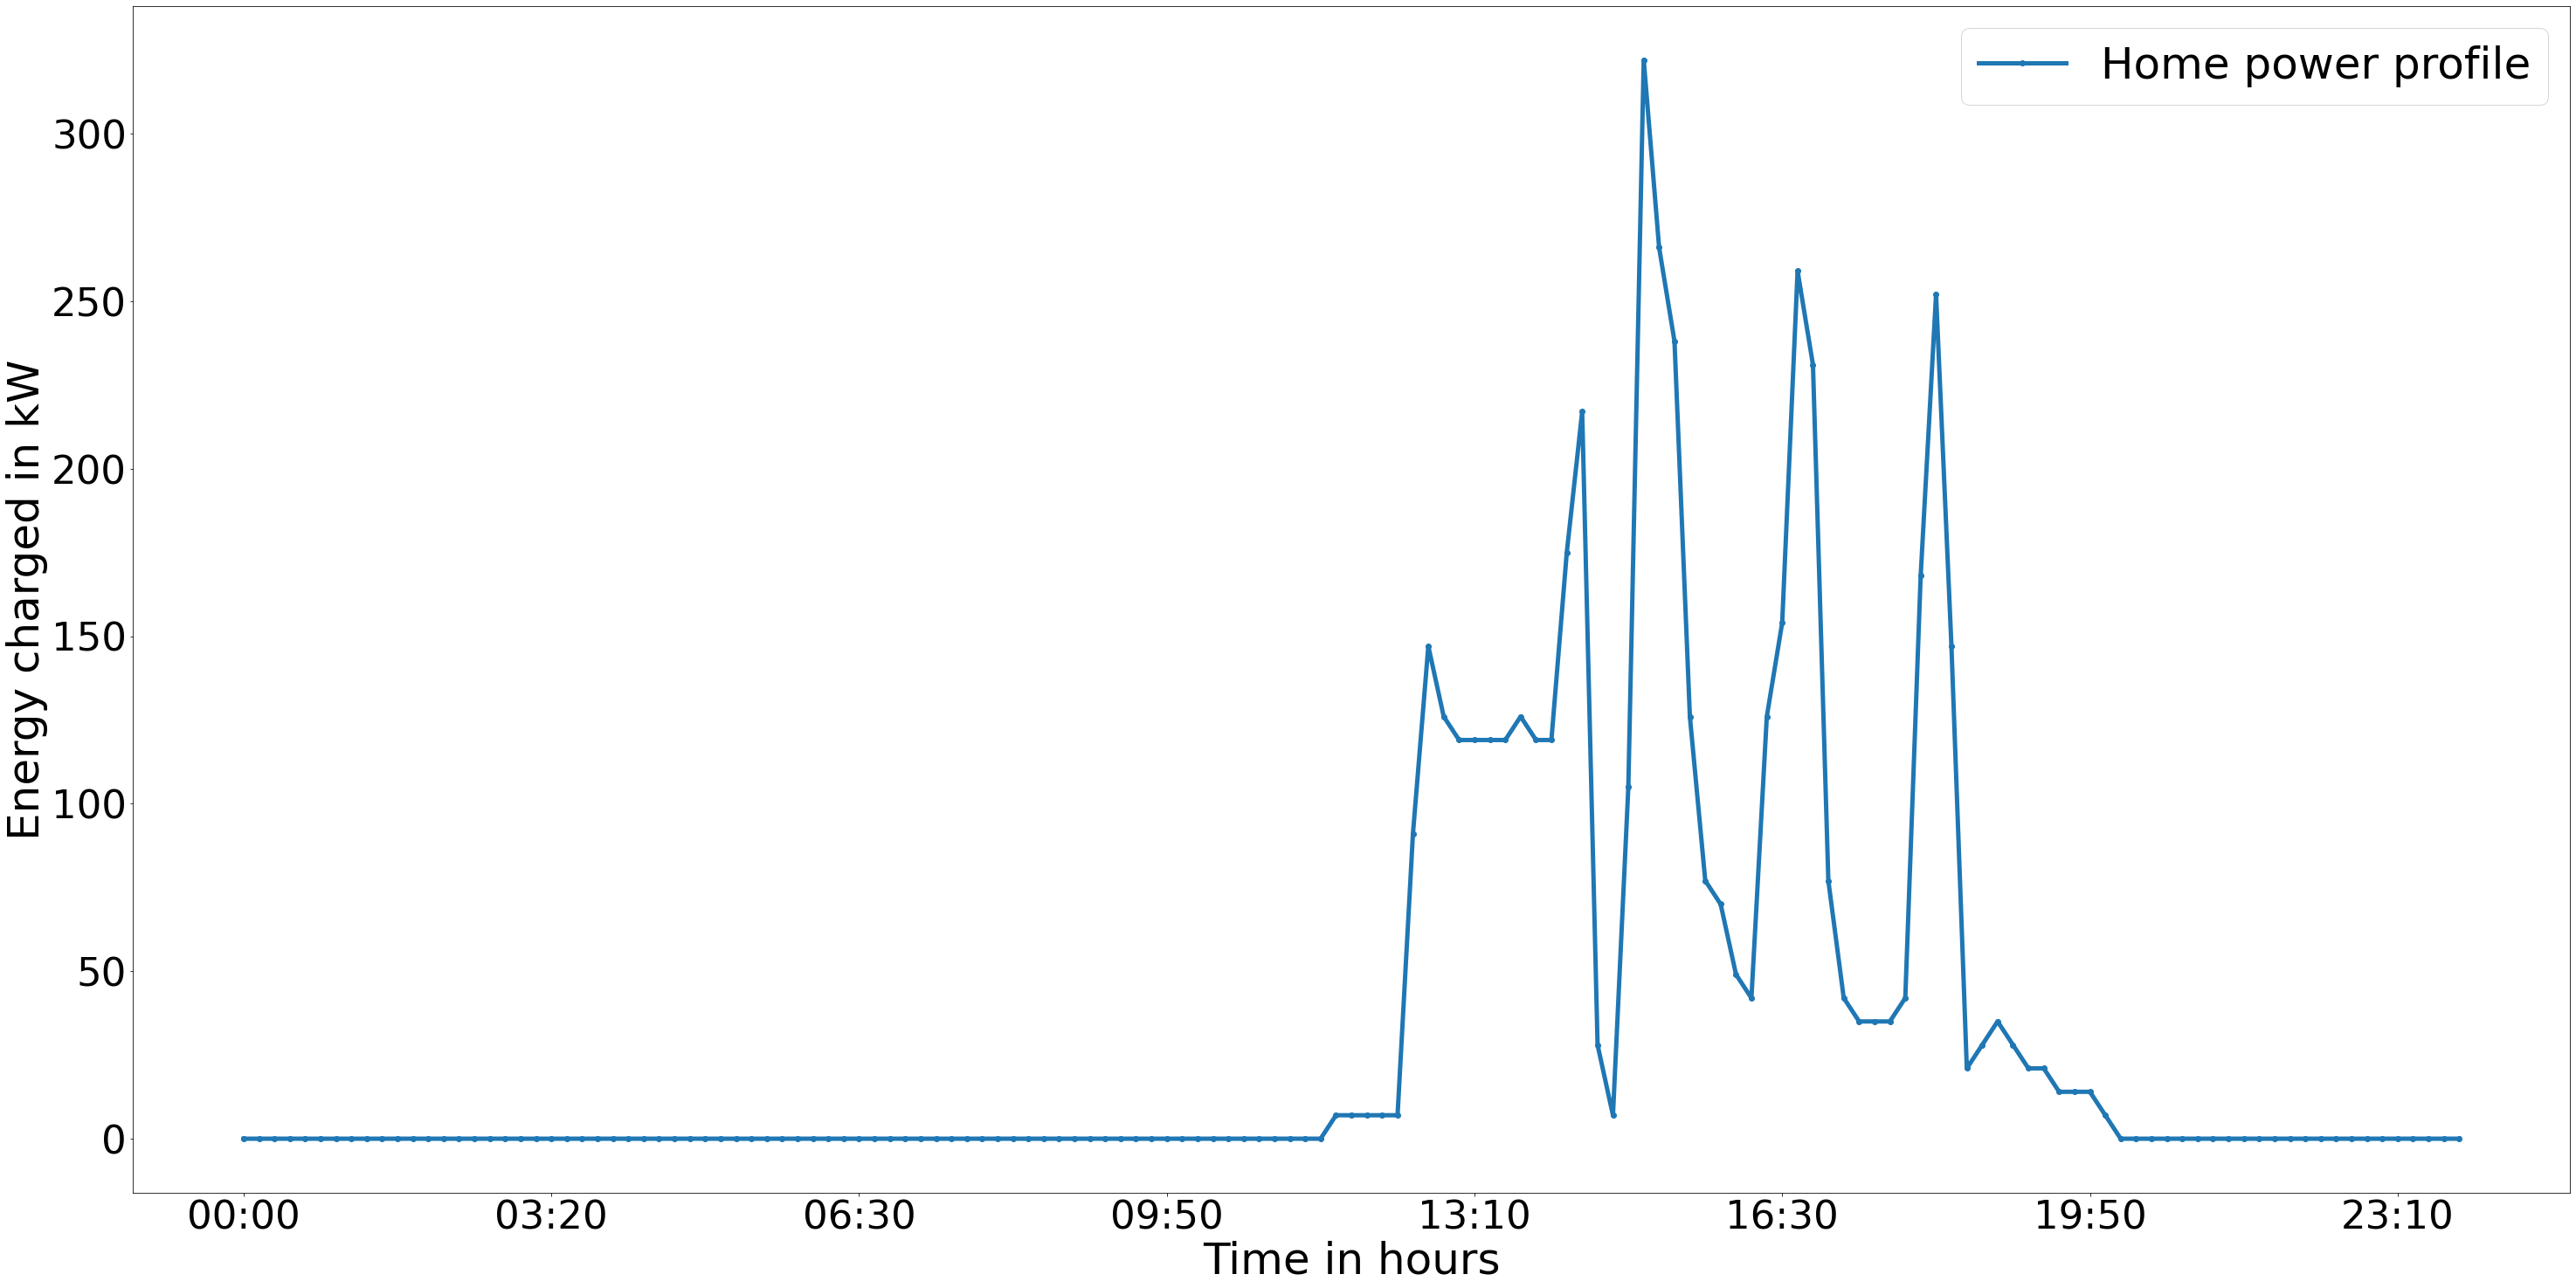

In [13]:
# Plot power profile of home
df_home.plot(x='step', y='charging', kind = 'line', lw = 5, style='o-', figsize=(50,25), fontsize=45)
plt.legend(['Home power profile'], fontsize=50)
plt.xlabel('Time in hours', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
plt.show()

In [14]:
df_home.describe()

,count,charging
count,145.0,145.000000
mean,340.0,32.875862
std,0.0,66.296669
min,340.0,0.000000
25%,340.0,0.000000
50%,340.0,0.000000
75%,340.0,28.000000
max,340.0,322.000000


In [16]:
# Setting for displaying all 145 rows
pd.set_option('display.max_rows', 145)

## Individual power profiles of the 16 household clusters (mostly not used in thesis) 

In [23]:
df_sum = df_output
df_sum

,step,charging_station,status,EV,watt_charged,current_battery,max_battery
0,0,hh1_ev1_homecs,not charging,NaN,NaN,NaN,NaN
1,0,hh1_ev3_homecs,not charging,NaN,NaN,NaN,NaN
2,0,hh1_ev4_homecs,not charging,NaN,NaN,NaN,NaN
3,0,hh1_ev5_homecs,not charging,NaN,NaN,NaN,NaN
4,0,hh1_ev7_homecs,not charging,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
202850,86400,hh16_ev132_public,not charging,NaN,NaN,NaN,NaN
202851,86400,hh16_ev133_public,not charging,NaN,NaN,NaN,NaN
202852,86400,hh16_ev134_public,not charging,NaN,NaN,NaN,NaN
202853,86400,hh16_ev135_public,not charging,NaN,NaN,NaN,NaN


In [24]:
# Get charging steps
df_sum = df_sum.loc[df_sum['status'] == "charging"]
df_sum 

,step,charging_station,status,EV,watt_charged,current_battery,max_battery
10529,4200,hh6_ev25_work,charging,HH_6_EV_25.0,1.94,6731.00,41000.0
11905,4800,hh6_ev2_work,charging,HH_6_EV_2.0,1.94,7077.07,41000.0
11920,4800,hh6_ev17_work,charging,HH_6_EV_17.0,1.94,7292.65,41000.0
11921,4800,hh6_ev18_work,charging,HH_6_EV_18.0,1.94,7449.49,41000.0
11923,4800,hh6_ev20_work,charging,HH_6_EV_20.0,1.94,7692.10,41000.0
...,...,...,...,...,...,...,...
114735,49200,hh1_ev25_homecs,charging,HH_1_EV_25.0,1.94,37568.46,41000.0
114841,49200,hh3_ev131_homecs,charging,HH_3_EV_131.0,1.94,39068.23,41000.0
116134,49800,hh1_ev25_homecs,charging,HH_1_EV_25.0,1.94,38735.13,41000.0
116240,49800,hh3_ev131_homecs,charging,HH_3_EV_131.0,1.94,40234.90,41000.0


In [25]:
# Get steps with respective household
df_sum1= df_sum[df_sum['charging_station'].str.contains("hh1_ev.*_homecs")]
df_sum1

,step,charging_station,status,EV,watt_charged,current_battery,max_battery
76970,33000,hh1_ev41_homecs,charging,HH_1_EV_41.0,1.94,40347.41,41000.0
76971,33000,hh1_ev42_homecs,charging,HH_1_EV_42.0,1.94,40373.59,41000.0
78344,33600,hh1_ev1_homecs,charging,HH_1_EV_1.0,1.94,39924.61,41000.0
78346,33600,hh1_ev4_homecs,charging,HH_1_EV_4.0,1.94,40844.35,41000.0
78349,33600,hh1_ev8_homecs,charging,HH_1_EV_8.0,1.94,40565.20,41000.0
78350,33600,hh1_ev9_homecs,charging,HH_1_EV_9.0,1.94,40324.02,41000.0
78351,33600,hh1_ev11_homecs,charging,HH_1_EV_11.0,1.94,40516.89,41000.0
78354,33600,hh1_ev15_homecs,charging,HH_1_EV_15.0,1.94,40082.65,41000.0
78356,33600,hh1_ev17_homecs,charging,HH_1_EV_17.0,1.94,40812.00,41000.0
78357,33600,hh1_ev18_homecs,charging,HH_1_EV_18.0,1.94,40616.12,41000.0


In [26]:
# Group by charging steps 
df_sum1 = df_sum1.groupby(['step']).size().reset_index(name="count")
df_sum1 = df_sum1.drop(range(5,30))
df_sum1

,step,count
0,33000,2
1,33600,19
2,34200,6
3,34800,2
4,35400,2


In [27]:
# Add kW unit
df_sum1['hh1_homecs'] = df_sum1['count'] * 7
df_sum1

,step,count,hh1_homecs
0,33000,2,14
1,33600,19,133
2,34200,6,42
3,34800,2,14
4,35400,2,14


In [28]:
# Drop irrelevant column
df_sum1 = df_sum1.drop(df_sum1.columns[[1]], axis=1)
df_sum1

,step,hh1_homecs
0,33000,14
1,33600,133
2,34200,42
3,34800,14
4,35400,14


In [29]:
# Assign start and end for better visualization
new_row1 = {'step':31800, 'hh1_homecs':0}
new_row2 = {'step':32400, 'hh1_homecs':0}
new_row3 = {'step':36000, 'hh1_homecs':0}
new_row4 = {'step':36600, 'hh1_homecs':0}


#append row to the dataframe
df_sum1 = df_sum1.append(new_row1, ignore_index=True)
df_sum1 = df_sum1.append(new_row2, ignore_index=True)
df_sum1 = df_sum1.append(new_row3, ignore_index=True)
df_sum1 = df_sum1.append(new_row4, ignore_index=True)
df_sum1

,step,hh1_homecs
0,33000,14
1,33600,133
2,34200,42
3,34800,14
4,35400,14
5,31800,0
6,32400,0
7,36000,0
8,36600,0


In [30]:
# Sort by steps
df_sum1 = df_sum1.sort_values('step')
df_sum1

,step,hh1_homecs
5,31800,0
6,32400,0
0,33000,14
1,33600,133
2,34200,42
3,34800,14
4,35400,14
7,36000,0
8,36600,0


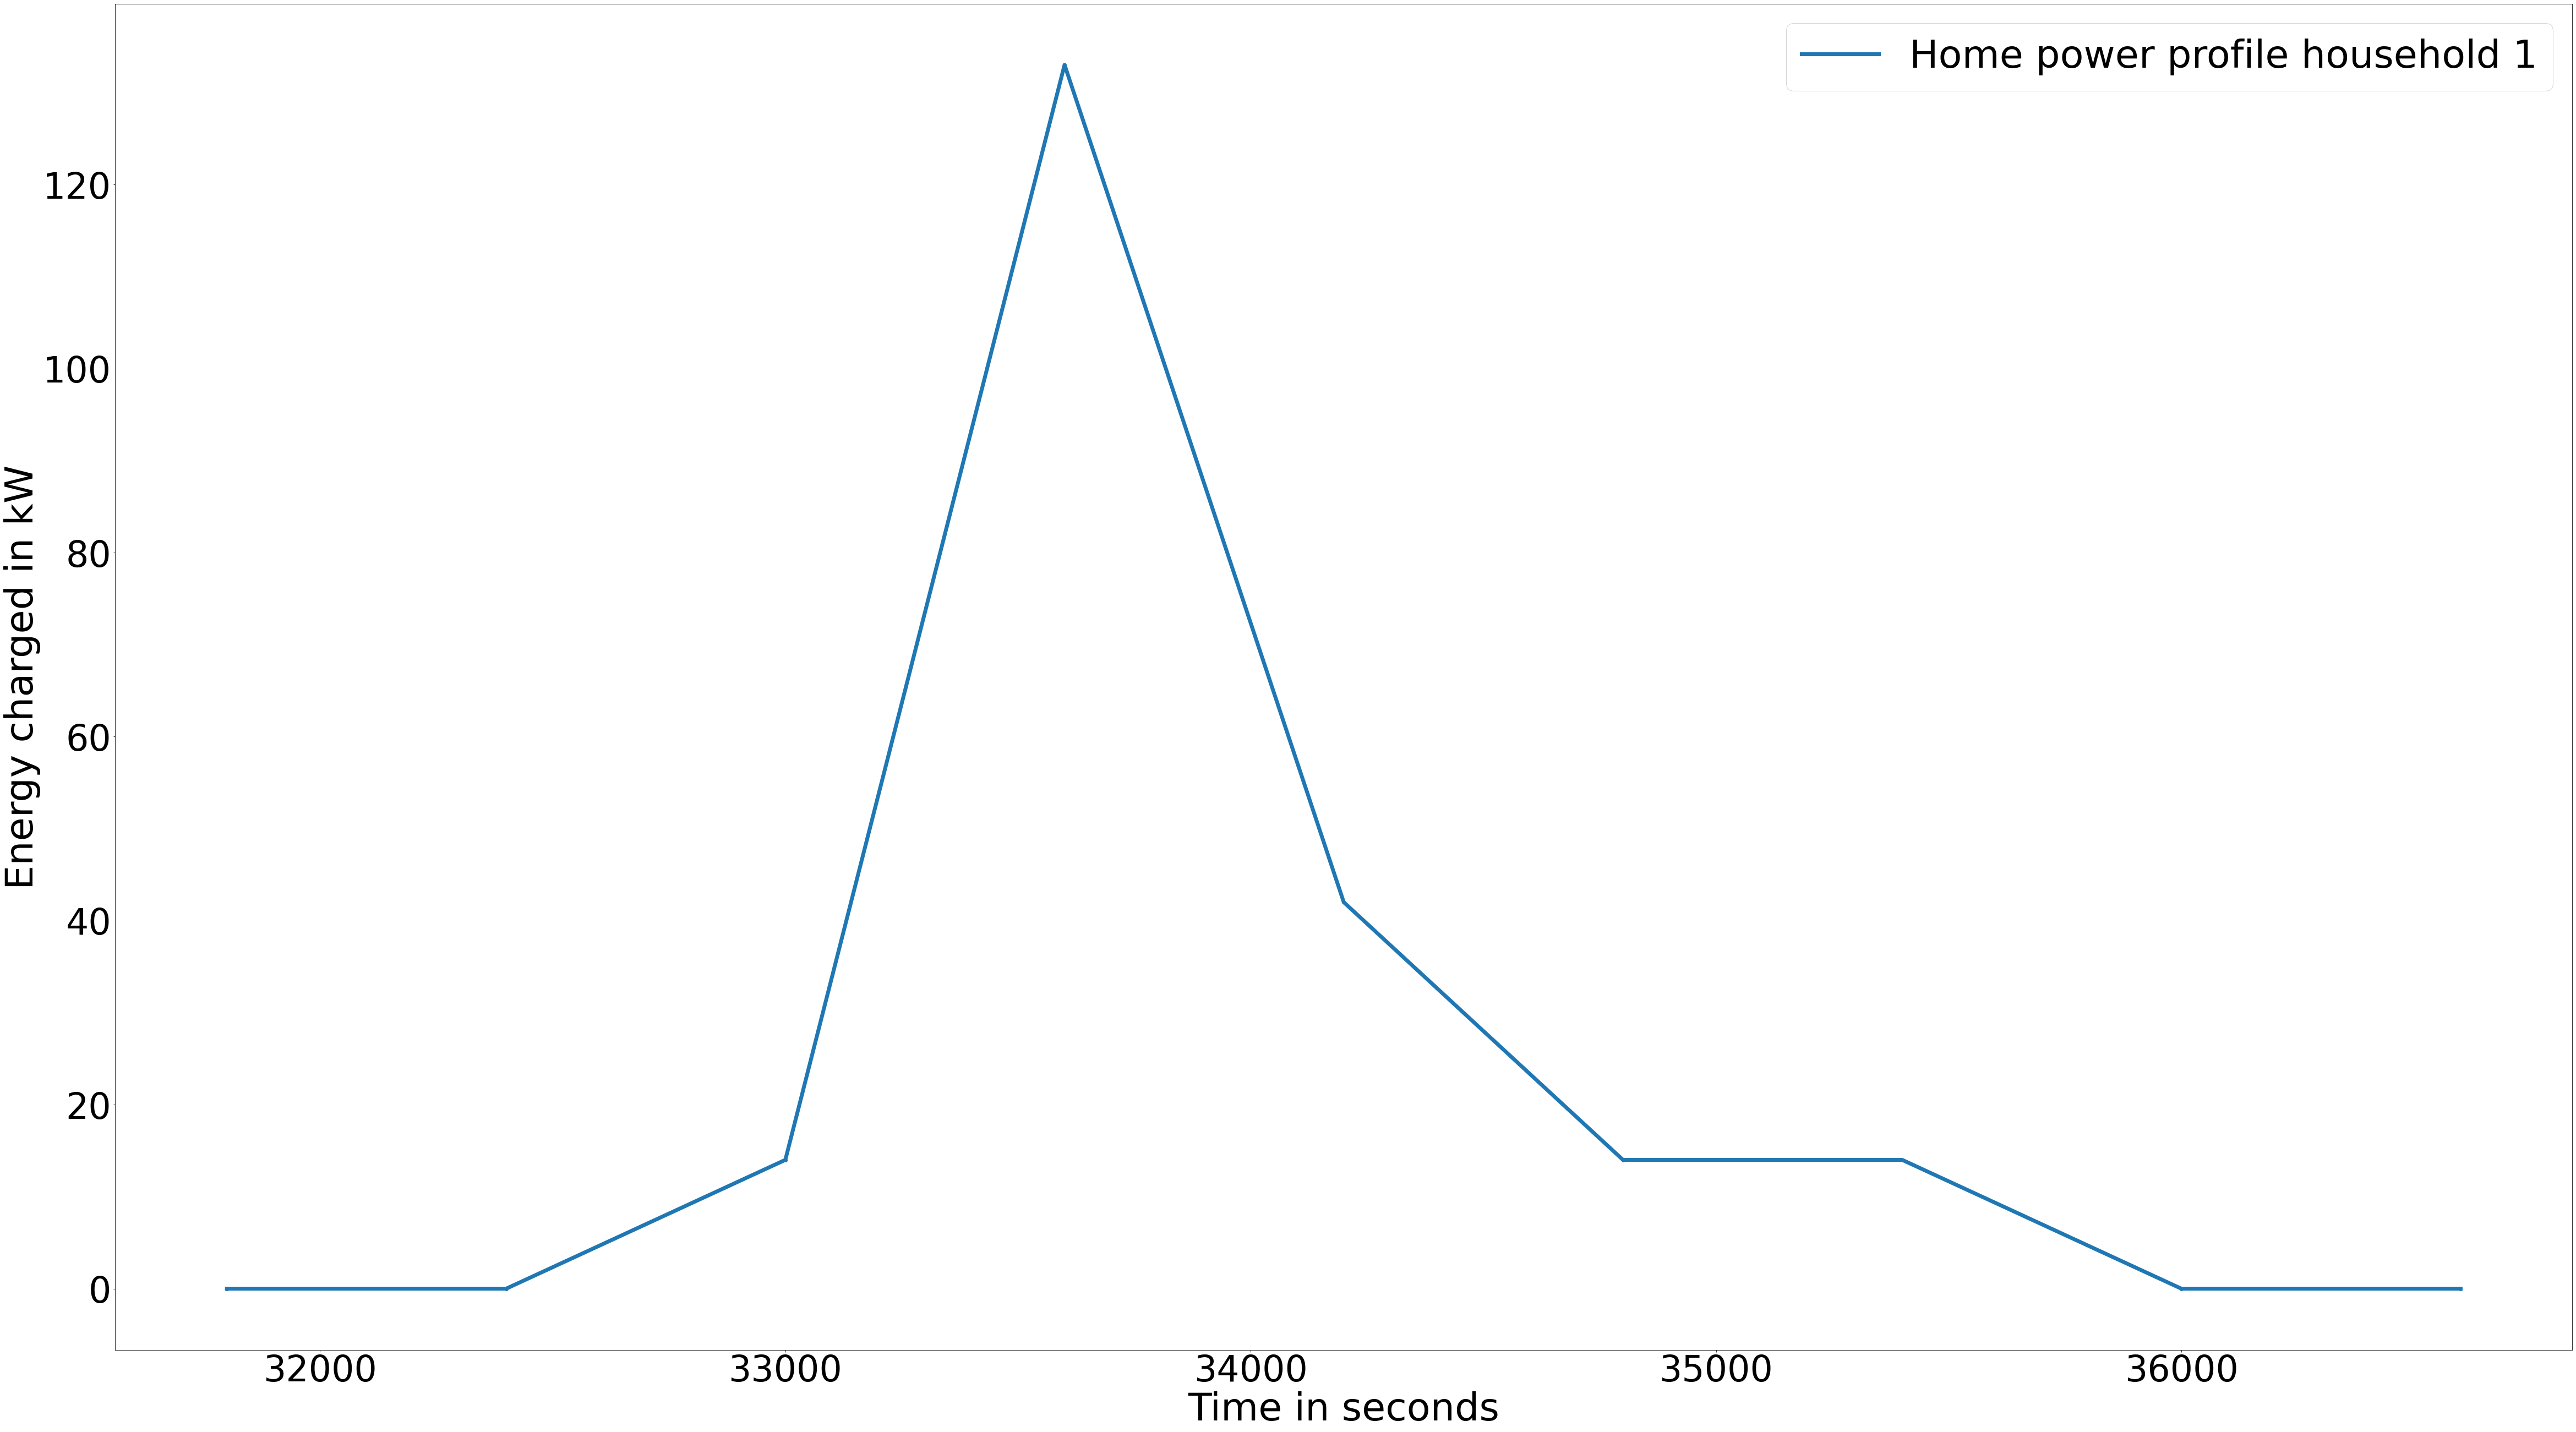

In [31]:
# Visualization of houseold power profile
df_sum1.plot(x ='step', y='hh1_homecs', kind = 'line', lw = 7, figsize=(80,45), fontsize=65, style='o-')
plt.legend(['Home power profile household 1'], fontsize=70)
plt.xlabel('Time in seconds', fontsize=70)
plt.ylabel('Energy charged in kW', fontsize=70)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

In [32]:
df_sum1 = df_sum1.groupby(['step'])
df_sum1

## The same process can be applied to the other households

In [33]:
df_sum2= df_sum[df_sum['charging_station'].str.contains("hh2_ev.*_homecs")]
df_sum2 = df_sum2.groupby(['step']).size().reset_index(name="count")
df_sum2['hh2_homecs'] = df_sum2['count'] * 7
df_sum2 = df_sum2.drop(df_sum2.columns[[1]], axis=1)
df_sum2

,step,hh2_homecs
0,38400,98
1,39000,91
2,39600,21


In [34]:
new_row1 = {'step':37800, 'hh2_homecs':0}
new_row2 = {'step':37200, 'hh2_homecs':0}
new_row3 = {'step':40200, 'hh2_homecs':0}
new_row4 = {'step':40800, 'hh2_homecs':0}
#append row to the dataframe
df_sum2 = df_sum2.append(new_row1, ignore_index=True)
df_sum2 = df_sum2.append(new_row2, ignore_index=True)
df_sum2 = df_sum2.append(new_row3, ignore_index=True)
df_sum2 = df_sum2.append(new_row4, ignore_index=True)
df_sum2 = df_sum2.sort_values('step')
df_sum2

,step,hh2_homecs
4,37200,0
3,37800,0
0,38400,98
1,39000,91
2,39600,21
5,40200,0
6,40800,0


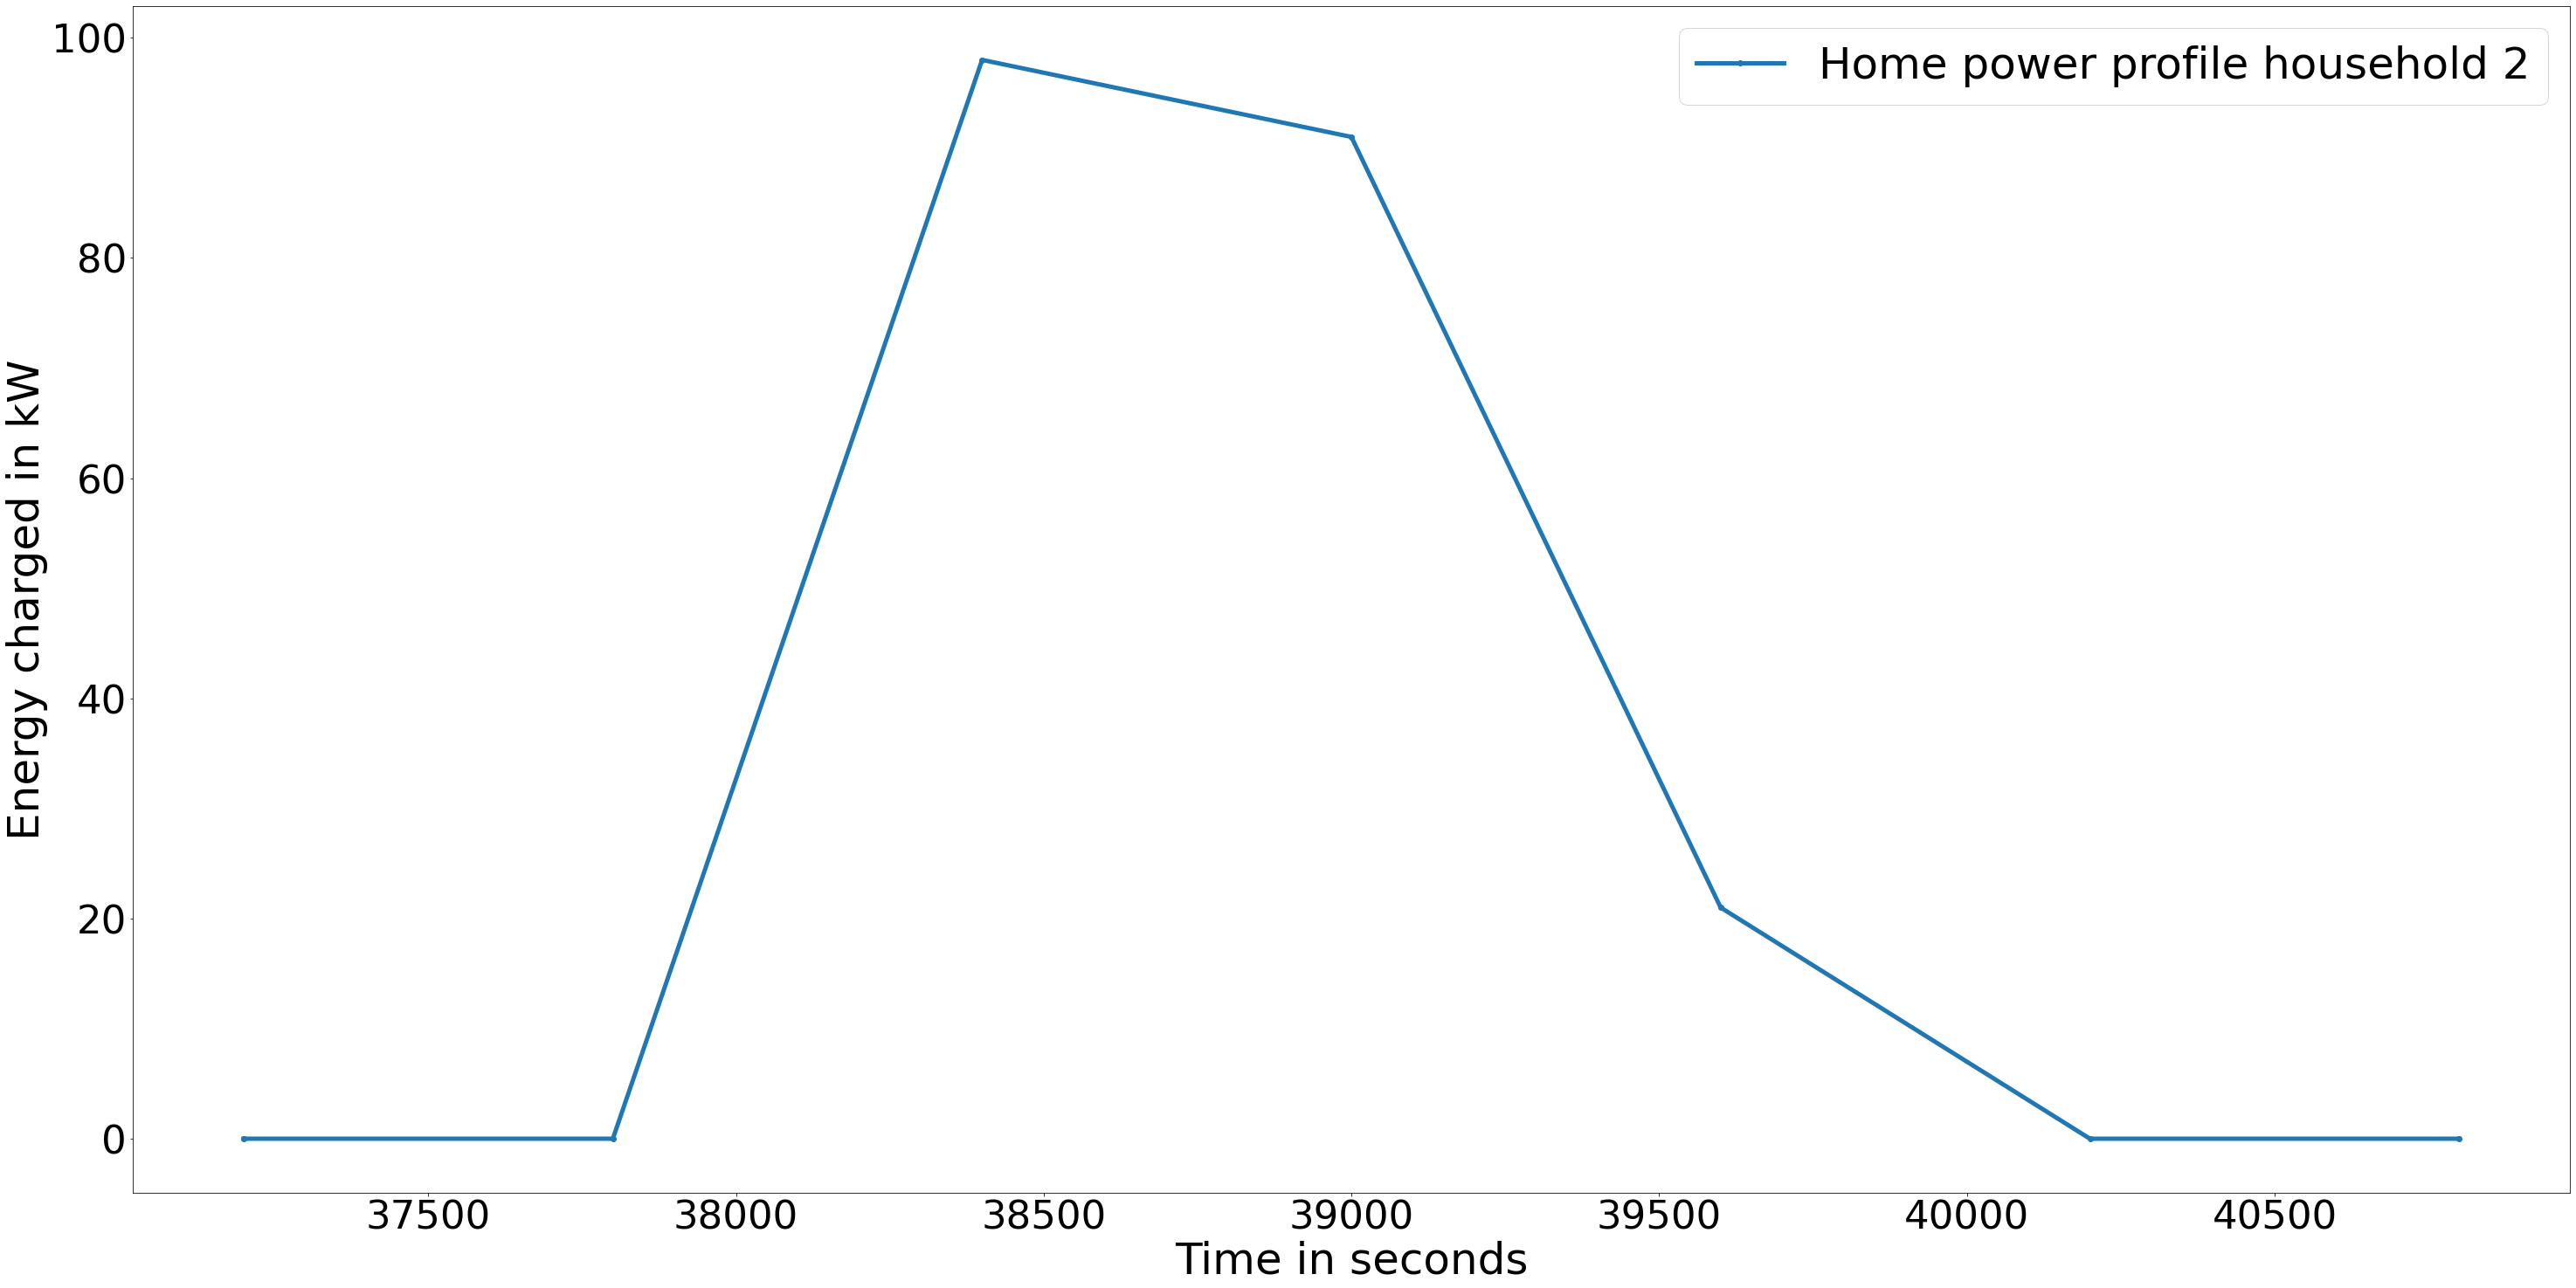

In [35]:
df_sum2.plot(x ='step', y='hh2_homecs', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Home power profile household 2'], fontsize=50)
plt.xlabel('Time in seconds', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

In [36]:
df_sum3= df_sum[df_sum['charging_station'].str.contains("hh3_ev.*_homecs")]
df_sum3 = df_sum3.groupby(['step']).size().reset_index(name="count")
df_sum3 = df_sum3.drop(range(9,30))
df_sum3['hh3_homecs'] = df_sum3['count'] * 7
df_sum3 = df_sum3.drop(df_sum3.columns[[1]], axis=1)
df_sum3

,step,hh3_homecs
0,32400,77
1,33000,98
2,33600,35
3,34200,7
4,34800,7
5,35400,7
6,36000,7
7,36600,14
8,37200,7


In [37]:
new_row1 = {'step':31800, 'hh3_homecs':0}
new_row2 = {'step':31200, 'hh3_homecs':0}
new_row3 = {'step':38000, 'hh3_homecs':0}
new_row4 = {'step':38600, 'hh3_homecs':0}
#append row to the dataframe
df_sum3 = df_sum3.append(new_row1, ignore_index=True)
df_sum3 = df_sum3.append(new_row2, ignore_index=True)
df_sum3 = df_sum3.append(new_row3, ignore_index=True)
df_sum3 = df_sum3.append(new_row4, ignore_index=True)
df_sum3 = df_sum3.sort_values('step')
df_sum3

,step,hh3_homecs
10,31200,0
9,31800,0
0,32400,77
1,33000,98
2,33600,35
3,34200,7
4,34800,7
5,35400,7
6,36000,7
7,36600,14


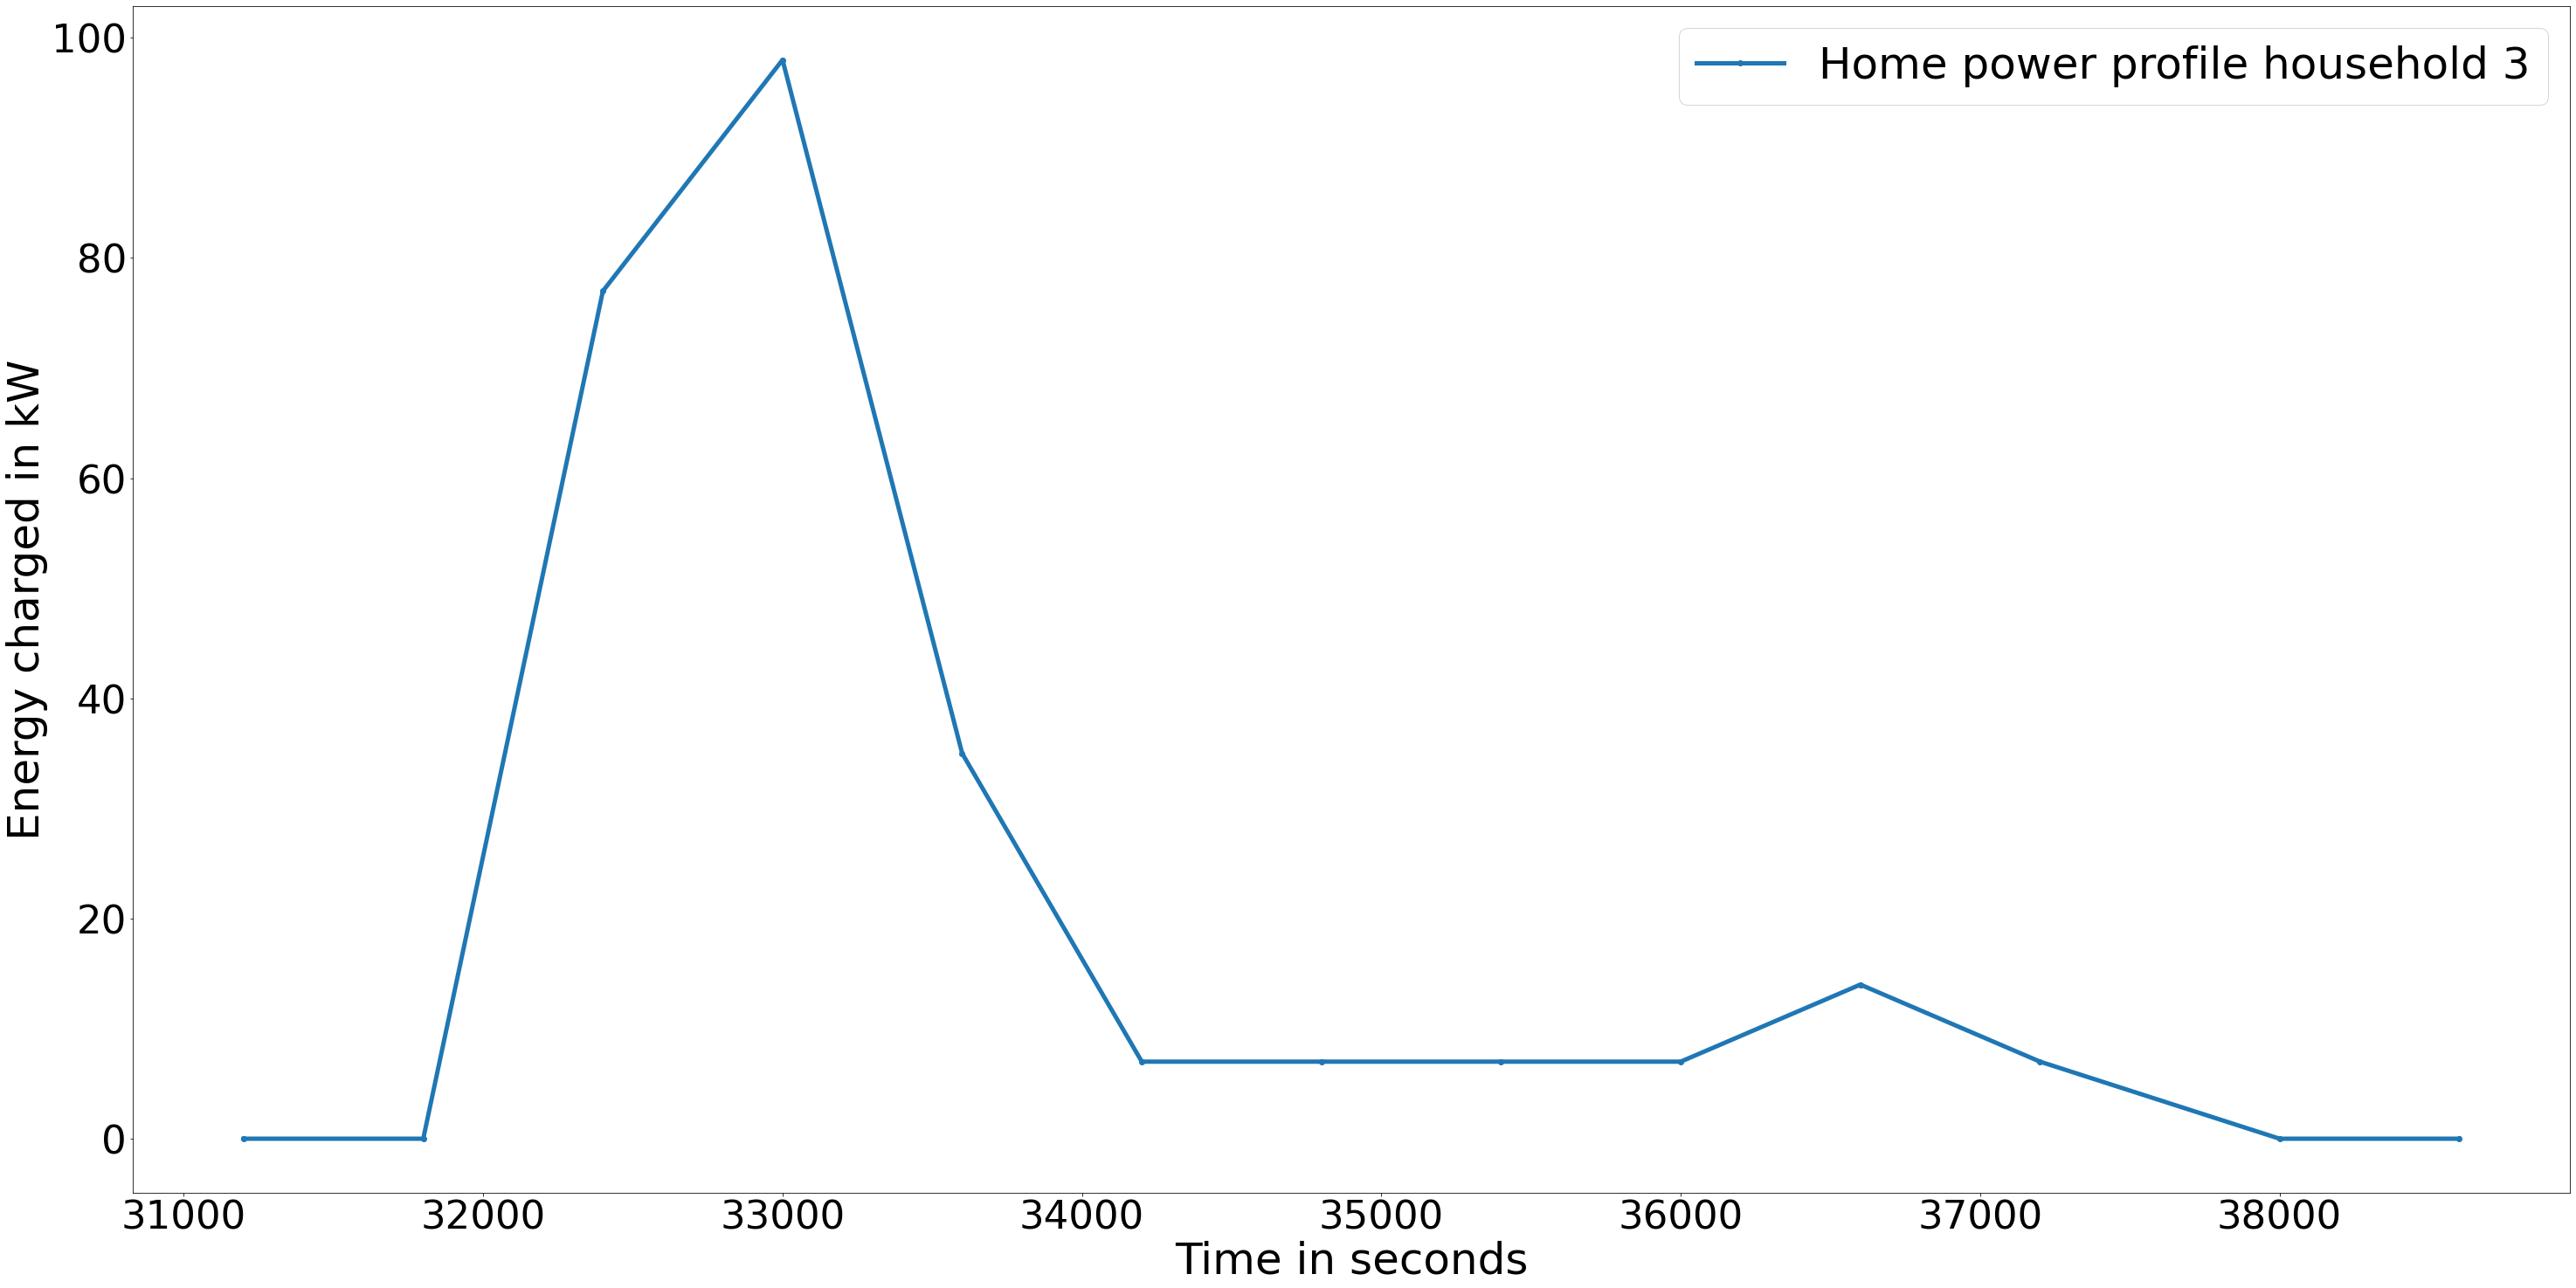

In [38]:
df_sum3.plot(x ='step', y='hh3_homecs', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Home power profile household 3'], fontsize=50)
plt.xlabel('Time in seconds', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

In [39]:
df_sum4= df_sum[df_sum['charging_station'].str.contains("hh4_ev.*_homecs")]
df_sum4 = df_sum4.groupby(['step']).size().reset_index(name="count")
df_sum4 = df_sum4.drop(range(3,6))
df_sum4['hh4_homecs'] = df_sum4['count'] * 7
df_sum4 = df_sum4.drop(df_sum4.columns[[1]], axis=1)
df_sum4

,step,hh4_homecs
0,37200,84
1,37800,77
2,39000,7


In [40]:
new_row1 = {'step':36600, 'hh4_homecs':0}
new_row2 = {'step':36000, 'hh4_homecs':0}
new_row3 = {'step':39600, 'hh4_homecs':0}
new_row4 = {'step':40200, 'hh4_homecs':0}
#append row to the dataframe
df_sum4 = df_sum4.append(new_row1, ignore_index=True)
df_sum4 = df_sum4.append(new_row2, ignore_index=True)
df_sum4 = df_sum4.append(new_row3, ignore_index=True)
df_sum4 = df_sum4.append(new_row4, ignore_index=True)
df_sum4 = df_sum4.sort_values('step')
df_sum4

,step,hh4_homecs
4,36000,0
3,36600,0
0,37200,84
1,37800,77
2,39000,7
5,39600,0
6,40200,0


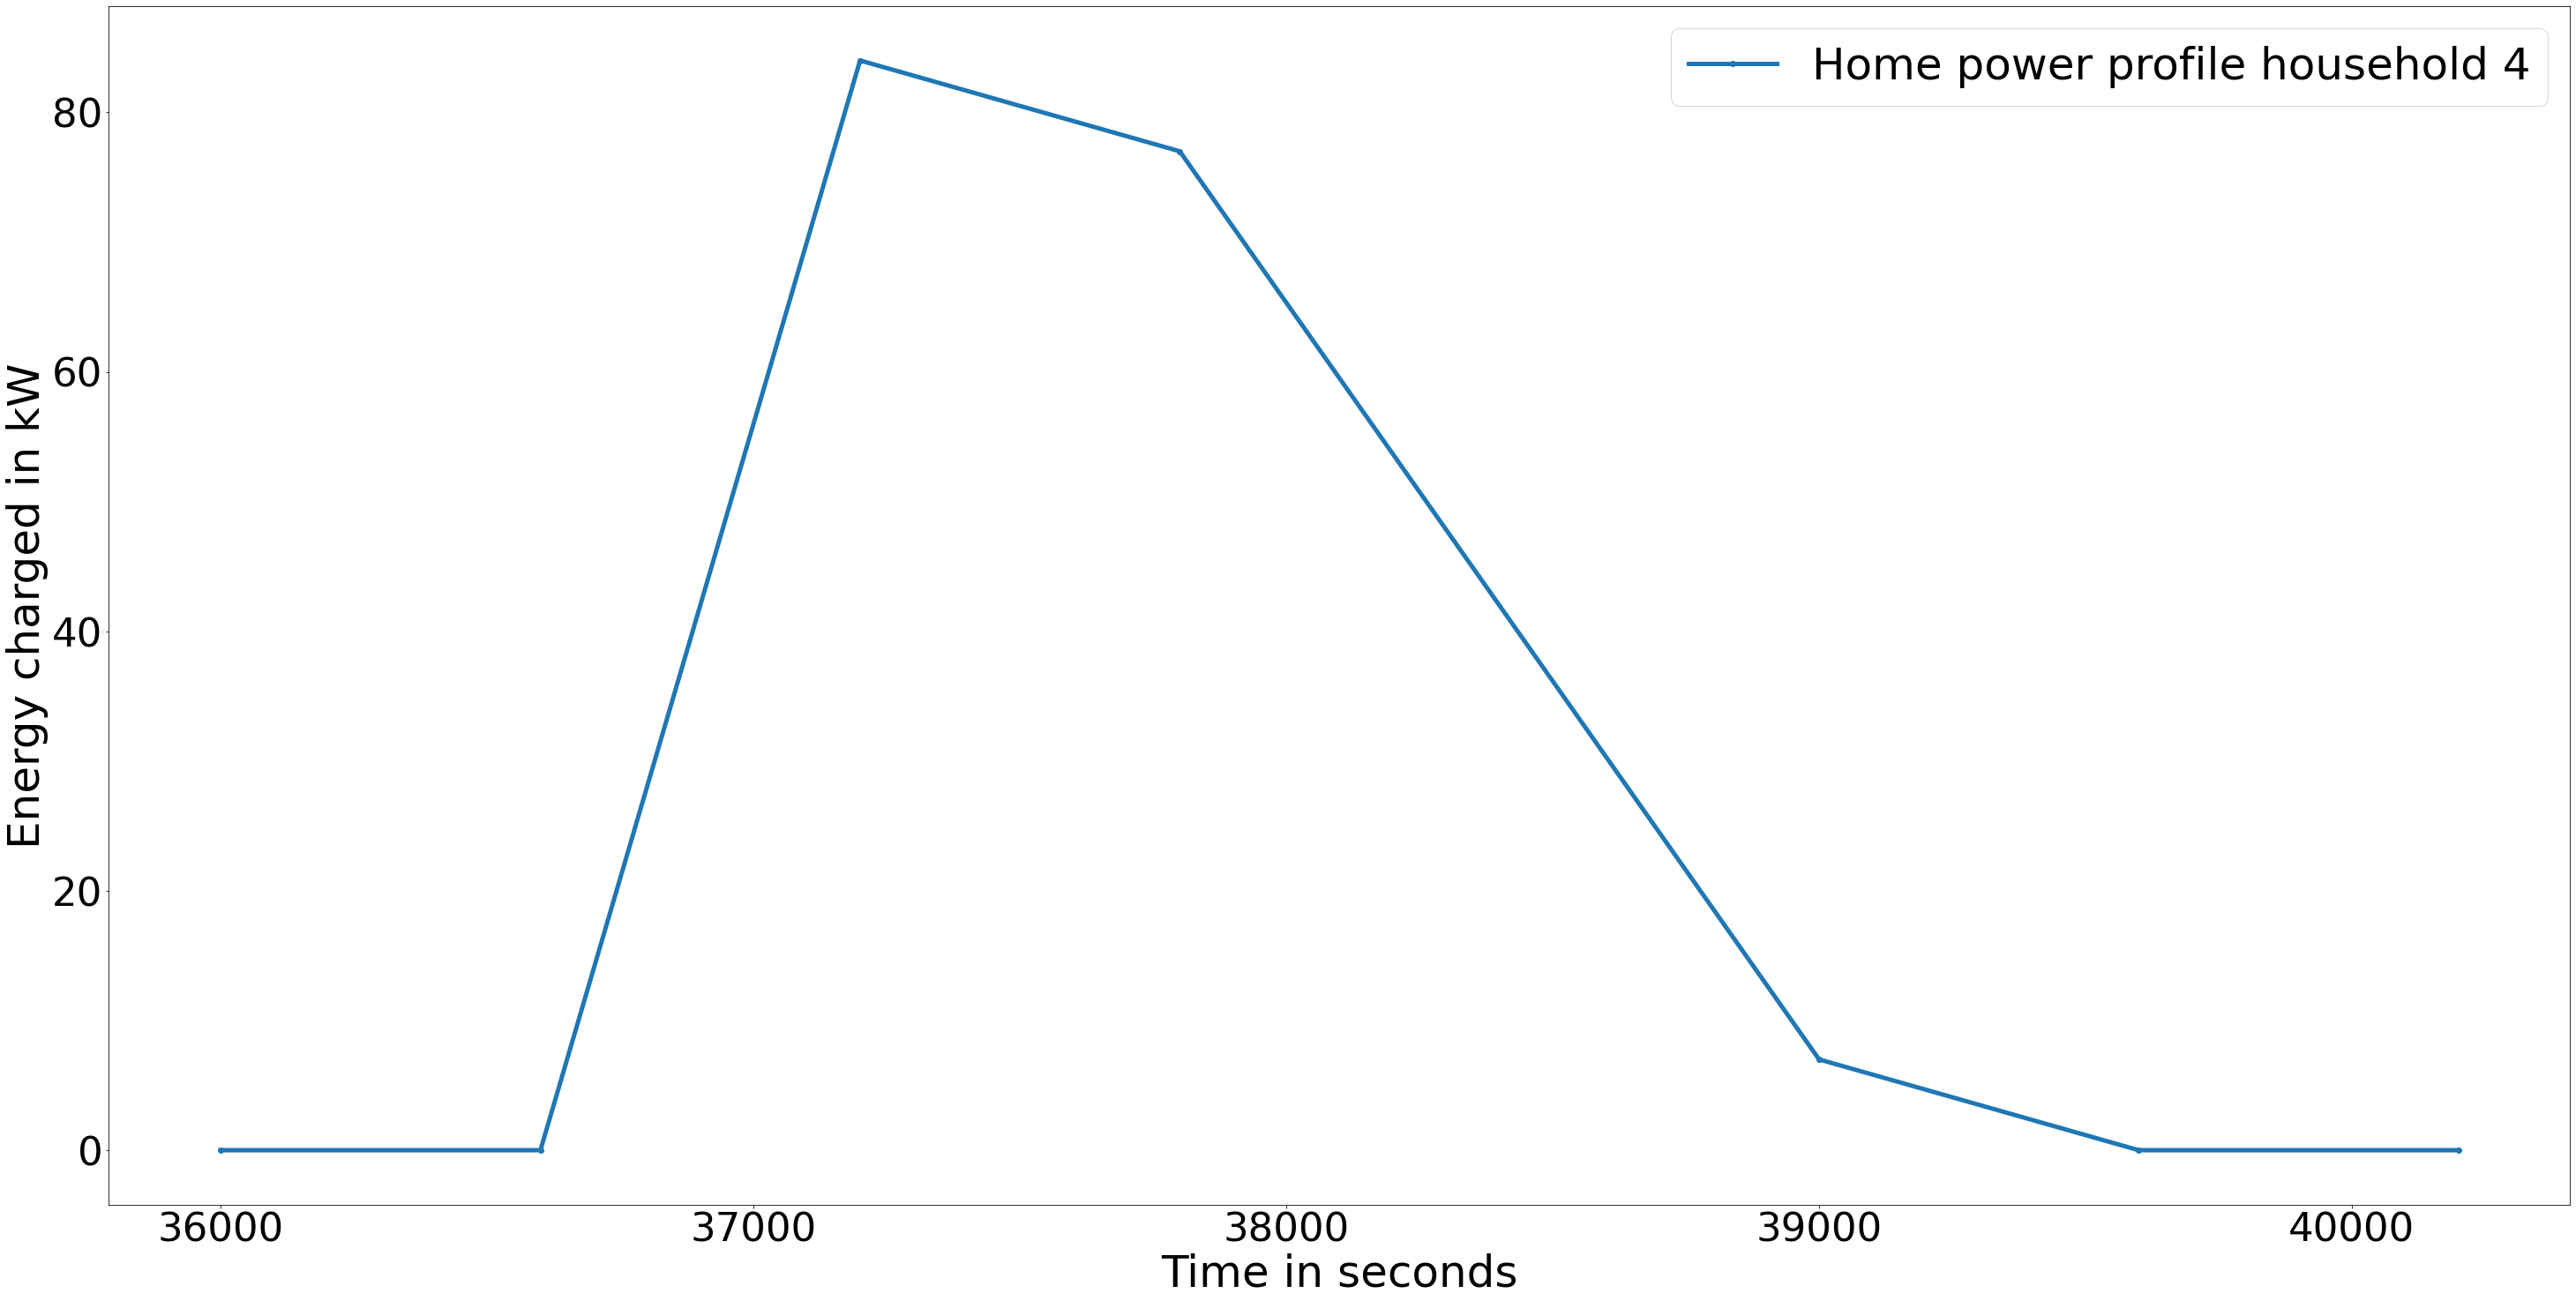

In [41]:
df_sum4.plot(x ='step', y='hh4_homecs', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Home power profile household 4'], fontsize=50)
plt.xlabel('Time in seconds', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

In [42]:
df_sum5= df_sum[df_sum['charging_station'].str.contains("hh5_ev.*_homecs")]
df_sum5 = df_sum5.groupby(['step']).size().reset_index(name="count")
df_sum5['hh5_homecs'] = df_sum5['count'] * 7
df_sum5 = df_sum5.drop(df_sum5.columns[[1]], axis=1)
df_sum5

,step,hh5_homecs
0,23400,14
1,24000,28
2,24600,7
3,35400,7
4,36000,14


In [43]:
# df_home5 = df.loc[df['charging_station'].str.contains("hh10_ev.*_homecs")]
# df_home25 = df.loc[df['status'] == "charging"]
# df_home25 = df_home25.loc[df_home25['charging_station'].str.contains("hh10_ev.*_homecs")]
# df_home35 = df.loc[df['status'] == "not charging"]
# df_home35 = df_home35.loc[df_home35['charging_station'].str.contains("hh10_ev.*_homecs")]
# df_home35 = df_home35.groupby(['step']).size().reset_index(name="count")
# df_home25 = df_home25.groupby(['step']).size().reset_index(name="count")
# df_home5 = df_home5.groupby(['step']).size().reset_index(name="count")
# df_home5['charging'] = df_home5['count'] - df_home35['count']
# df_home5['charging'] = df_home5['charging'] * 7
# df_home5["step"] = ["06:00","06:10","06:20","06:30","06:40","06:50","07:00","07:10","07:20","07:30","07:40","07:50","08:00","08:10","08:20","08:30","08:40","08:50","09:00","09:10","09:20","09:30","09:40","09:50","10:00","10:10","10:20","10:30","10:40","10:50","11:00","11:10","11:20","11:30","11:40","11:50","12:00","12:10","12:20","12:30","12:40","12:50","13:00","13:10","13:20","13:30","13:40","13:50","14:00","14:10","14:20","14:30","14:40","14:50","15:00","15:10","15:20","15:30","15:40","15:50","16:00","16:10","16:20","16:30","16:40","16:50","17:00","17:10","17:20","17:30","17:40","17:50","18:00","18:10","18:20","18:30","18:40","18:50","19:00","19:10","19:20","19:30","19:40","19:50","20:00","20:10","20:20","20:30","20:40","20:50","21:00","21:10","21:20","21:30","21:40","21:50","22:00","22:10","22:20","22:30","22:40","22:50","23:00","23:10","23:20","23:30","23:40","23:50","00:00","00:10","00:20","00:30","00:40","00:50","01:00","01:10","01:20","01:30","01:40","01:50","02:00","02:10","02:20","02:30","02:40","02:50","03:00","03:10","03:20","03:30","03:40","03:50","04:00","04:10","04:20","04:30","04:40","04:50","05:00","05:10","05:20","05:30","05:40","05:50","06:00"]
# df_home5 = df_home5.sort_values('step')
# df_home5

In [44]:
new_row5 = {'step':25200, 'hh5_homecs':0}
new_row6 = {'step':25800, 'hh5_homecs':0}
new_row7 = {'step':26400, 'hh5_homecs':0}
new_row8 = {'step':27000, 'hh5_homecs':0}
new_row9 = {'step':27600, 'hh5_homecs':0}
new_row10 = {'step':28200, 'hh5_homecs':0}
new_row11 = {'step':28800, 'hh5_homecs':0}
new_row12 = {'step':29400, 'hh5_homecs':0}
new_row13 = {'step':30000, 'hh5_homecs':0}
new_row14 = {'step':30600, 'hh5_homecs':0}
new_row15 = {'step':31200, 'hh5_homecs':0}
new_row16 = {'step':31800, 'hh5_homecs':0}
new_row17 = {'step':32400, 'hh5_homecs':0}
new_row18 = {'step':33000, 'hh5_homecs':0}
new_row19 = {'step':33600, 'hh5_homecs':0}
new_row20 = {'step':34200, 'hh5_homecs':0}
new_row21 = {'step':34800, 'hh5_homecs':0}

new_row1 = {'step':22800, 'hh5_homecs':0}
new_row2 = {'step':22200, 'hh5_homecs':0}
new_row3 = {'step':36600, 'hh5_homecs':0}
new_row4 = {'step':37200, 'hh5_homecs':0}
#append row to the dataframe
df_sum5 = df_sum5.append(new_row1, ignore_index=True)
df_sum5 = df_sum5.append(new_row2, ignore_index=True)
df_sum5 = df_sum5.append(new_row3, ignore_index=True)
df_sum5 = df_sum5.append(new_row4, ignore_index=True)

df_sum5 = df_sum5.append(new_row5, ignore_index=True)
df_sum5 = df_sum5.append(new_row6, ignore_index=True)
df_sum5 = df_sum5.append(new_row7, ignore_index=True)
df_sum5 = df_sum5.append(new_row8, ignore_index=True)
df_sum5 = df_sum5.append(new_row9, ignore_index=True)
df_sum5 = df_sum5.append(new_row10, ignore_index=True)
df_sum5 = df_sum5.append(new_row11, ignore_index=True)
df_sum5 = df_sum5.append(new_row12, ignore_index=True)
df_sum5 = df_sum5.append(new_row13, ignore_index=True)
df_sum5 = df_sum5.append(new_row14, ignore_index=True)
df_sum5 = df_sum5.append(new_row15, ignore_index=True)
df_sum5 = df_sum5.append(new_row16, ignore_index=True)
df_sum5 = df_sum5.append(new_row17, ignore_index=True)
df_sum5 = df_sum5.append(new_row18, ignore_index=True)
df_sum5 = df_sum5.append(new_row19, ignore_index=True)
df_sum5 = df_sum5.append(new_row20, ignore_index=True)
df_sum5 = df_sum5.append(new_row21, ignore_index=True)

df_sum5 = df_sum5.sort_values('step')
df_sum5

,step,hh5_homecs
6,22200,0
5,22800,0
0,23400,14
1,24000,28
2,24600,7
9,25200,0
10,25800,0
11,26400,0
12,27000,0
13,27600,0


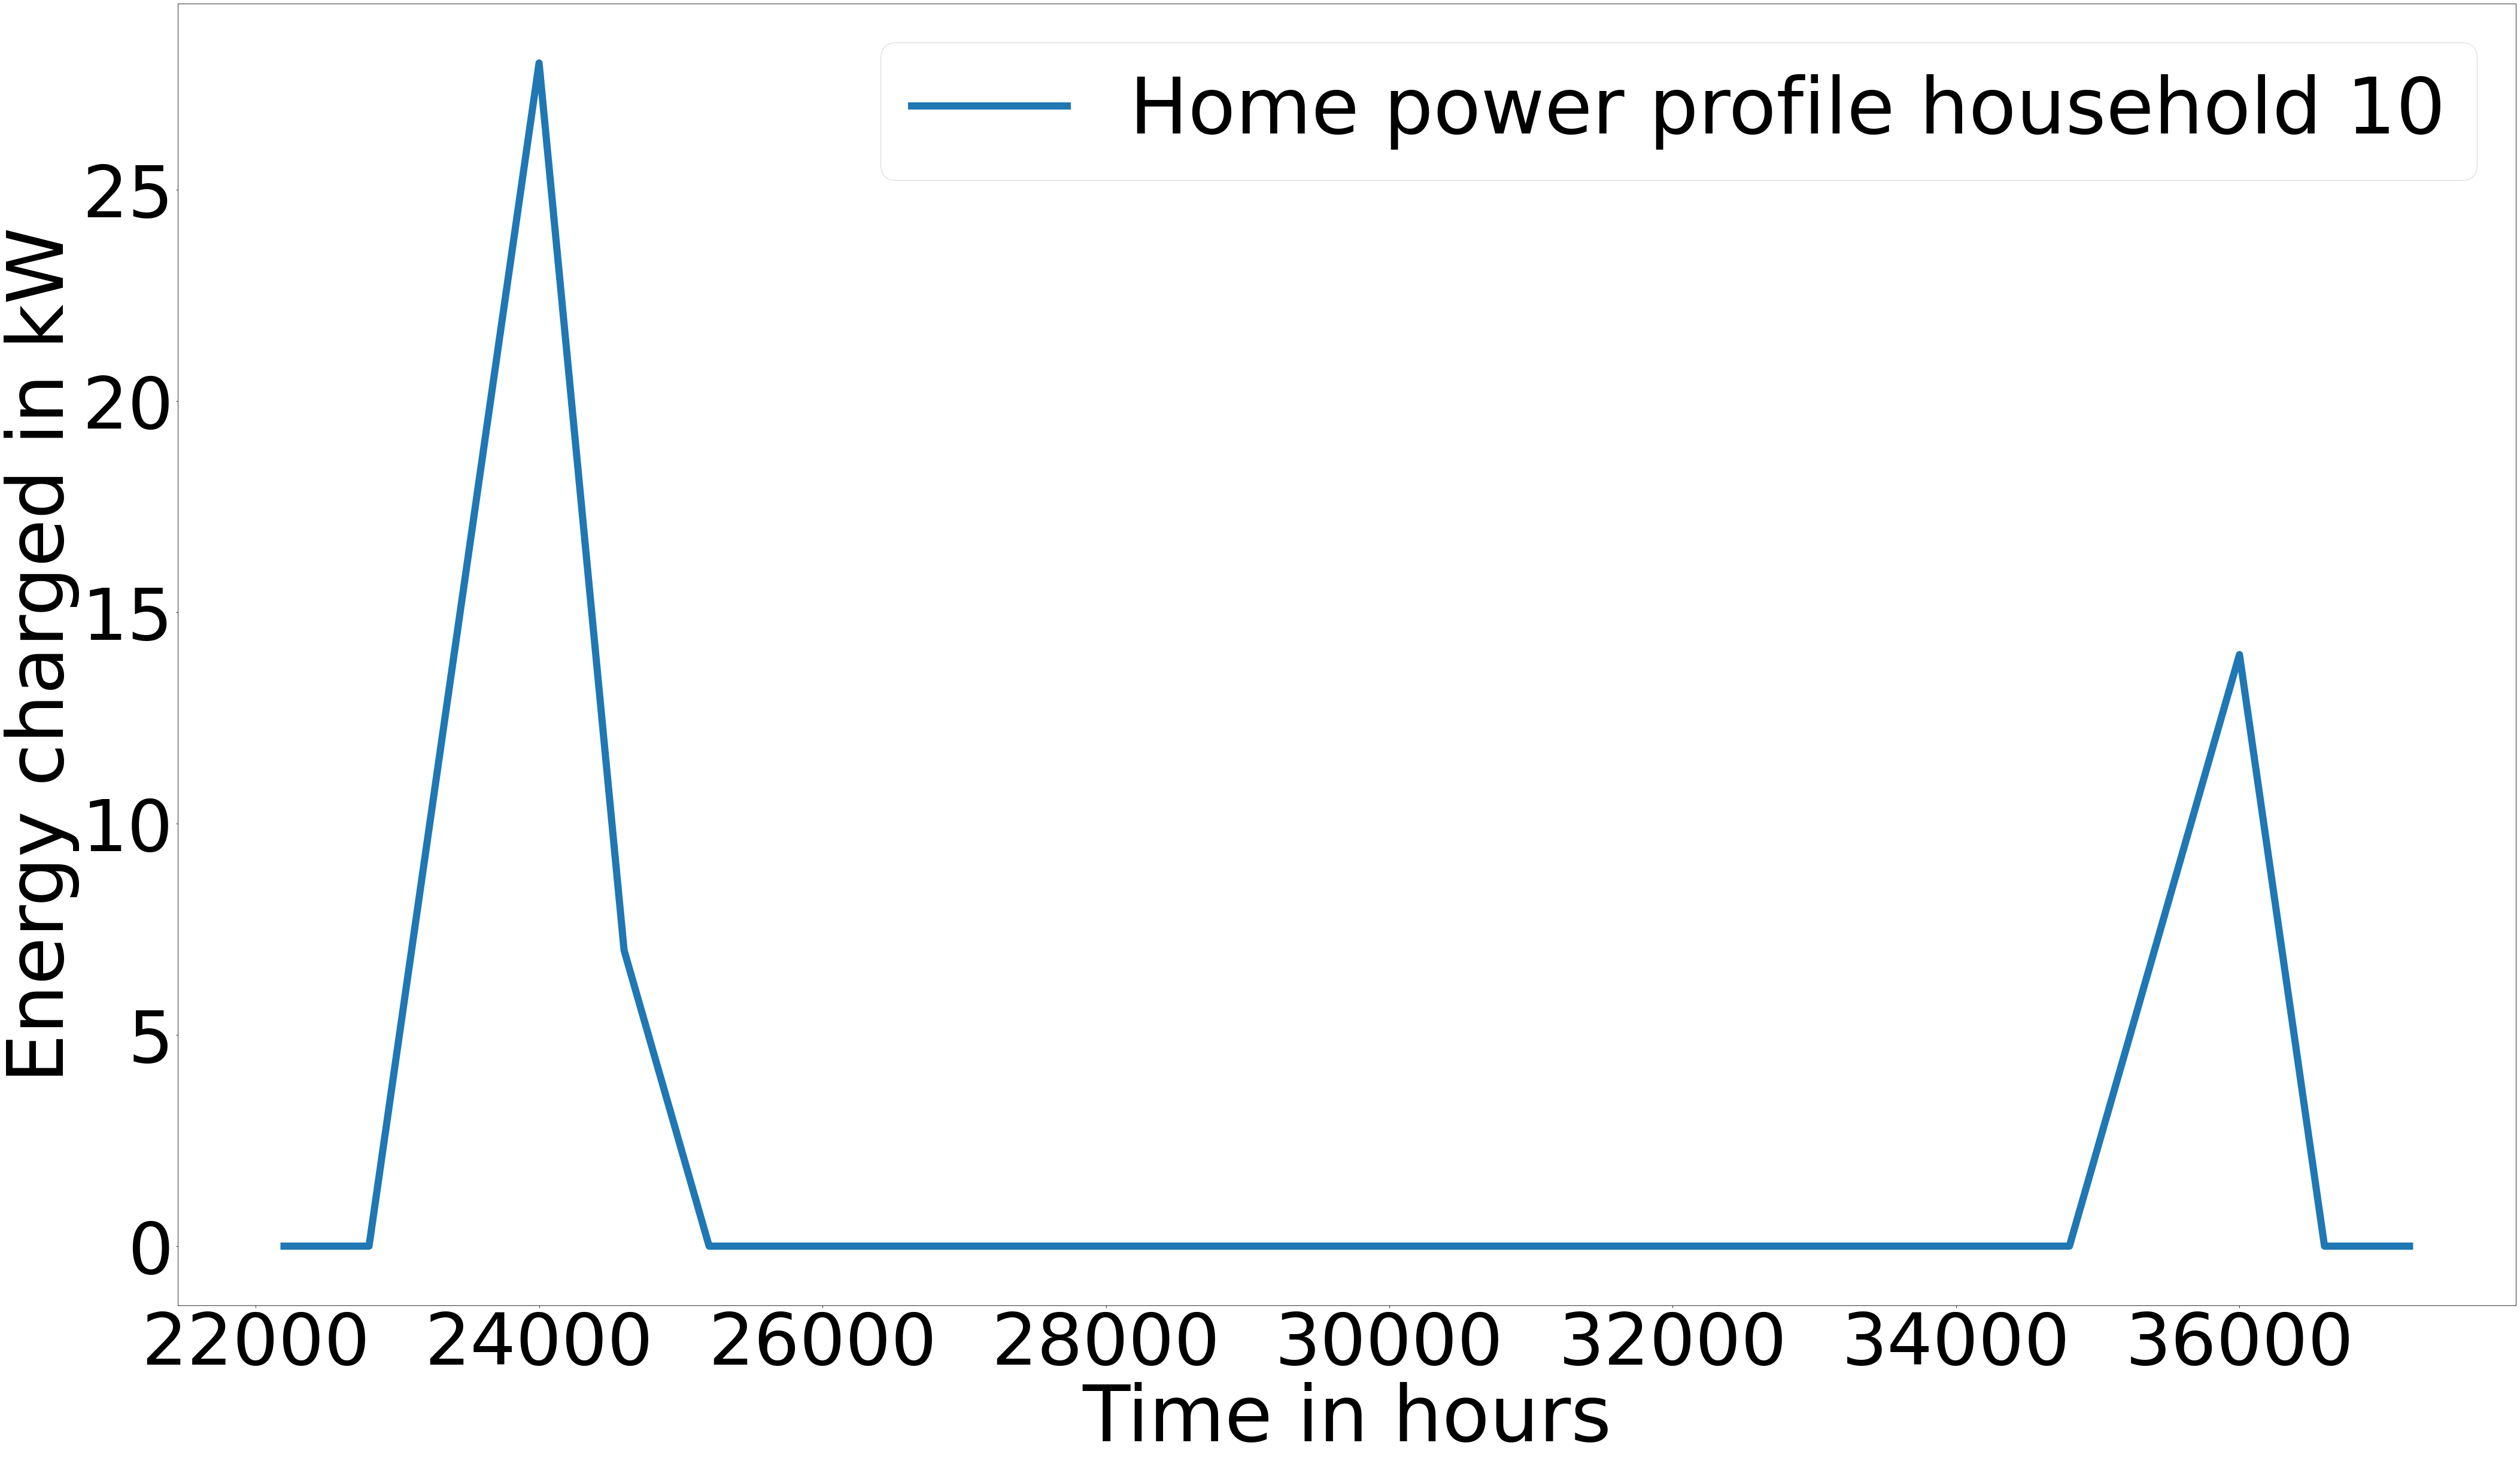

In [48]:
df_sum5.plot(x ='step', y='hh5_homecs', kind = 'line', lw = 12, figsize=(70,40), fontsize=120, style='o-')
plt.legend(['Home power profile household 5'], fontsize=130)
plt.xlabel('Time in hours', fontsize=130)
plt.ylabel('Energy charged in kW', fontsize=130)
plt.show()

In [49]:
df_sum5.describe()

,step,hh5_homecs
count,26.000000,26.000000
mean,29700.000000,2.692308
std,4589.117562,6.589502
min,22200.000000,0.000000
25%,25950.000000,0.000000
50%,29700.000000,0.000000
75%,33450.000000,0.000000
max,37200.000000,28.000000


In [50]:
print(df_sum5['hh5_homecs'].sum())

70


In [51]:
df_sum6= df_sum[df_sum['charging_station'].str.contains("hh6_ev.*_homecs")]
df_sum6 = df_sum6.groupby(['step']).size().reset_index(name="count")
df_sum6 = df_sum6.drop(range(0,1))
df_sum6['hh6_homecs'] = df_sum6['count'] * 7
df_sum6 = df_sum6.drop(df_sum6.columns[[1]], axis=1)
df_sum6

,step,hh6_homecs
1,43800,42
2,44400,56


In [52]:
new_row1 = {'step':43200, 'hh6_homecs':0}
new_row2 = {'step':42600, 'hh6_homecs':0}
new_row3 = {'step':45000, 'hh6_homecs':0}
new_row4 = {'step':45600, 'hh6_homecs':0}
#append row to the dataframe
df_sum6 = df_sum6.append(new_row1, ignore_index=True)
df_sum6 = df_sum6.append(new_row2, ignore_index=True)
df_sum6 = df_sum6.append(new_row3, ignore_index=True)
df_sum6 = df_sum6.append(new_row4, ignore_index=True)
df_sum6 = df_sum6.sort_values('step')
df_sum6

,step,hh6_homecs
3,42600,0
2,43200,0
0,43800,42
1,44400,56
4,45000,0
5,45600,0


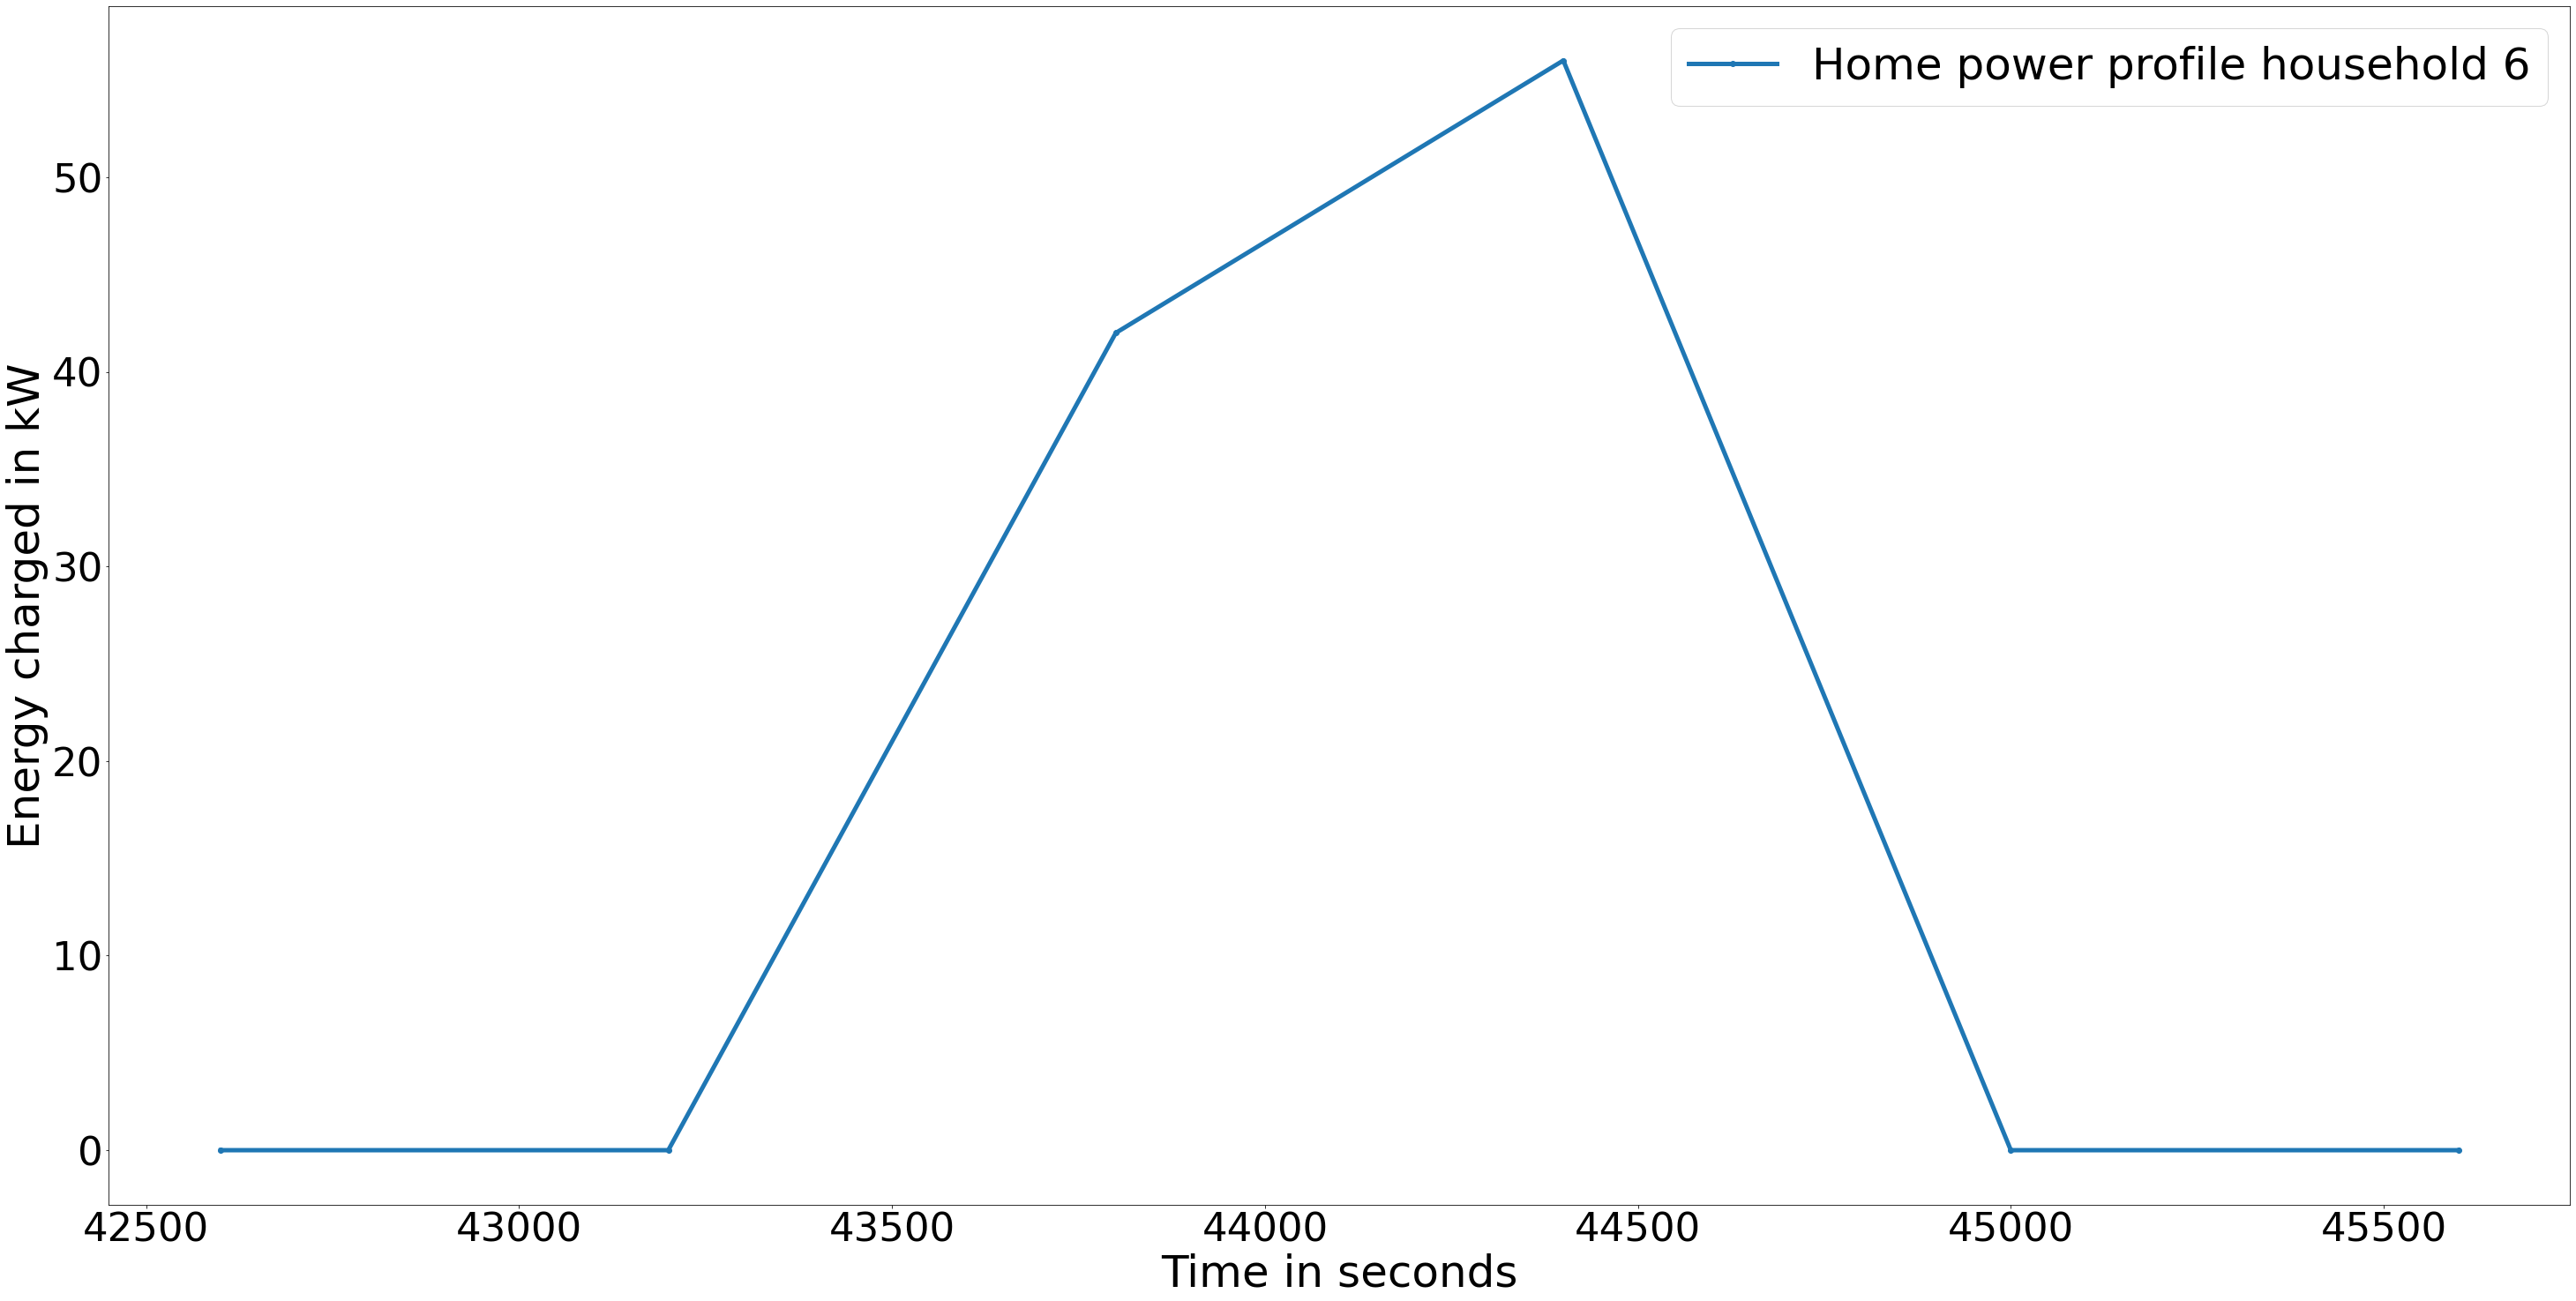

In [53]:
df_sum6.plot(x ='step', y='hh6_homecs', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Home power profile household 6'], fontsize=50)
plt.xlabel('Time in seconds', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

In [54]:
df_sum7= df_sum[df_sum['charging_station'].str.contains("hh7_ev.*_homecs")]
df_sum7 = df_sum7.groupby(['step']).size().reset_index(name="count")
df_sum7 = df_sum7.drop(range(0,4))
df_sum7 = df_sum7.drop(range(20,28))
df_sum7['hh7_homecs'] = df_sum7['count'] * 7
df_sum7 = df_sum7.drop(df_sum7.columns[[1]], axis=1)
df_sum7

,step,hh7_homecs
4,22800,7
5,23400,77
6,24000,119
7,24600,119
8,25200,119
9,25800,119
10,26400,119
11,27000,119
12,27600,119
13,28200,119


In [55]:
new_row1 = {'step':22200, 'hh7_homecs':0}
new_row2 = {'step':21600, 'hh7_homecs':0}
new_row3 = {'step':40200, 'hh7_homecs':0}
new_row4 = {'step':40800, 'hh7_homecs':0}
#append row to the dataframe
df_sum7 = df_sum7.append(new_row1, ignore_index=True)
df_sum7 = df_sum7.append(new_row2, ignore_index=True)
df_sum7 = df_sum7.append(new_row3, ignore_index=True)
df_sum7 = df_sum7.append(new_row4, ignore_index=True)
df_sum7 = df_sum7.sort_values('step')
df_sum7

,step,hh7_homecs
17,21600,0
16,22200,0
0,22800,7
1,23400,77
2,24000,119
3,24600,119
4,25200,119
5,25800,119
6,26400,119
7,27000,119


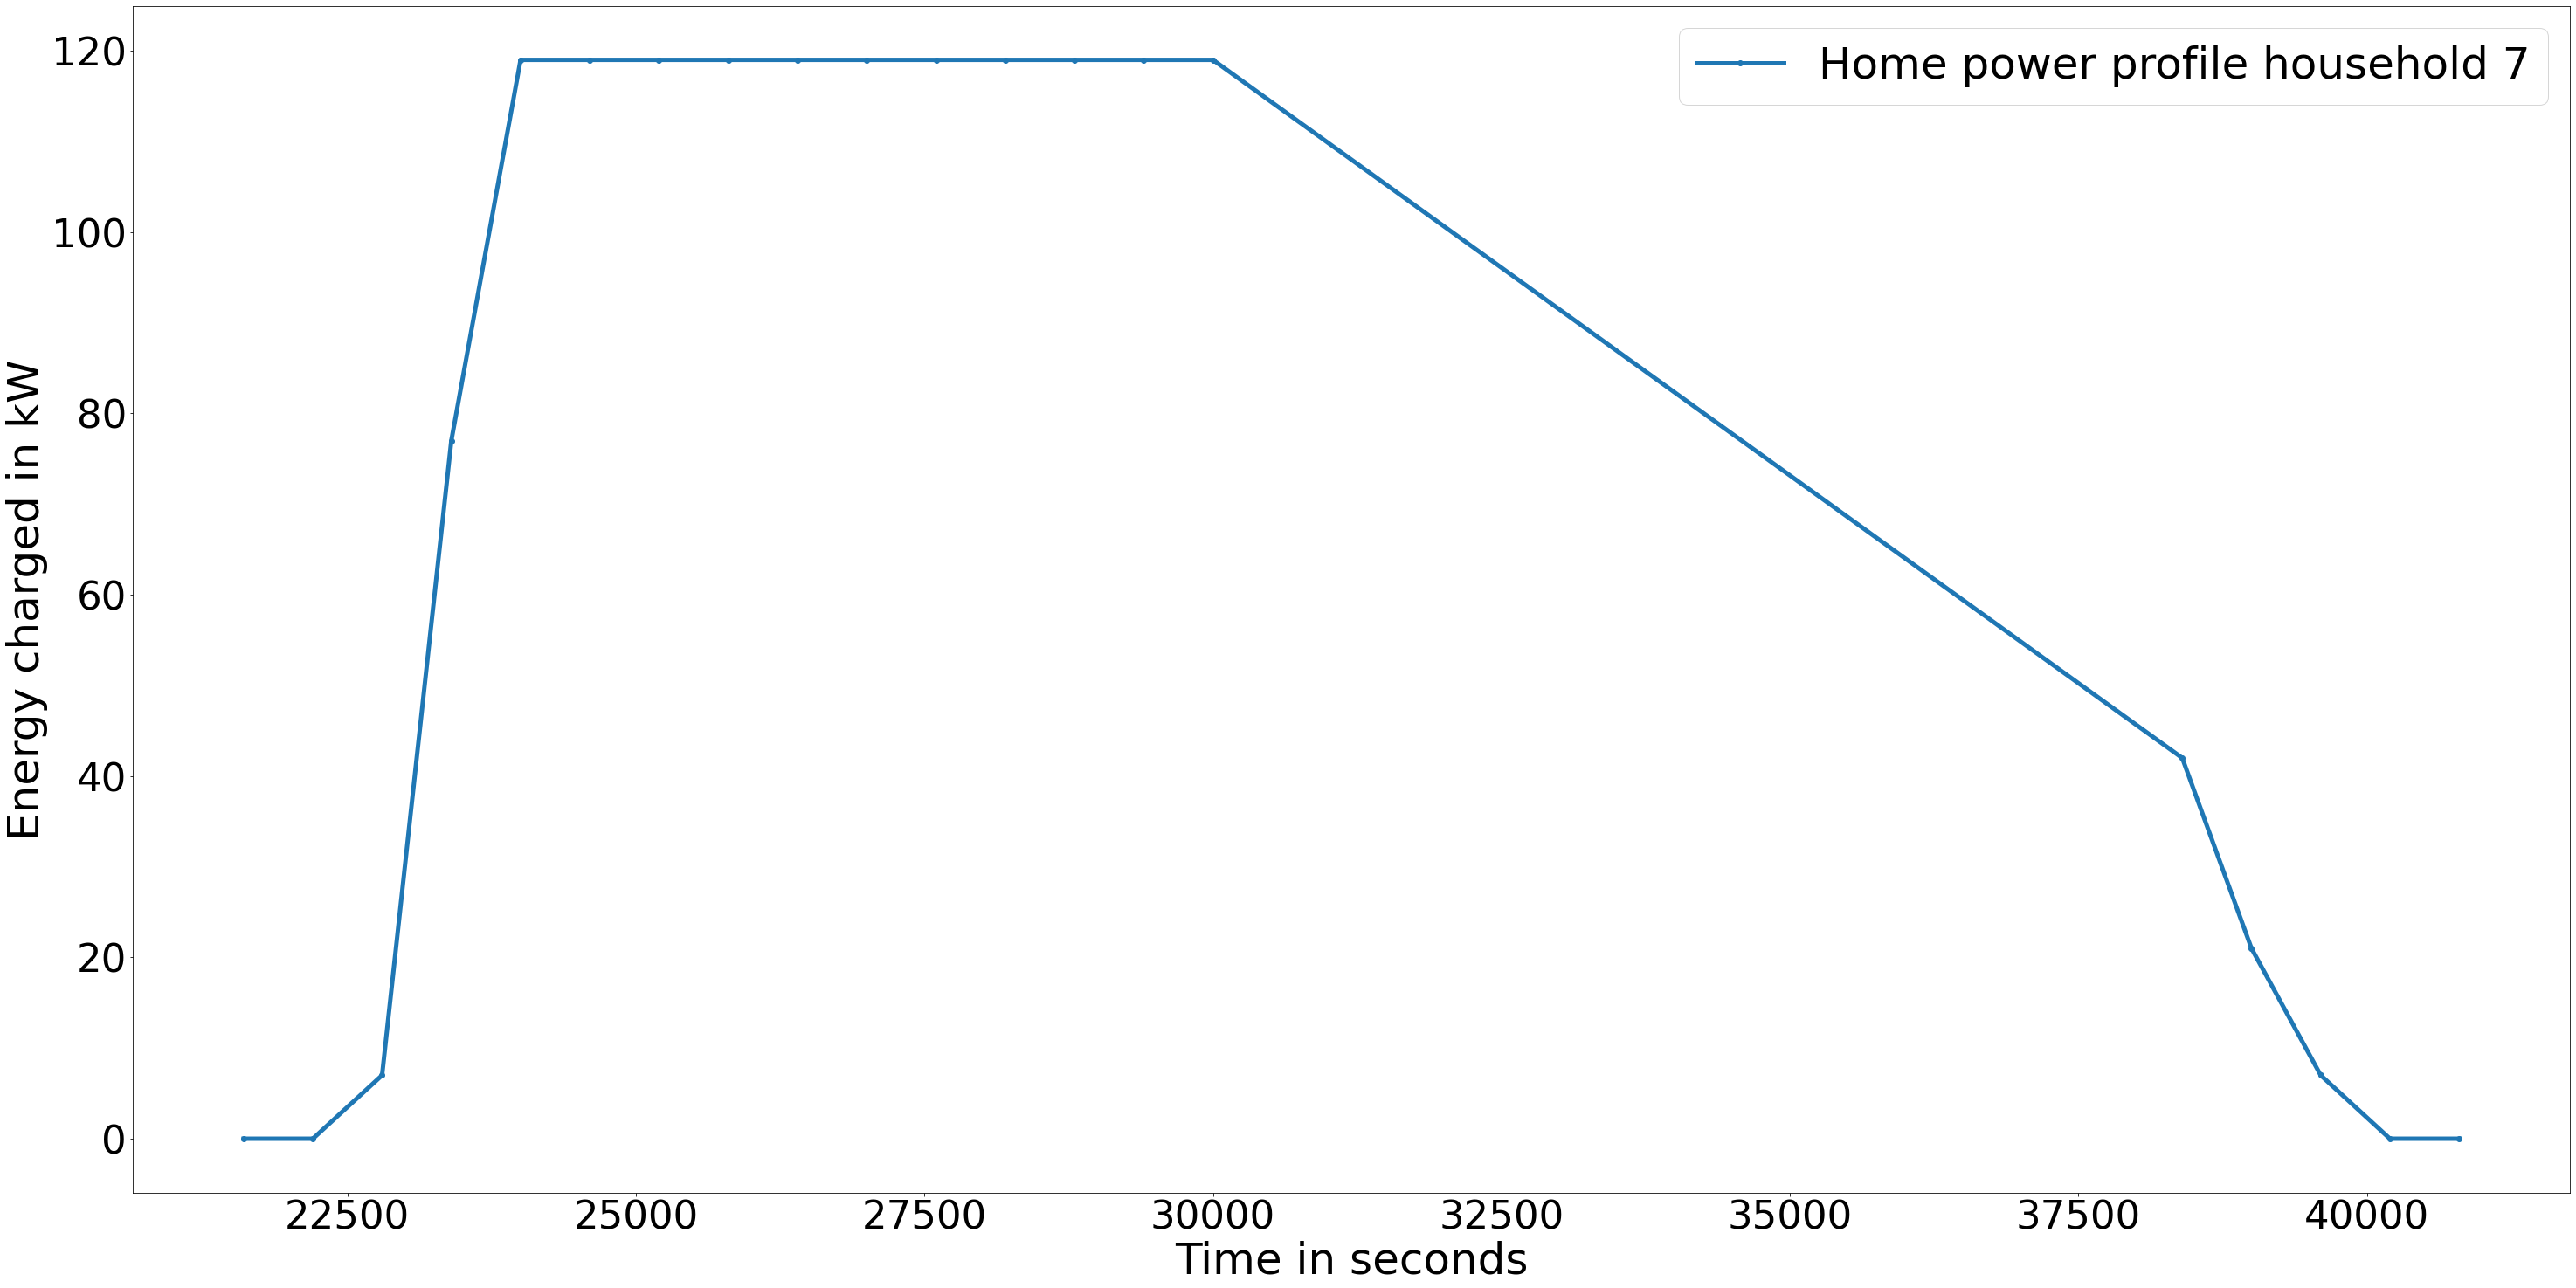

In [56]:
df_sum7.plot(x ='step', y='hh7_homecs', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Home power profile household 7'], fontsize=50)
plt.xlabel('Time in seconds', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

In [57]:
df_sum8= df_sum[df_sum['charging_station'].str.contains("hh8_ev.*_homecs")]
df_sum8 = df_sum8.groupby(['step']).size().reset_index(name="count")
df_sum8['hh8_homecs'] = df_sum8['count'] * 7
df_sum8 = df_sum8.drop(df_sum8.columns[[1]], axis=1)
df_sum8

,step,hh8_homecs
0,29400,56
1,30000,98
2,30600,28
3,31200,7


In [58]:
new_row1 = {'step':28600, 'hh8_homecs':0}
new_row2 = {'step':28000, 'hh8_homecs':0}
new_row3 = {'step':31800, 'hh8_homecs':0}
new_row4 = {'step':32400, 'hh8_homecs':0}
#append row to the dataframe
df_sum8 = df_sum8.append(new_row1, ignore_index=True)
df_sum8 = df_sum8.append(new_row2, ignore_index=True)
df_sum8 = df_sum8.append(new_row3, ignore_index=True)
df_sum8 = df_sum8.append(new_row4, ignore_index=True)
df_sum8 = df_sum8.sort_values('step')
df_sum8

,step,hh8_homecs
5,28000,0
4,28600,0
0,29400,56
1,30000,98
2,30600,28
3,31200,7
6,31800,0
7,32400,0


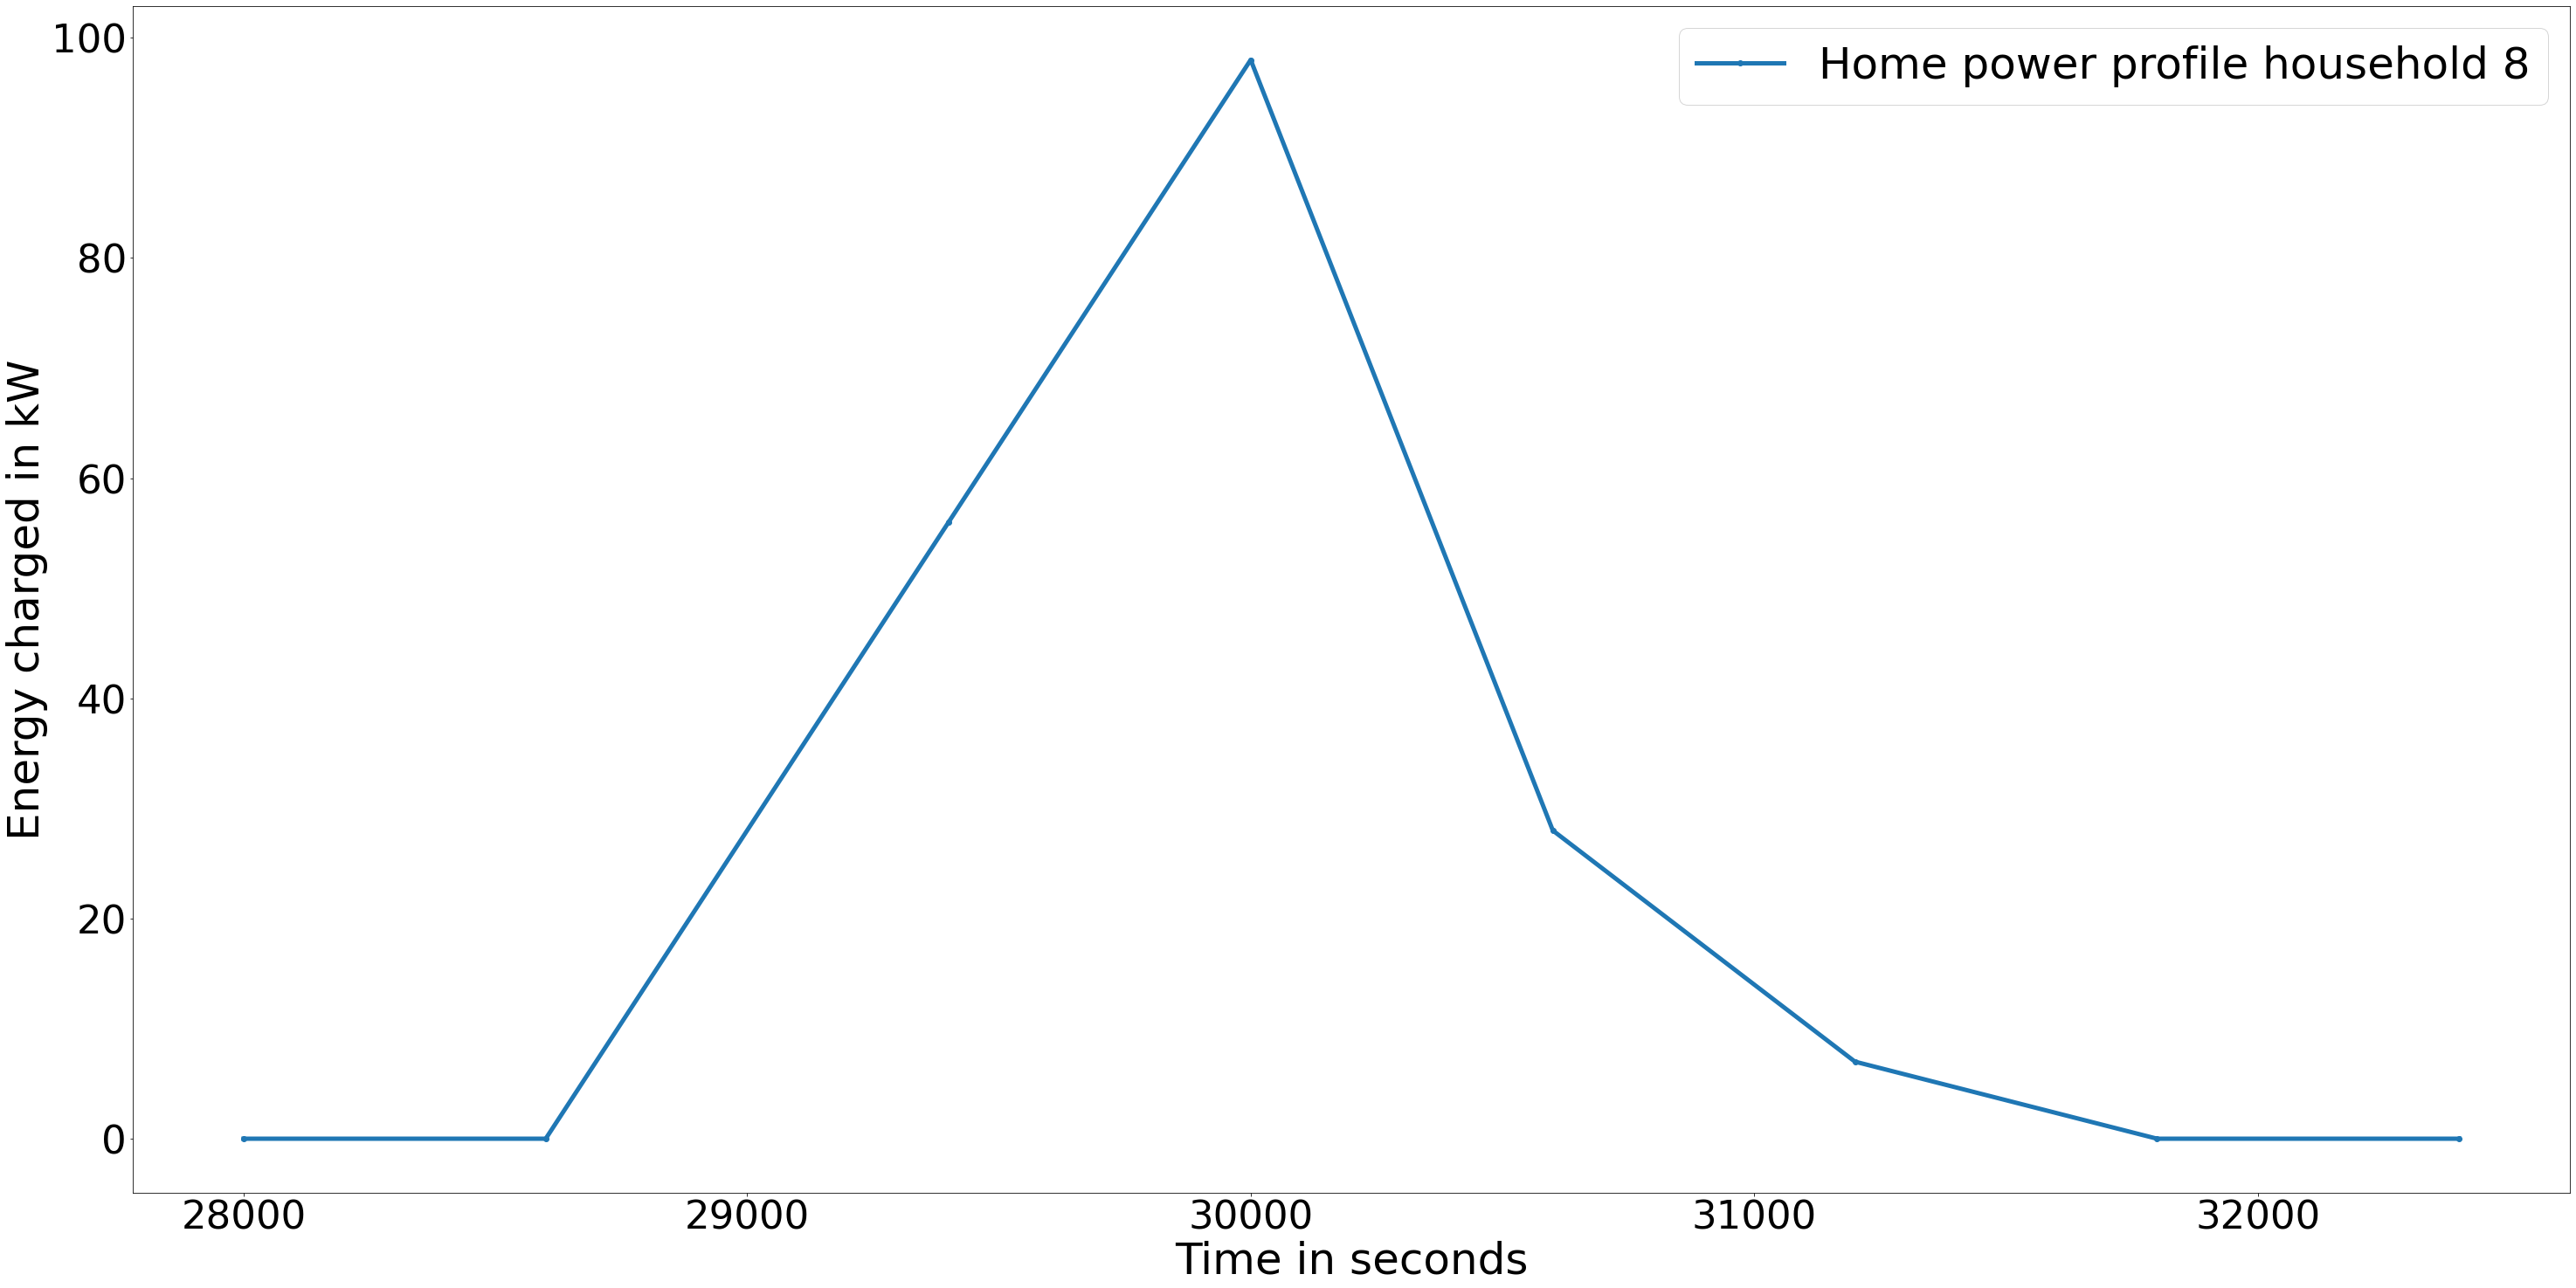

In [59]:
df_sum8.plot(x ='step', y='hh8_homecs', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Home power profile household 8'], fontsize=50)
plt.xlabel('Time in seconds', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

In [60]:
df_sum9= df_sum[df_sum['charging_station'].str.contains("hh9_ev.*_homecs")]
df_sum9 = df_sum9.groupby(['step']).size().reset_index(name="count")
df_sum9['hh9_homecs'] = df_sum9['count'] * 7
df_sum9 = df_sum9.drop(df_sum9.columns[[1]], axis=1)
df_sum9

,step,hh9_homecs
0,33000,14


In [61]:
new_row1 = {'step':32400, 'hh9_homecs':0}
new_row2 = {'step':31800, 'hh9_homecs':0}
new_row3 = {'step':33600, 'hh9_homecs':0}
new_row4 = {'step':34200, 'hh9_homecs':0}
#append row to the dataframe
df_sum9 = df_sum9.append(new_row1, ignore_index=True)
df_sum9 = df_sum9.append(new_row2, ignore_index=True)
df_sum9 = df_sum9.append(new_row3, ignore_index=True)
df_sum9 = df_sum9.append(new_row4, ignore_index=True)
df_sum9 = df_sum9.sort_values('step')
df_sum9

,step,hh9_homecs
2,31800,0
1,32400,0
0,33000,14
3,33600,0
4,34200,0


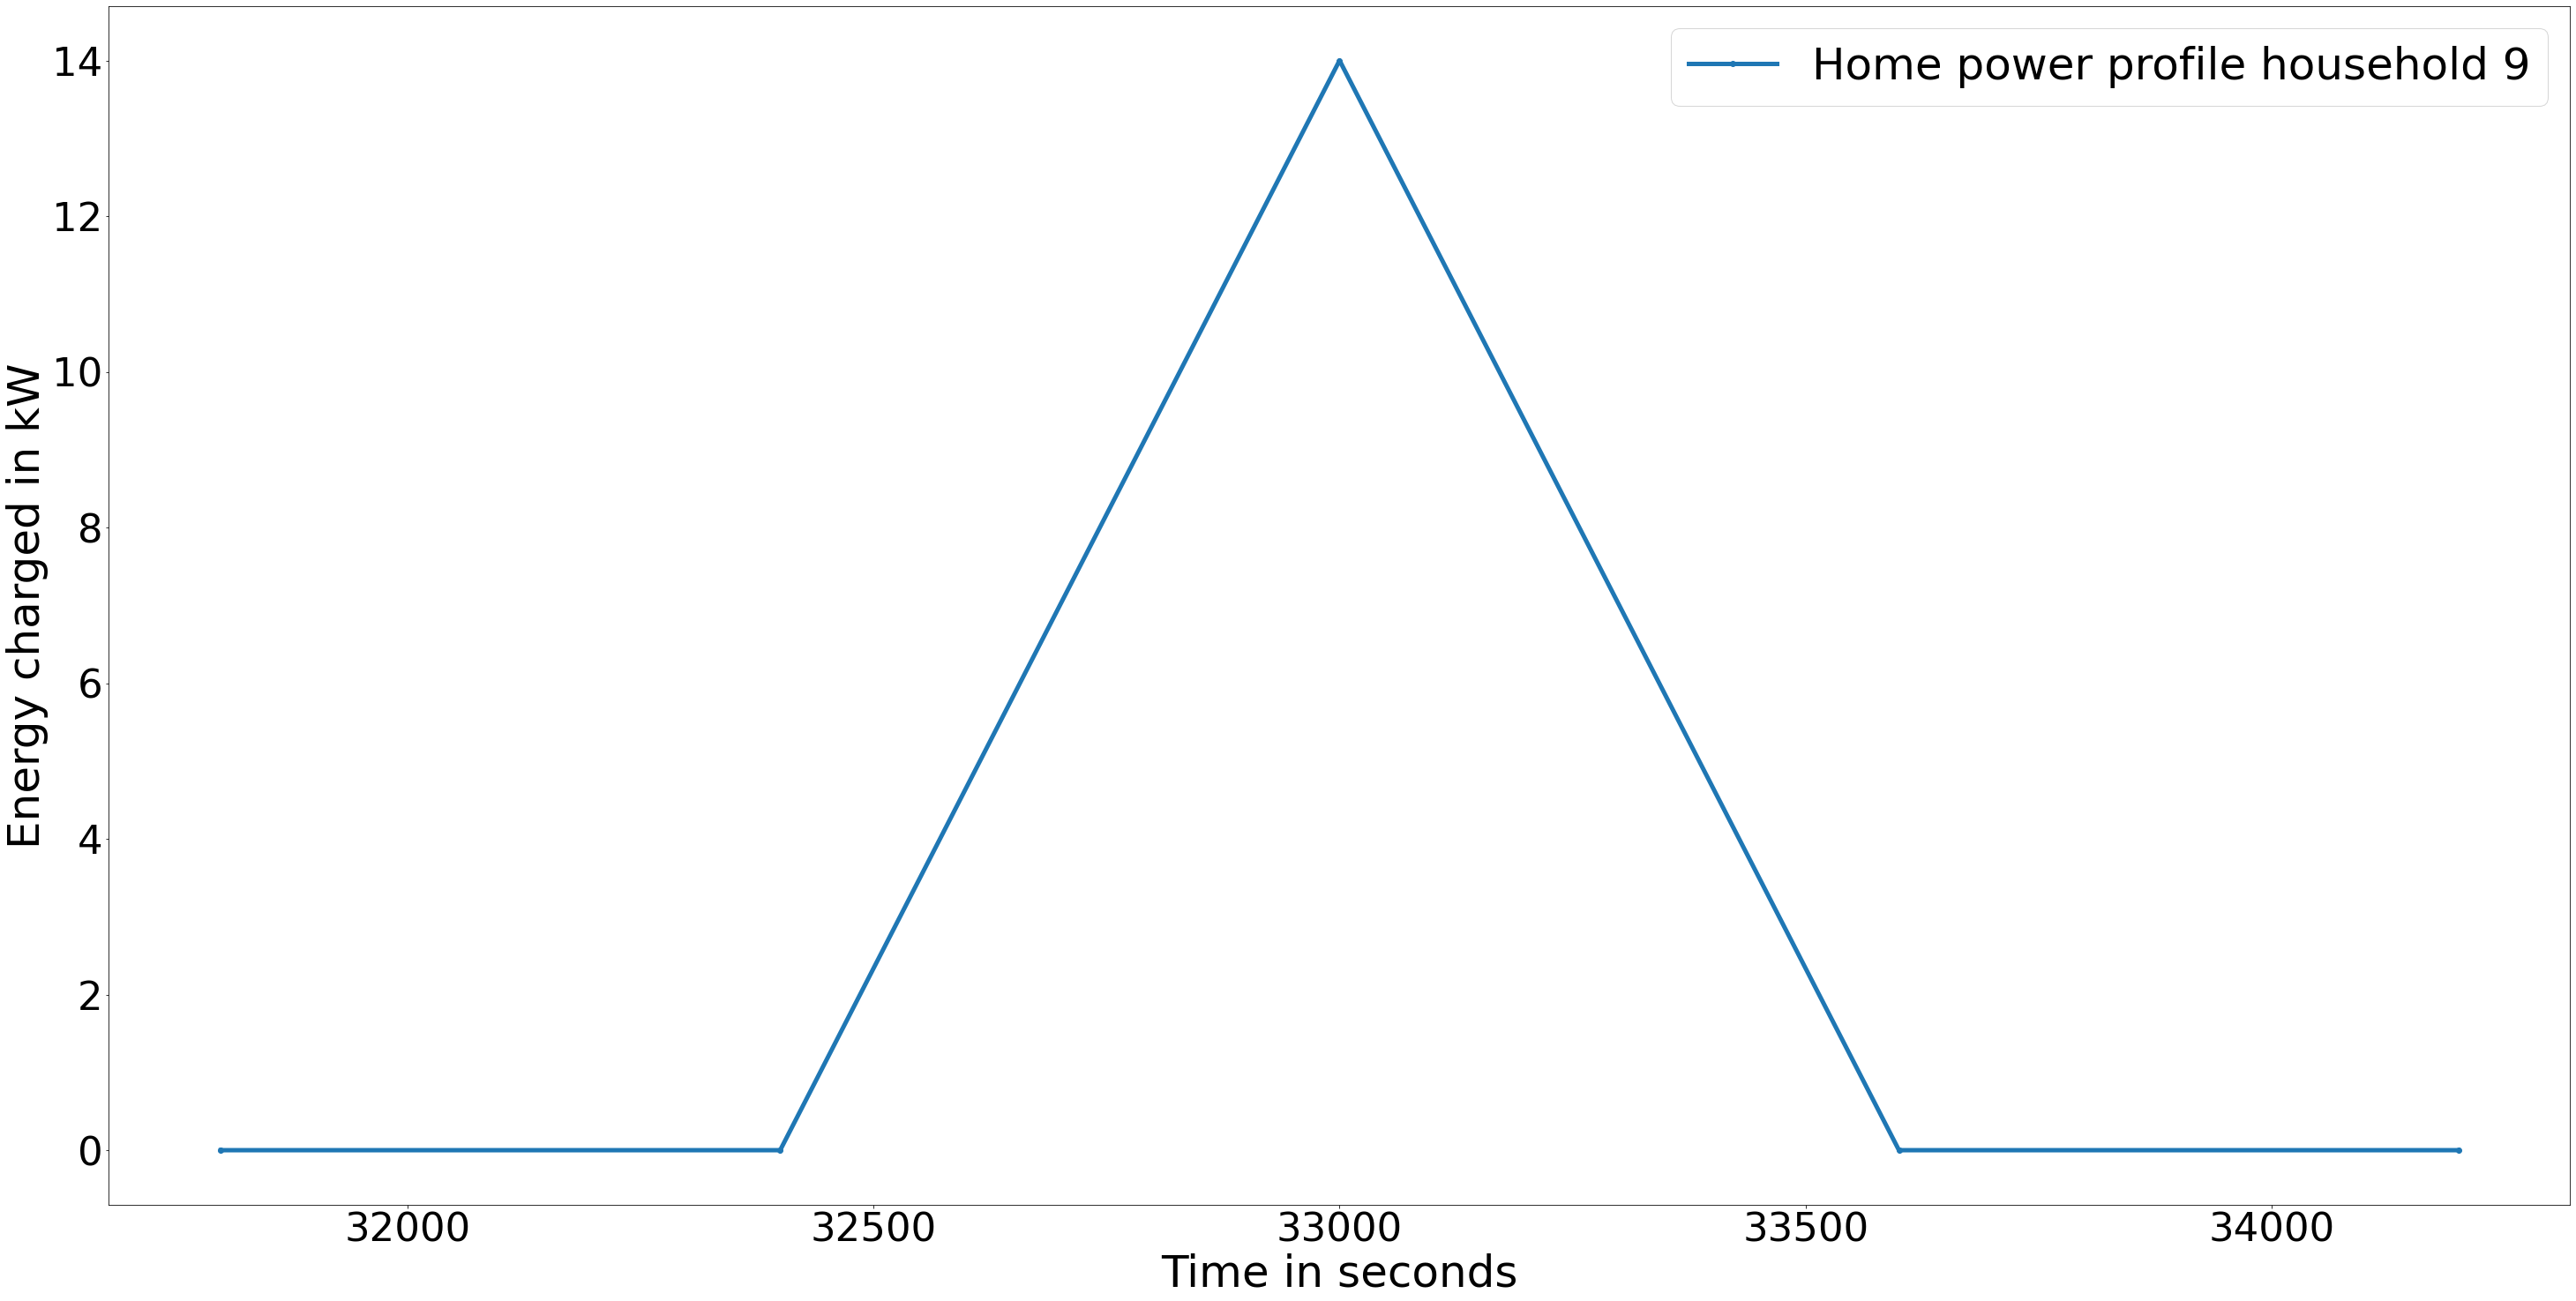

In [62]:
df_sum9.plot(x ='step', y='hh9_homecs', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Home power profile household 9'], fontsize=50)
plt.xlabel('Time in seconds', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

In [63]:
df_sum10= df_sum[df_sum['charging_station'].str.contains("hh10_ev.*_homecs")]
df_sum10 = df_sum10.groupby(['step']).size().reset_index(name="count")
df_sum10['hh10_homecs'] = df_sum10['count'] * 7
df_sum10 = df_sum10.drop(df_sum10.columns[[1]], axis=1)
df_sum10

,step,hh10_homecs
0,38400,28
1,39000,63
2,39600,14


In [64]:
new_row1 = {'step':37800, 'hh10_homecs':0}
new_row2 = {'step':37200, 'hh10_homecs':0}
new_row3 = {'step':40200, 'hh10_homecs':0}
new_row4 = {'step':40800, 'hh10_homecs':0}
#append row to the dataframe
df_sum10 = df_sum10.append(new_row1, ignore_index=True)
df_sum10 = df_sum10.append(new_row2, ignore_index=True)
df_sum10 = df_sum10.append(new_row3, ignore_index=True)
df_sum10 = df_sum10.append(new_row4, ignore_index=True)
df_sum10 = df_sum10.sort_values('step')
df_sum10

,step,hh10_homecs
4,37200,0
3,37800,0
0,38400,28
1,39000,63
2,39600,14
5,40200,0
6,40800,0


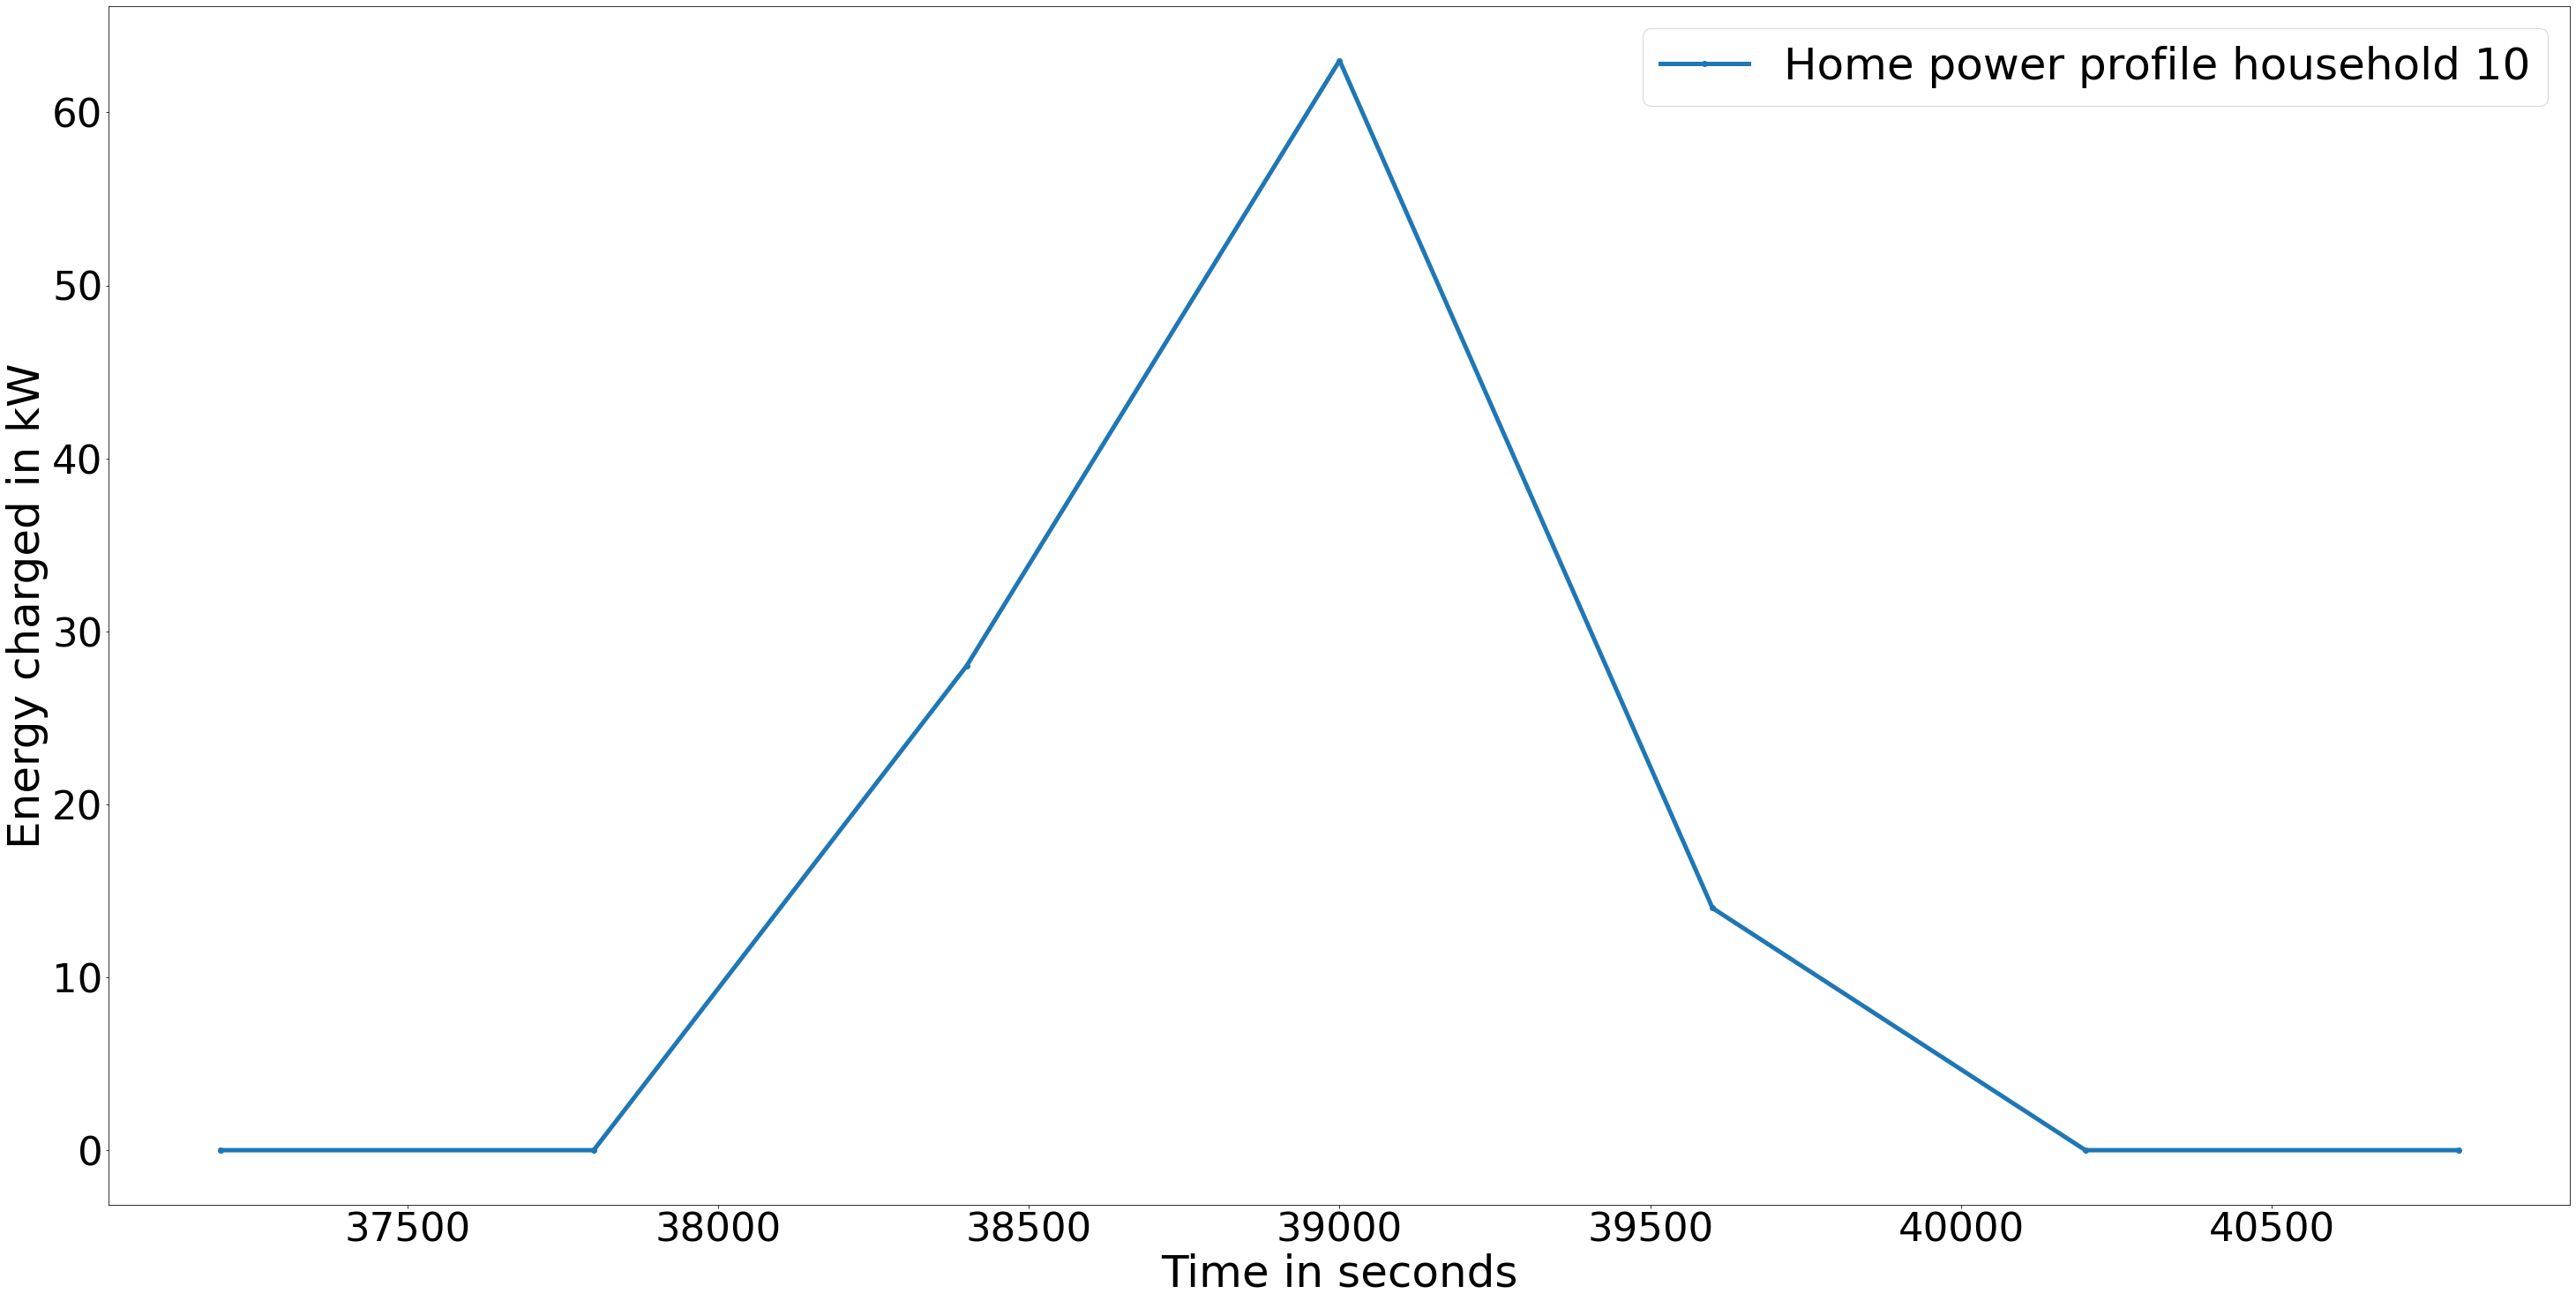

In [65]:
df_sum10.plot(x ='step', y='hh10_homecs', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Home power profile household 10'], fontsize=50)
plt.xlabel('Time in seconds', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

In [66]:
df_sum11= df_sum[df_sum['charging_station'].str.contains("hh11_ev.*_homecs")]
df_sum11 = df_sum11.groupby(['step']).size().reset_index(name="count")
df_sum11 = df_sum11.drop(range(9,26))
df_sum11['hh11_homecs'] = df_sum11['count'] * 7
df_sum11 = df_sum11.drop(df_sum11.columns[[1]], axis=1)
df_sum11

,step,hh11_homecs
0,32400,49
1,33000,63
2,33600,63
3,34200,70
4,34800,56
5,35400,42
6,36000,14
7,36600,14
8,37200,7


In [67]:
new_row1 = {'step':31800, 'hh11_homecs':0}
new_row2 = {'step':31200, 'hh11_homecs':0}
new_row3 = {'step':37800, 'hh11_homecs':0}
new_row4 = {'step':38400, 'hh11_homecs':0}
#append row to the dataframe
df_sum11 = df_sum11.append(new_row1, ignore_index=True)
df_sum11 = df_sum11.append(new_row2, ignore_index=True)
df_sum11 = df_sum11.append(new_row3, ignore_index=True)
df_sum11 = df_sum11.append(new_row4, ignore_index=True)
df_sum11 = df_sum11.sort_values('step')
df_sum11

,step,hh11_homecs
10,31200,0
9,31800,0
0,32400,49
1,33000,63
2,33600,63
3,34200,70
4,34800,56
5,35400,42
6,36000,14
7,36600,14


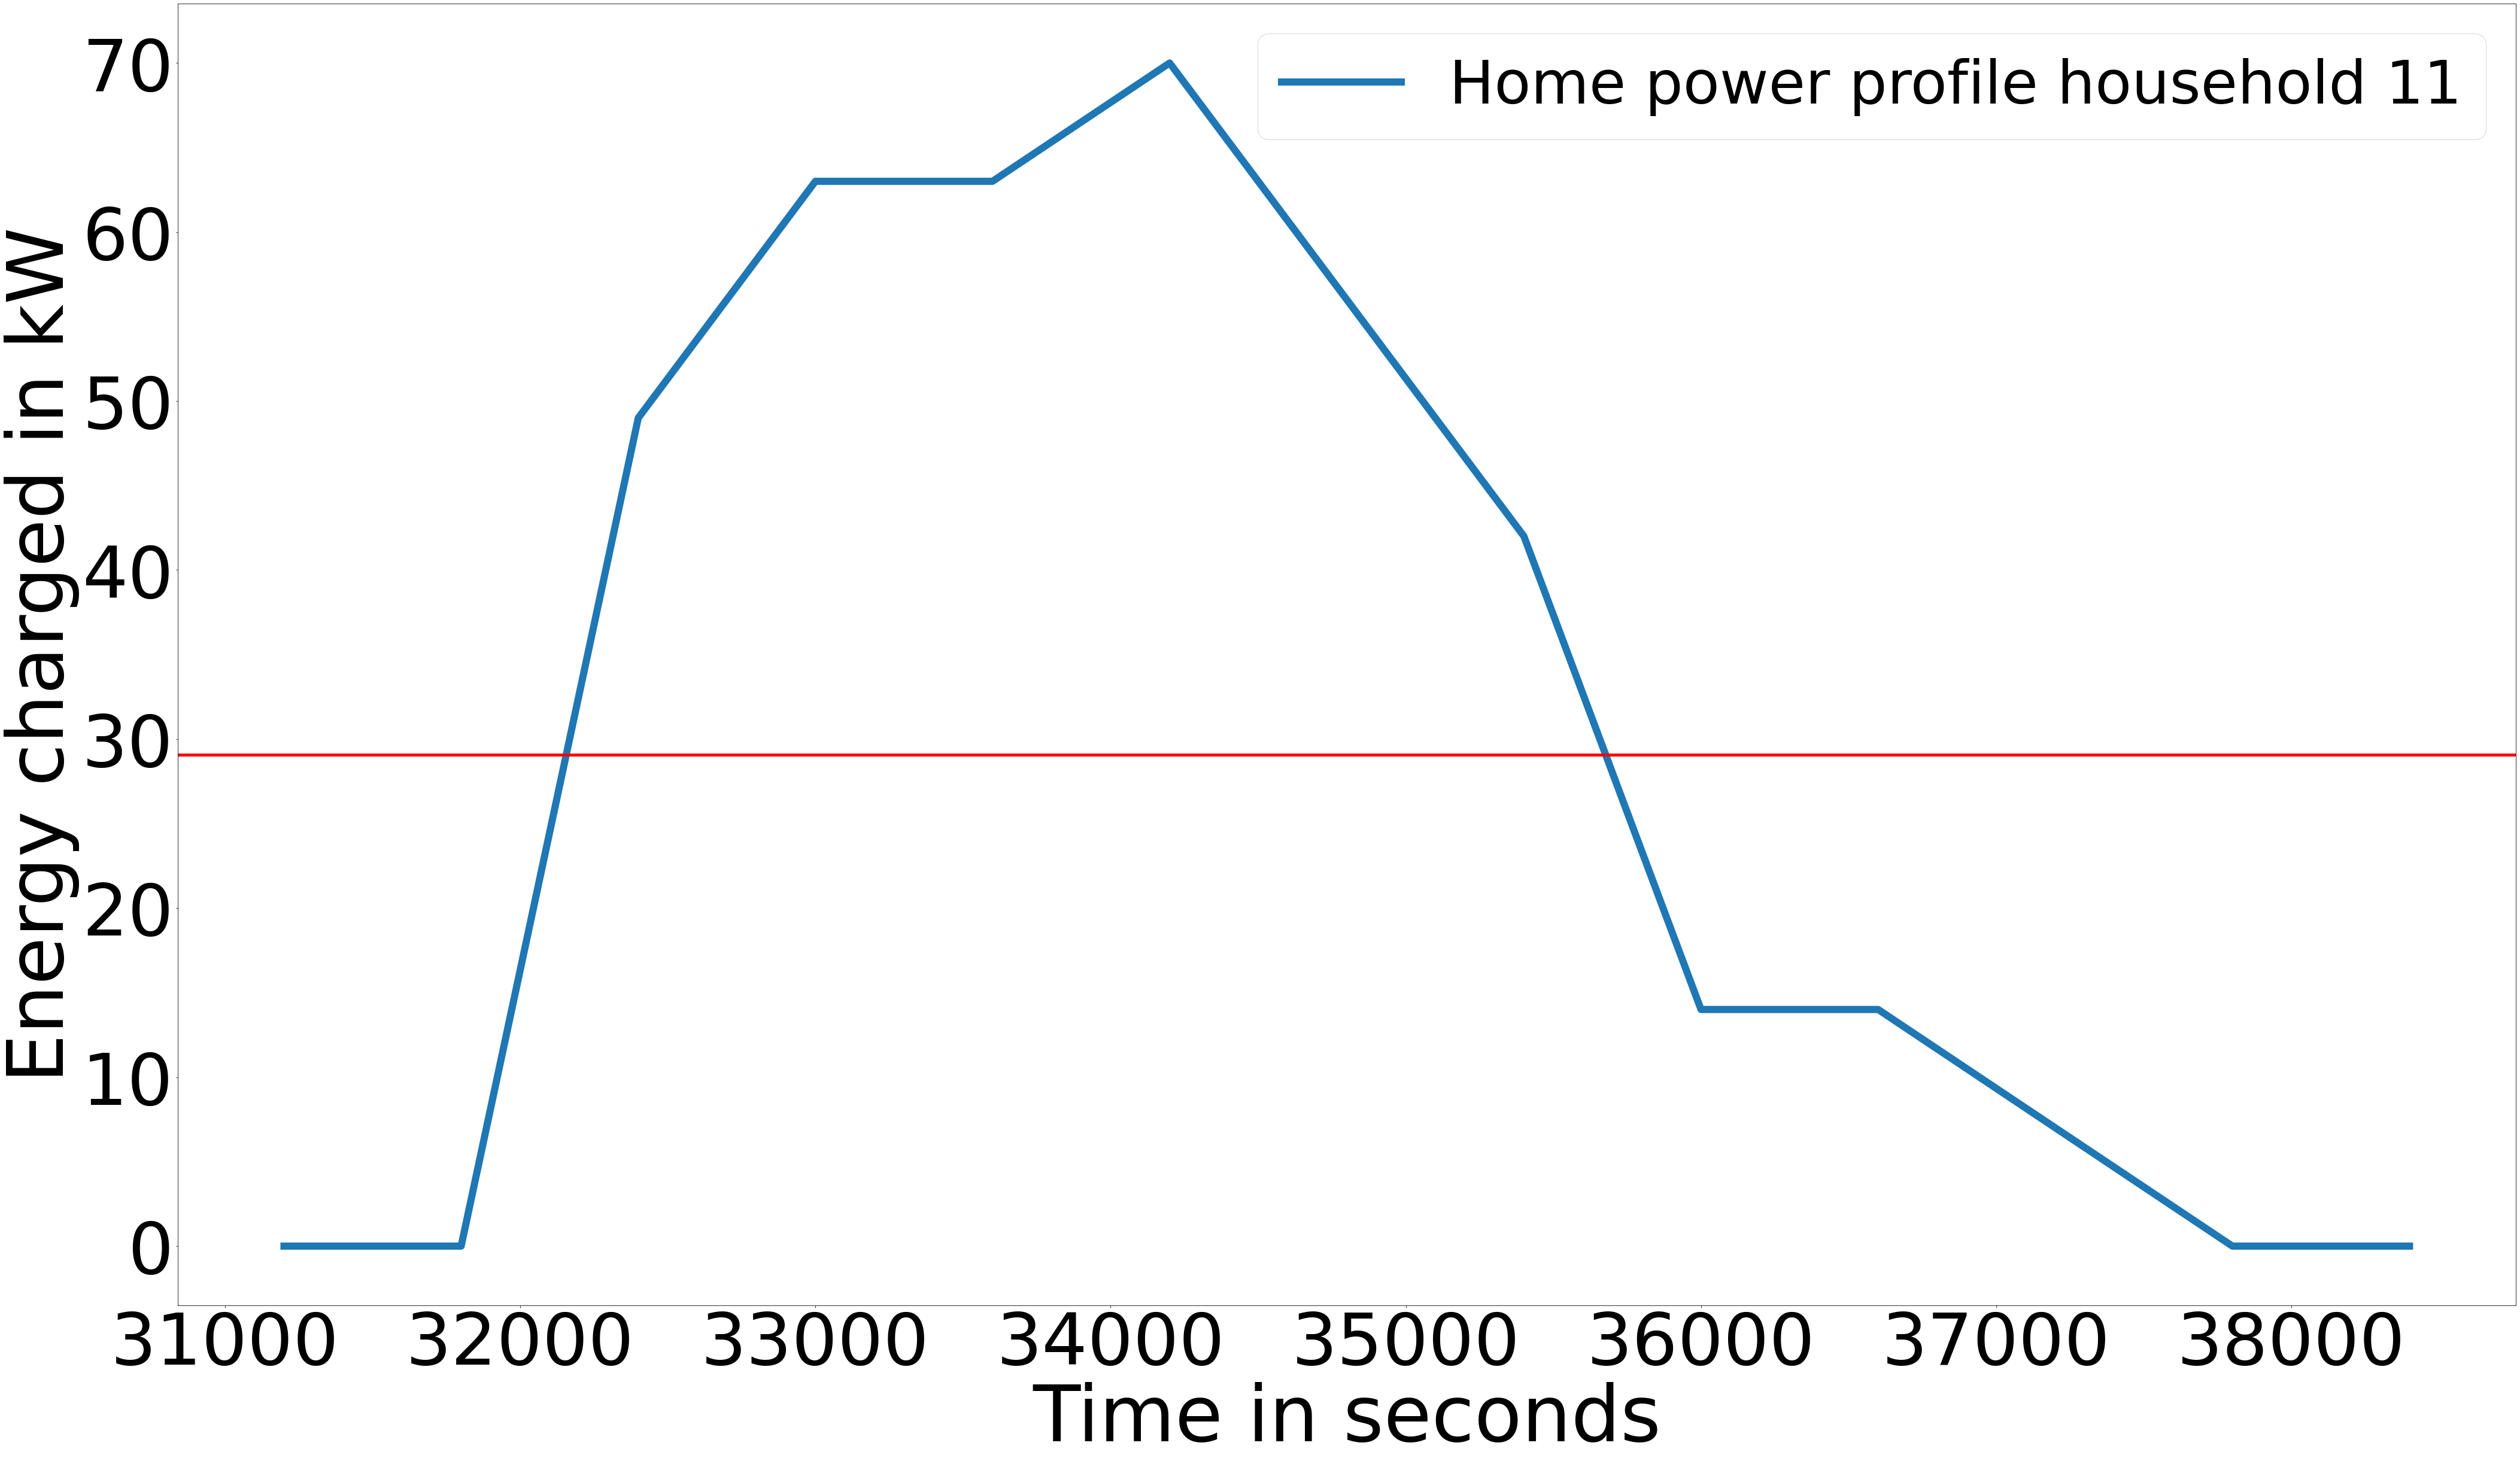

In [68]:
df_sum11.plot(x ='step', y='hh11_homecs', kind = 'line', lw = 12, figsize=(70,40), fontsize=120, style='o-')
plt.legend(['Home power profile household 11'], fontsize=100)
plt.xlabel('Time in seconds', fontsize=130)
plt.ylabel('Energy charged in kW', fontsize=130)
plt.axhline(y=29.08, color='r', linestyle='-', lw=5)
plt.show()

In [69]:
df_sum11.describe()


,step,hh11_homecs
count,13.000000,13.000000
mean,34800.000000,29.076923
std,2336.664289,28.267949
min,31200.000000,0.000000
25%,33000.000000,0.000000
50%,34800.000000,14.000000
75%,36600.000000,56.000000
max,38400.000000,70.000000


In [70]:
print(df_sum11['hh11_homecs'].sum())

378


In [71]:
df_sum12= df_sum[df_sum['charging_station'].str.contains("hh12_ev.*_homecs")]
df_sum12 = df_sum12.groupby(['step']).size().reset_index(name="count")
df_sum12['hh12_homecs'] = df_sum12['count'] * 7
df_sum12 = df_sum12.drop(df_sum12.columns[[1]], axis=1)
df_sum12

,step,hh12_homecs
0,37200,14
1,37800,56
2,38400,14


In [72]:
new_row1 = {'step':36600, 'hh12_homecs':0}
new_row2 = {'step':36000, 'hh12_homecs':0}
new_row3 = {'step':39000, 'hh12_homecs':0}
new_row4 = {'step':39600, 'hh12_homecs':0}
#append row to the dataframe
df_sum12 = df_sum12.append(new_row1, ignore_index=True)
df_sum12 = df_sum12.append(new_row2, ignore_index=True)
df_sum12 = df_sum12.append(new_row3, ignore_index=True)
df_sum12 = df_sum12.append(new_row4, ignore_index=True)
df_sum12 = df_sum12.sort_values('step')
df_sum12

,step,hh12_homecs
4,36000,0
3,36600,0
0,37200,14
1,37800,56
2,38400,14
5,39000,0
6,39600,0


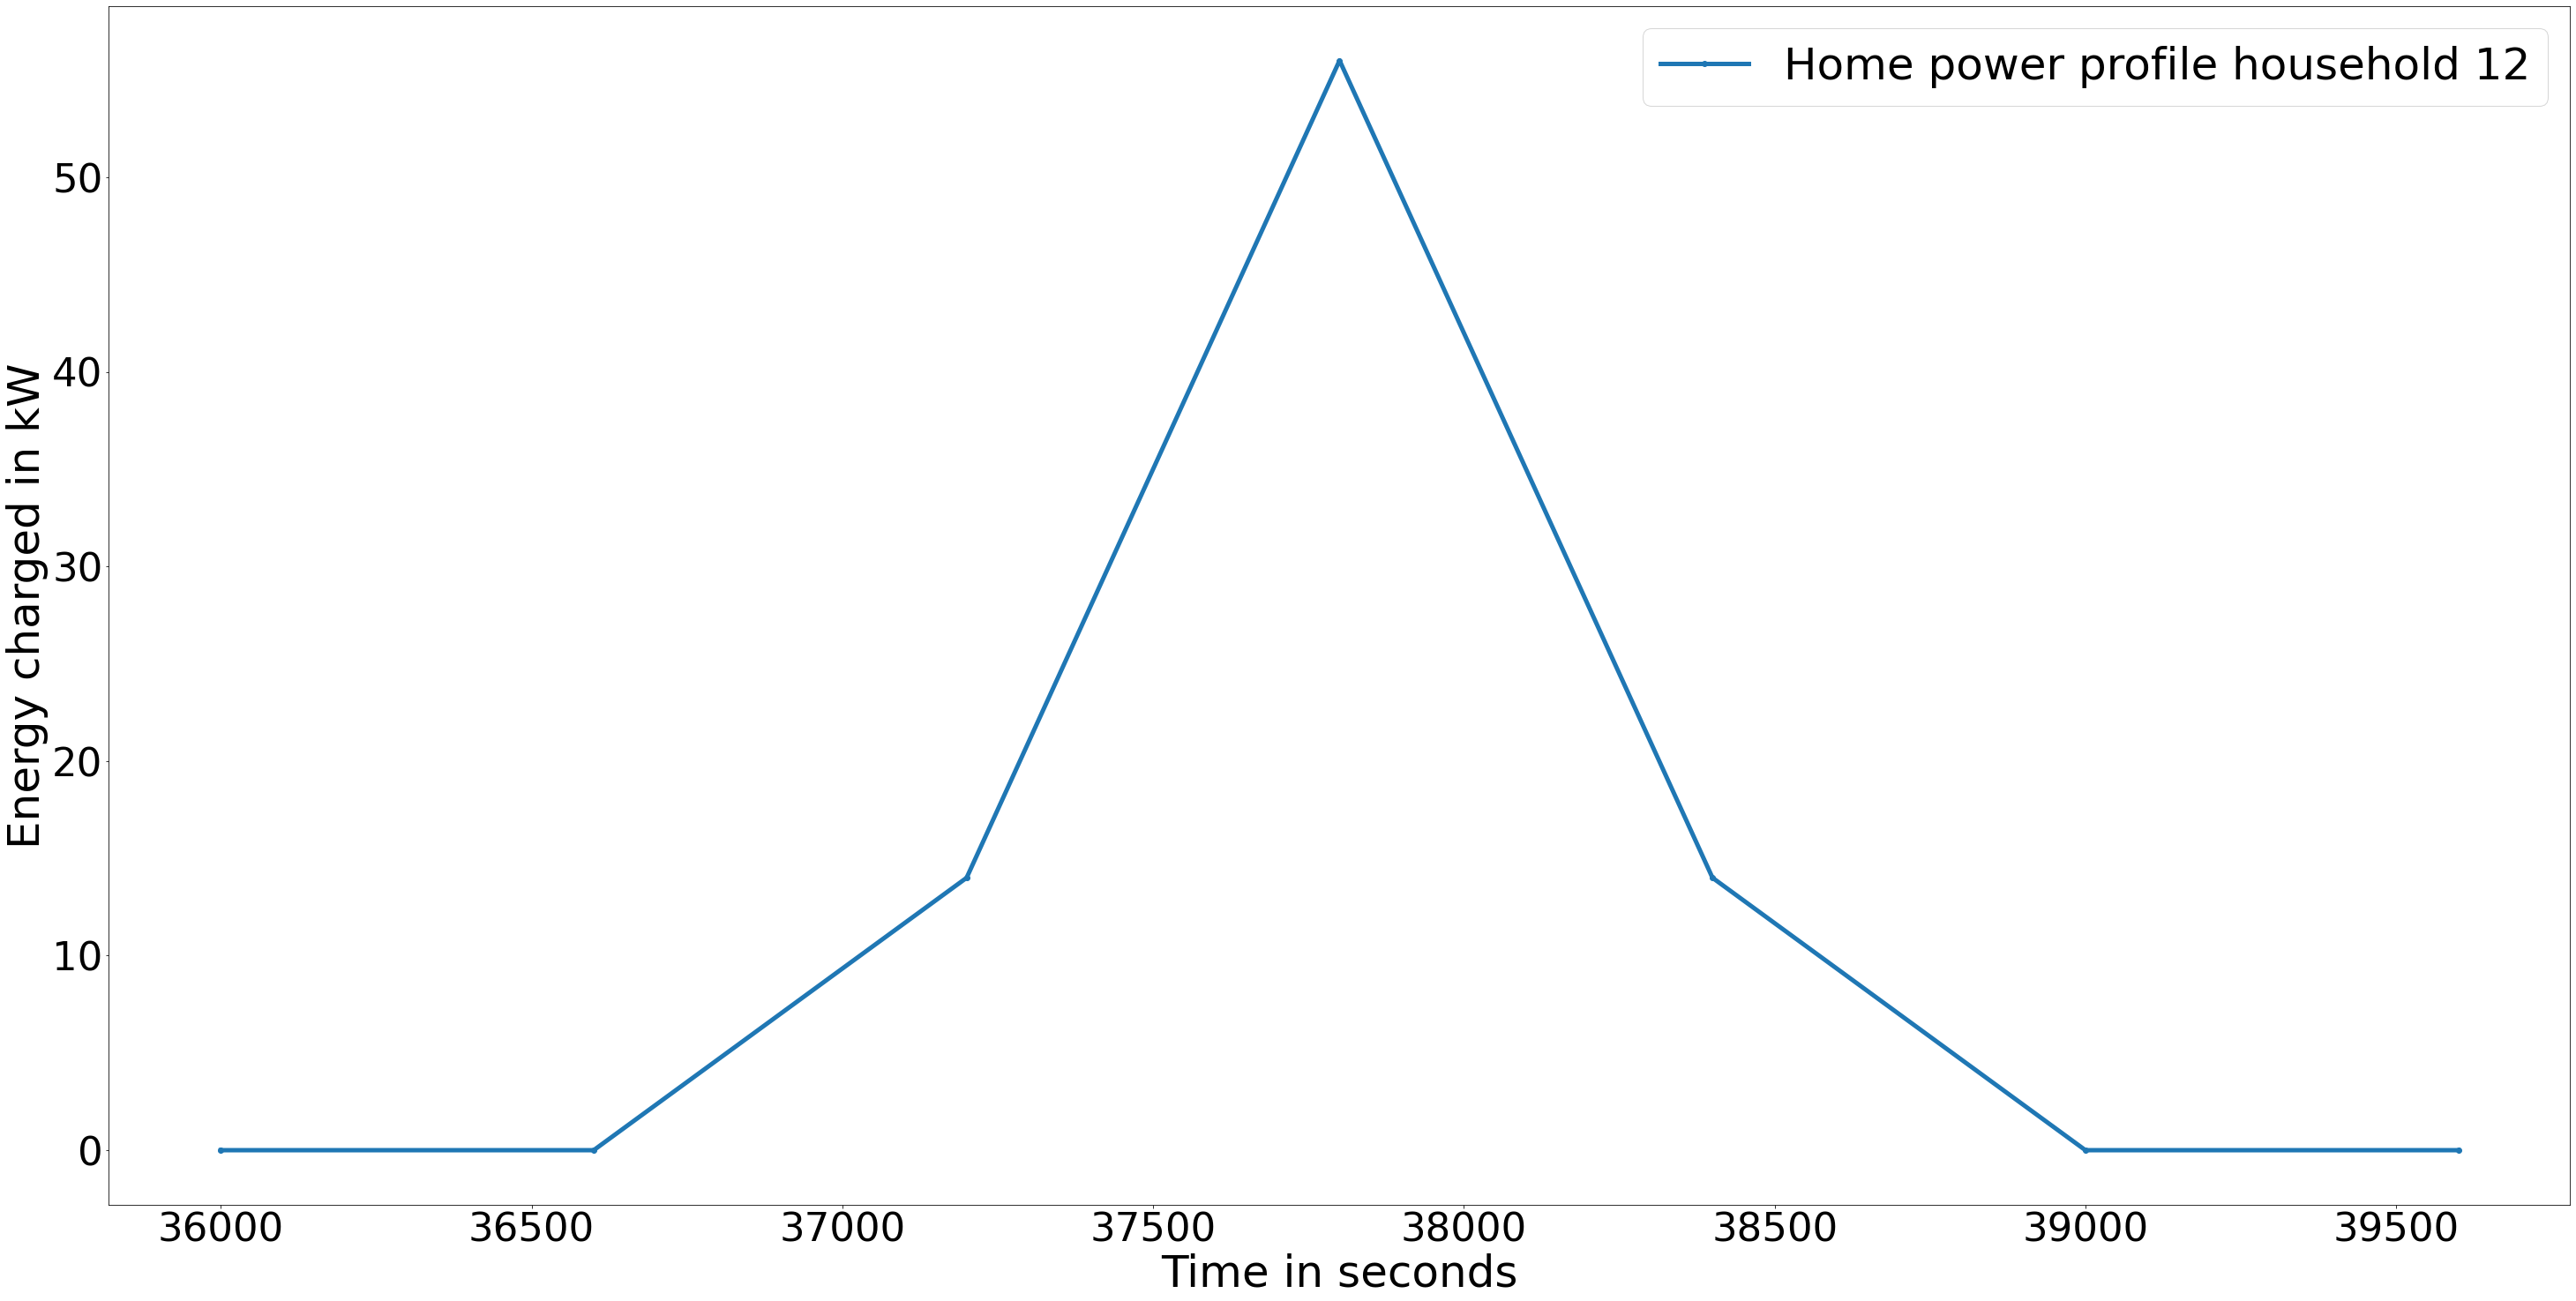

In [73]:
df_sum12.plot(x ='step', y='hh12_homecs', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Home power profile household 12'], fontsize=50)
plt.xlabel('Time in seconds', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

In [74]:
df_sum13= df_sum[df_sum['charging_station'].str.contains("hh13_ev.*_homecs")]
df_sum13 = df_sum13.groupby(['step']).size().reset_index(name="count")
df_sum13['hh13_homecs'] = df_sum13['count'] * 7
df_sum13 = df_sum13.drop(df_sum13.columns[[1]], axis=1)
df_sum13

,step,hh13_homecs
0,33000,7
1,33600,7
2,34200,7


In [75]:
new_row1 = {'step':32400, 'hh13_homecs':0}
new_row2 = {'step':31800, 'hh13_homecs':0}
new_row3 = {'step':35000, 'hh13_homecs':0}
new_row4 = {'step':35600, 'hh13_homecs':0}
#append row to the dataframe
df_sum13 = df_sum13.append(new_row1, ignore_index=True)
df_sum13 = df_sum13.append(new_row2, ignore_index=True)
df_sum13 = df_sum13.append(new_row3, ignore_index=True)
df_sum13 = df_sum13.append(new_row4, ignore_index=True)
df_sum13 = df_sum13.sort_values('step')
df_sum13

,step,hh13_homecs
4,31800,0
3,32400,0
0,33000,7
1,33600,7
2,34200,7
5,35000,0
6,35600,0


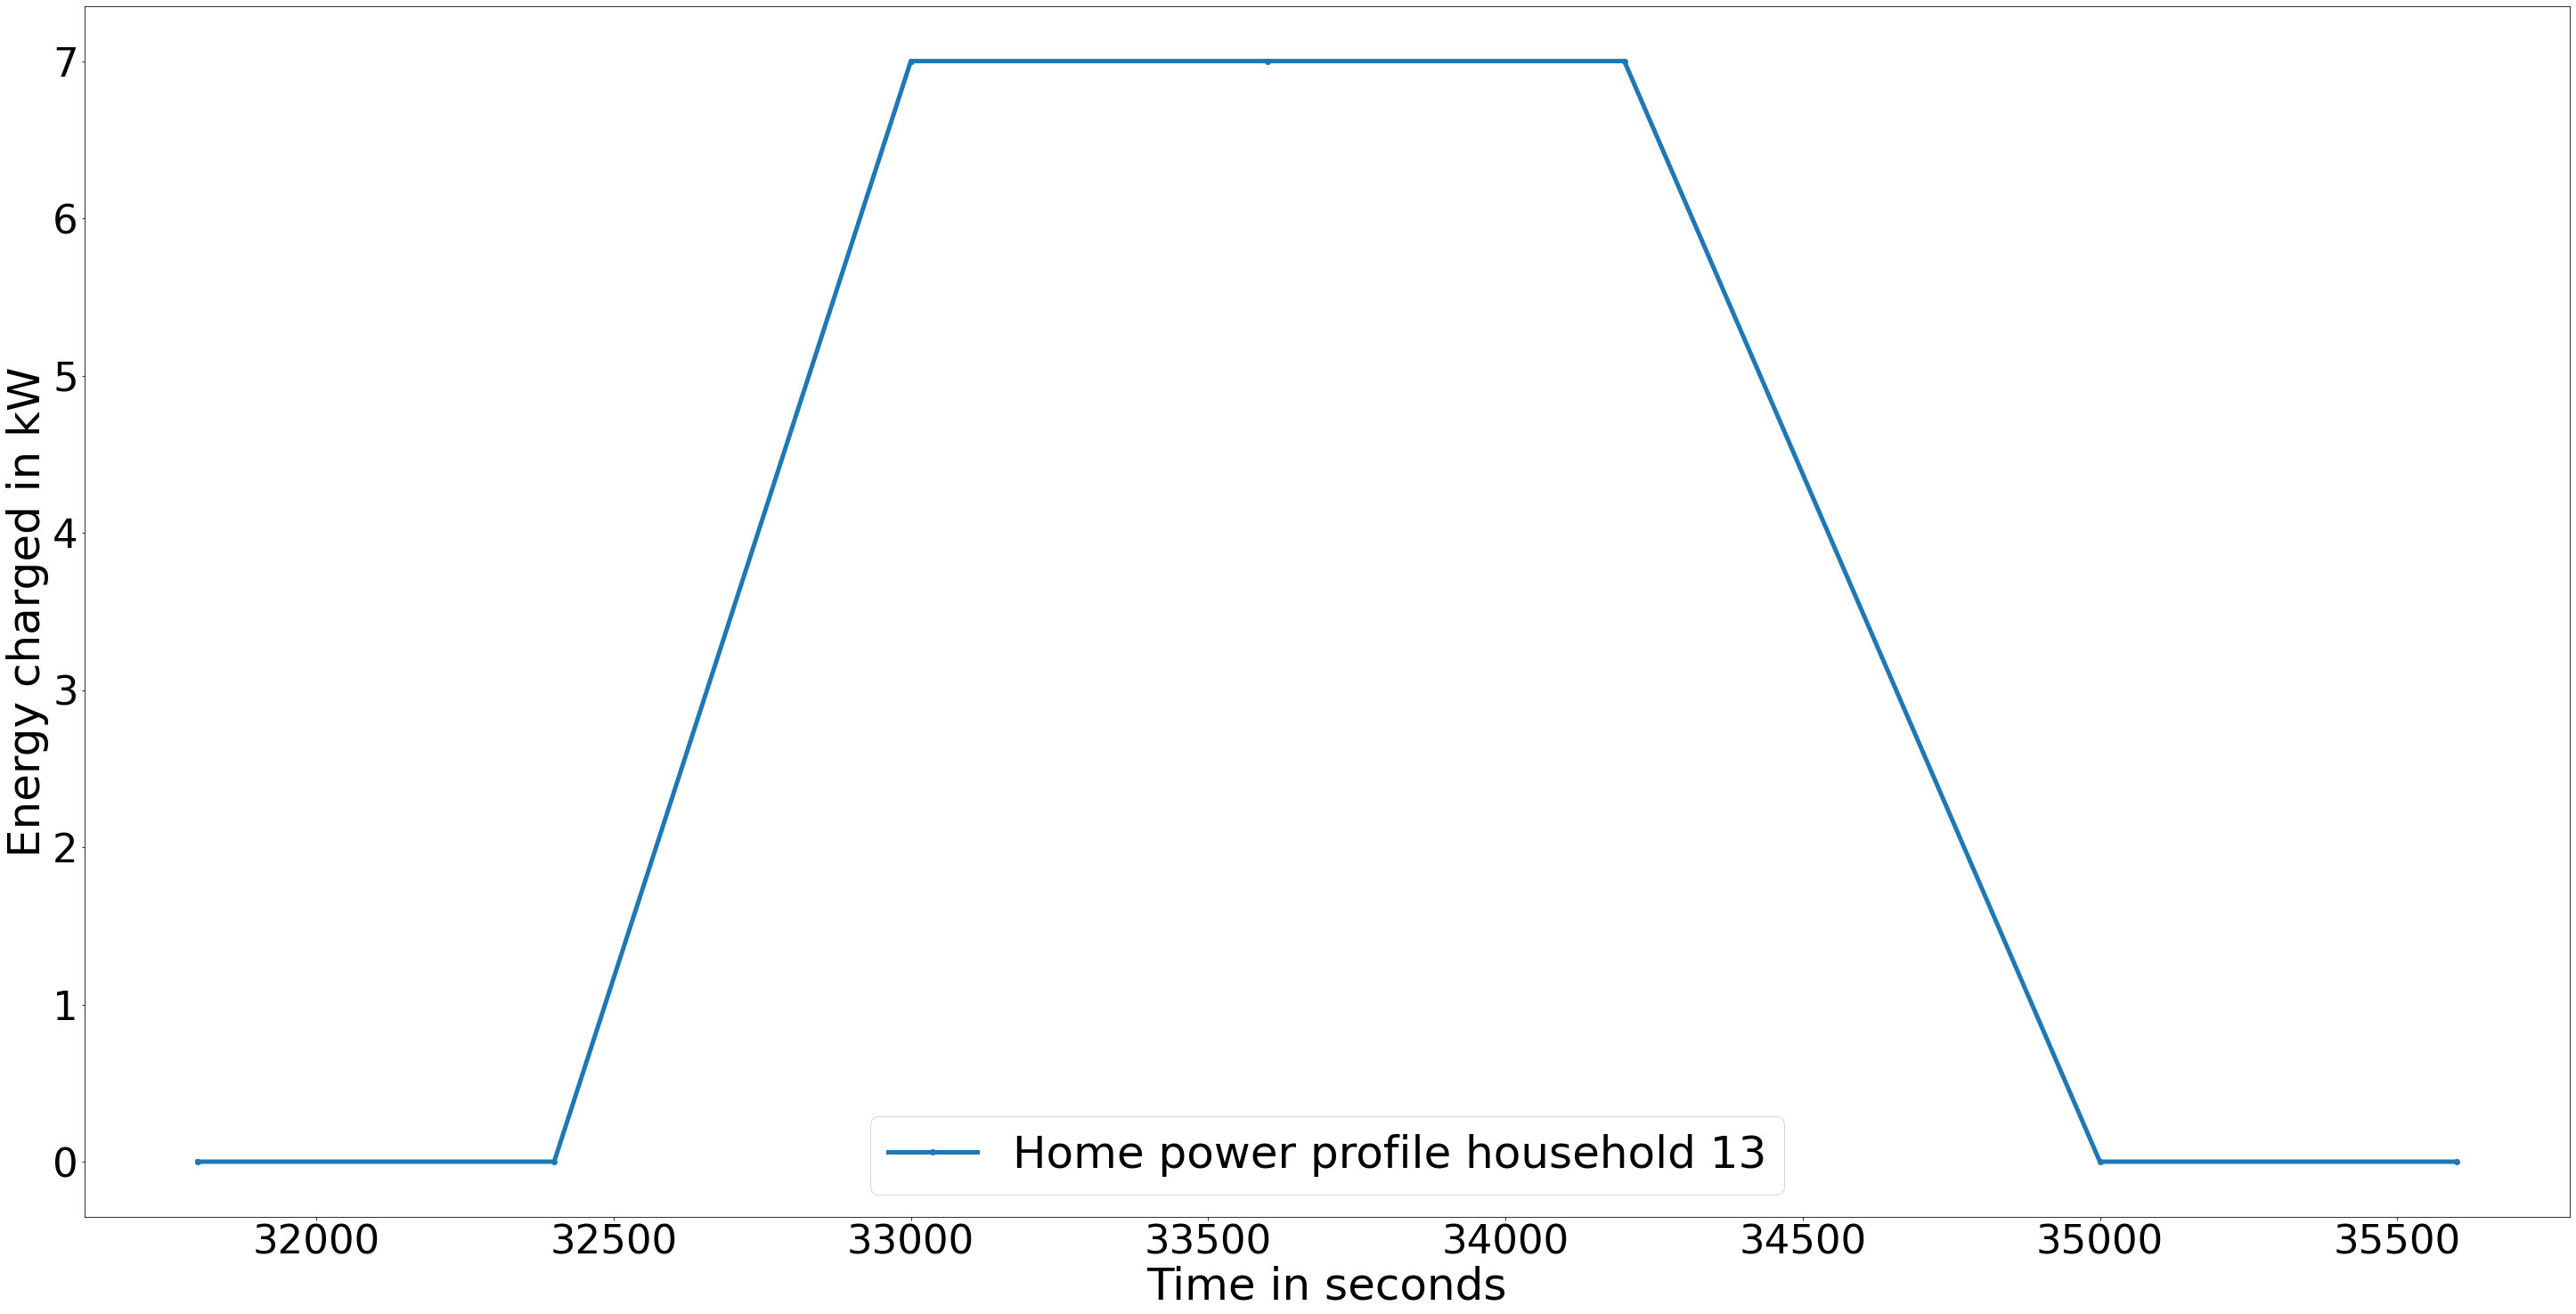

In [76]:
df_sum13.plot(x ='step', y='hh13_homecs', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Home power profile household 13'], fontsize=50)
plt.xlabel('Time in seconds', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

In [77]:
df_sum14= df_sum[df_sum['charging_station'].str.contains("hh14_ev.*_homecs")]
df_sum14 = df_sum14.groupby(['step']).size().reset_index(name="count")
df_sum14['hh14_homecs'] = df_sum14['count'] * 7
df_sum14 = df_sum14.drop(df_sum14.columns[[1]], axis=1)
df_sum14

,step,hh14_homecs
0,45600,7
1,46200,14
2,46800,7


In [78]:
new_row1 = {'step':45000, 'hh14_homecs':0}
new_row2 = {'step':44400, 'hh14_homecs':0}
new_row3 = {'step':47400, 'hh14_homecs':0}
new_row4 = {'step':48000, 'hh14_homecs':0}
#append row to the dataframe
df_sum14 = df_sum14.append(new_row1, ignore_index=True)
df_sum14 = df_sum14.append(new_row2, ignore_index=True)
df_sum14 = df_sum14.append(new_row3, ignore_index=True)
df_sum14 = df_sum14.append(new_row4, ignore_index=True)
df_sum14 = df_sum14.sort_values('step')
df_sum14

,step,hh14_homecs
4,44400,0
3,45000,0
0,45600,7
1,46200,14
2,46800,7
5,47400,0
6,48000,0


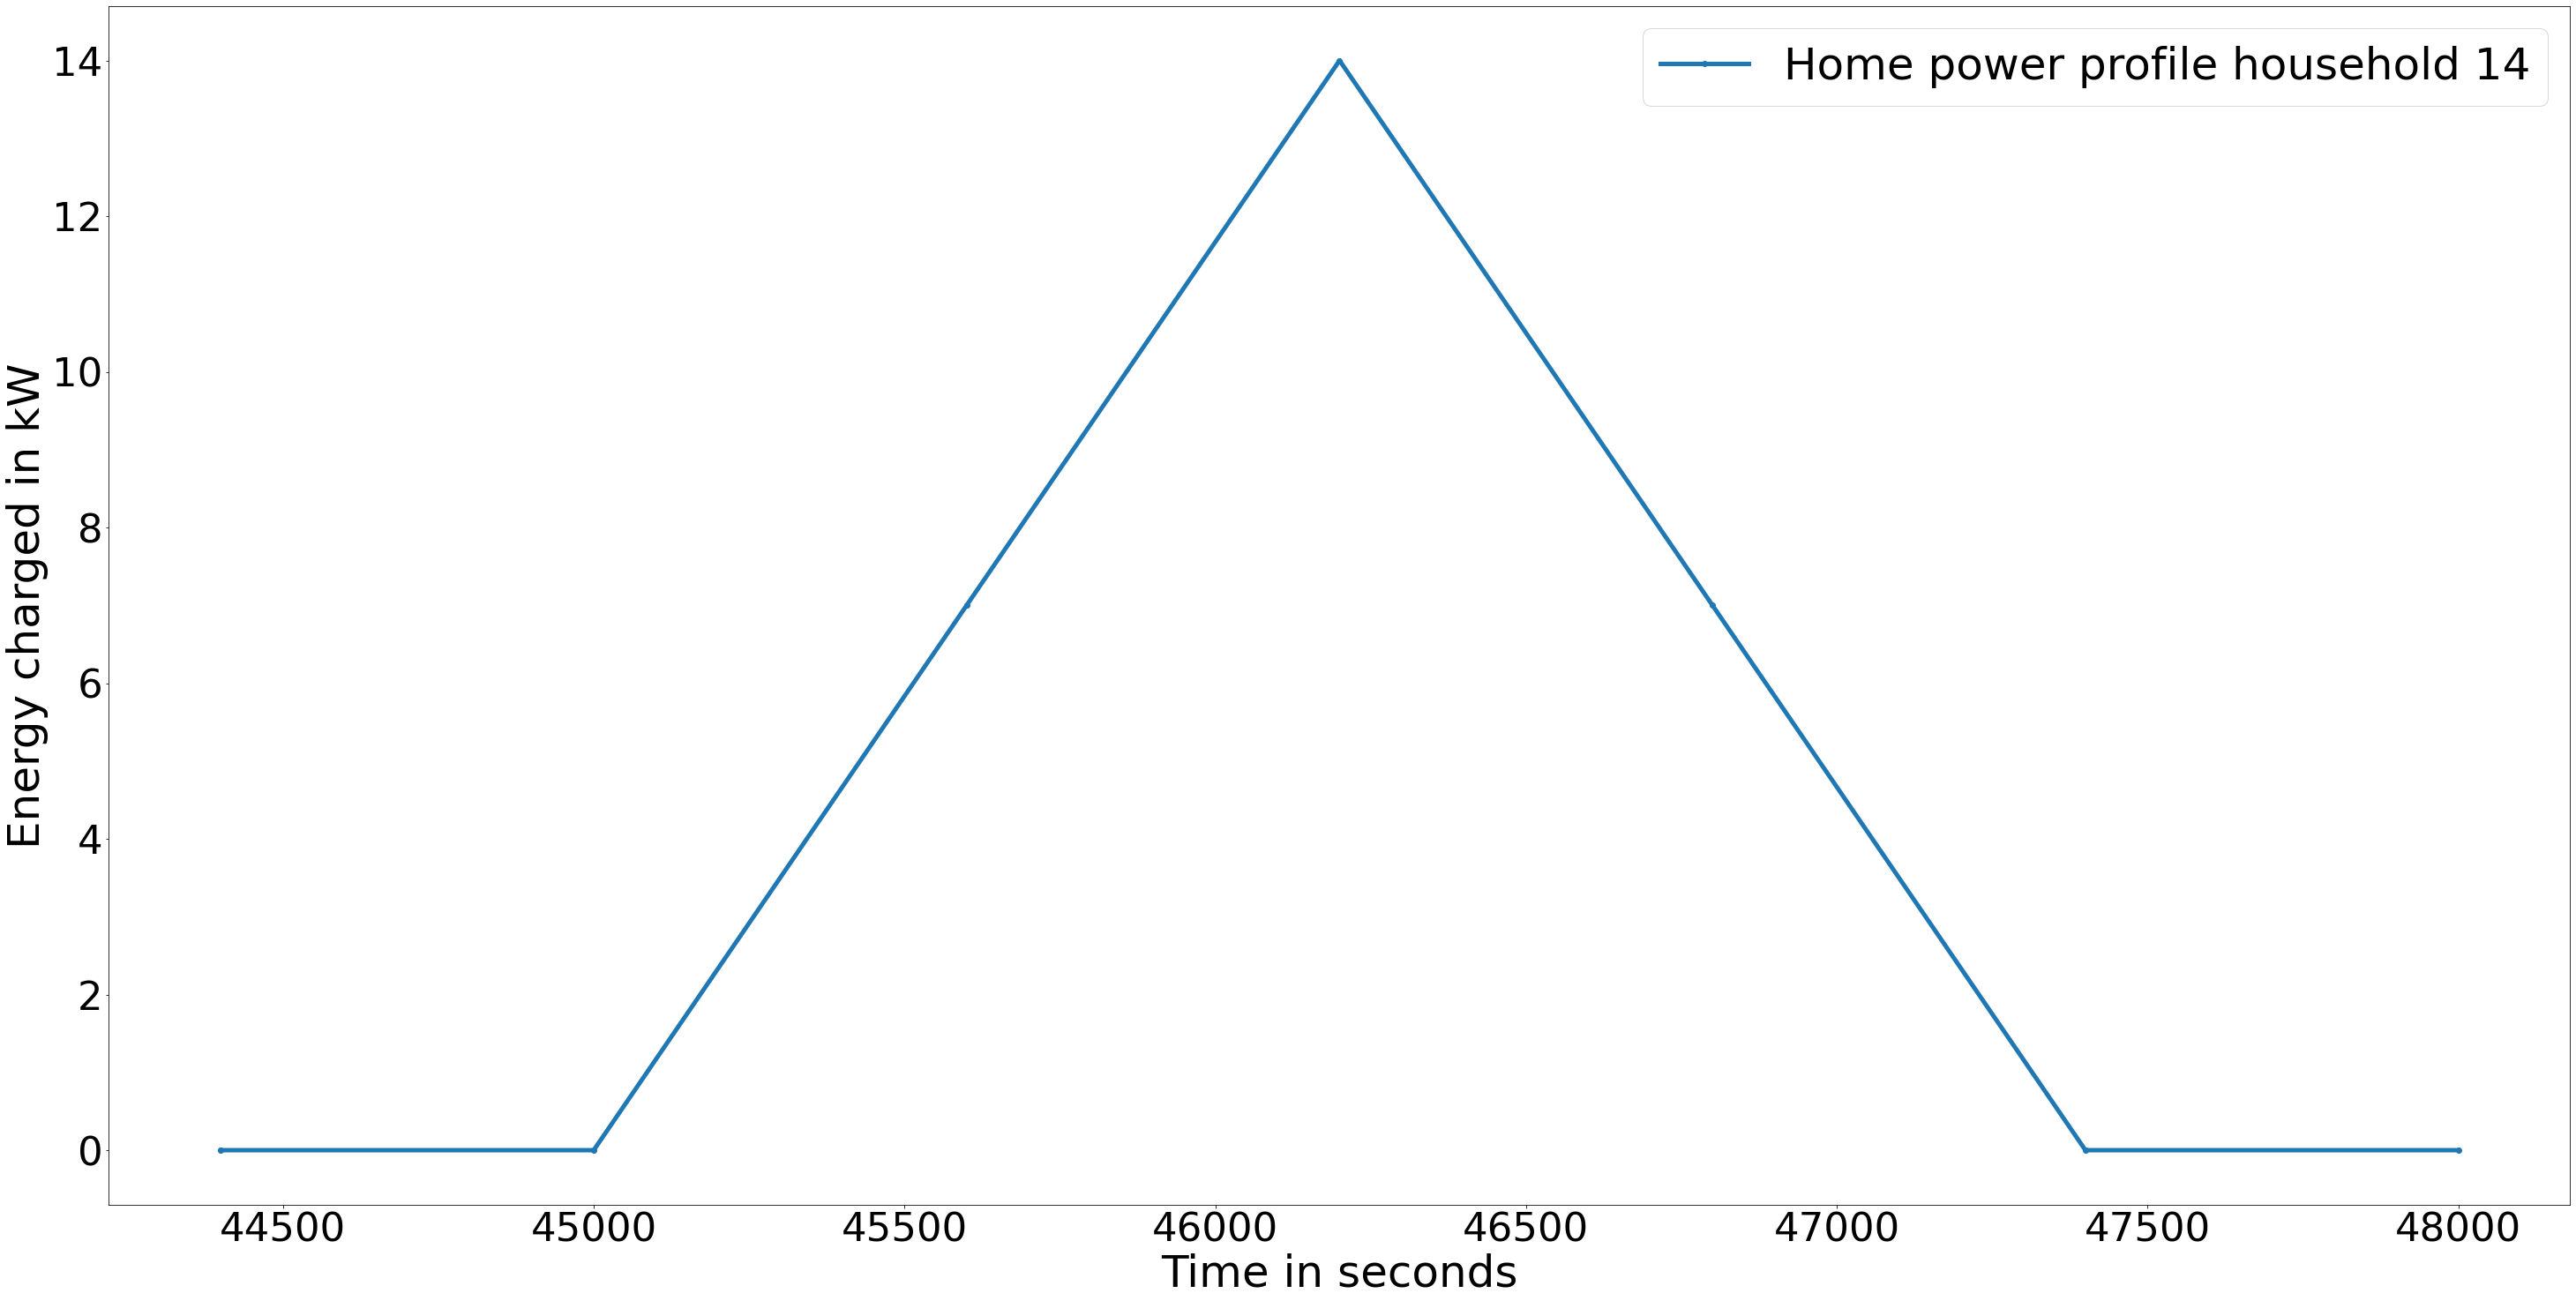

In [79]:
df_sum14.plot(x ='step', y='hh14_homecs', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Home power profile household 14'], fontsize=50)
plt.xlabel('Time in seconds', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

In [80]:
df_sum15= df_sum[df_sum['charging_station'].str.contains("hh15_ev.*_homecs")]
df_sum15 = df_sum15.groupby(['step']).size().reset_index(name="count")
df_sum15['hh15_homecs'] = df_sum15['count'] * 7
df_sum15 = df_sum15.drop(df_sum15.columns[[1]], axis=1)
df_sum15

,step,hh15_homecs
0,38400,49
1,39000,21


In [81]:
new_row1 = {'step':37800, 'hh15_homecs':0}
new_row2 = {'step':37200, 'hh15_homecs':0}
new_row3 = {'step':39600, 'hh15_homecs':0}
new_row4 = {'step':40200, 'hh15_homecs':0}
#append row to the dataframe
df_sum15 = df_sum15.append(new_row1, ignore_index=True)
df_sum15 = df_sum15.append(new_row2, ignore_index=True)
df_sum15 = df_sum15.append(new_row3, ignore_index=True)
df_sum15 = df_sum15.append(new_row4, ignore_index=True)
df_sum15 = df_sum15.sort_values('step')
df_sum15

,step,hh15_homecs
3,37200,0
2,37800,0
0,38400,49
1,39000,21
4,39600,0
5,40200,0


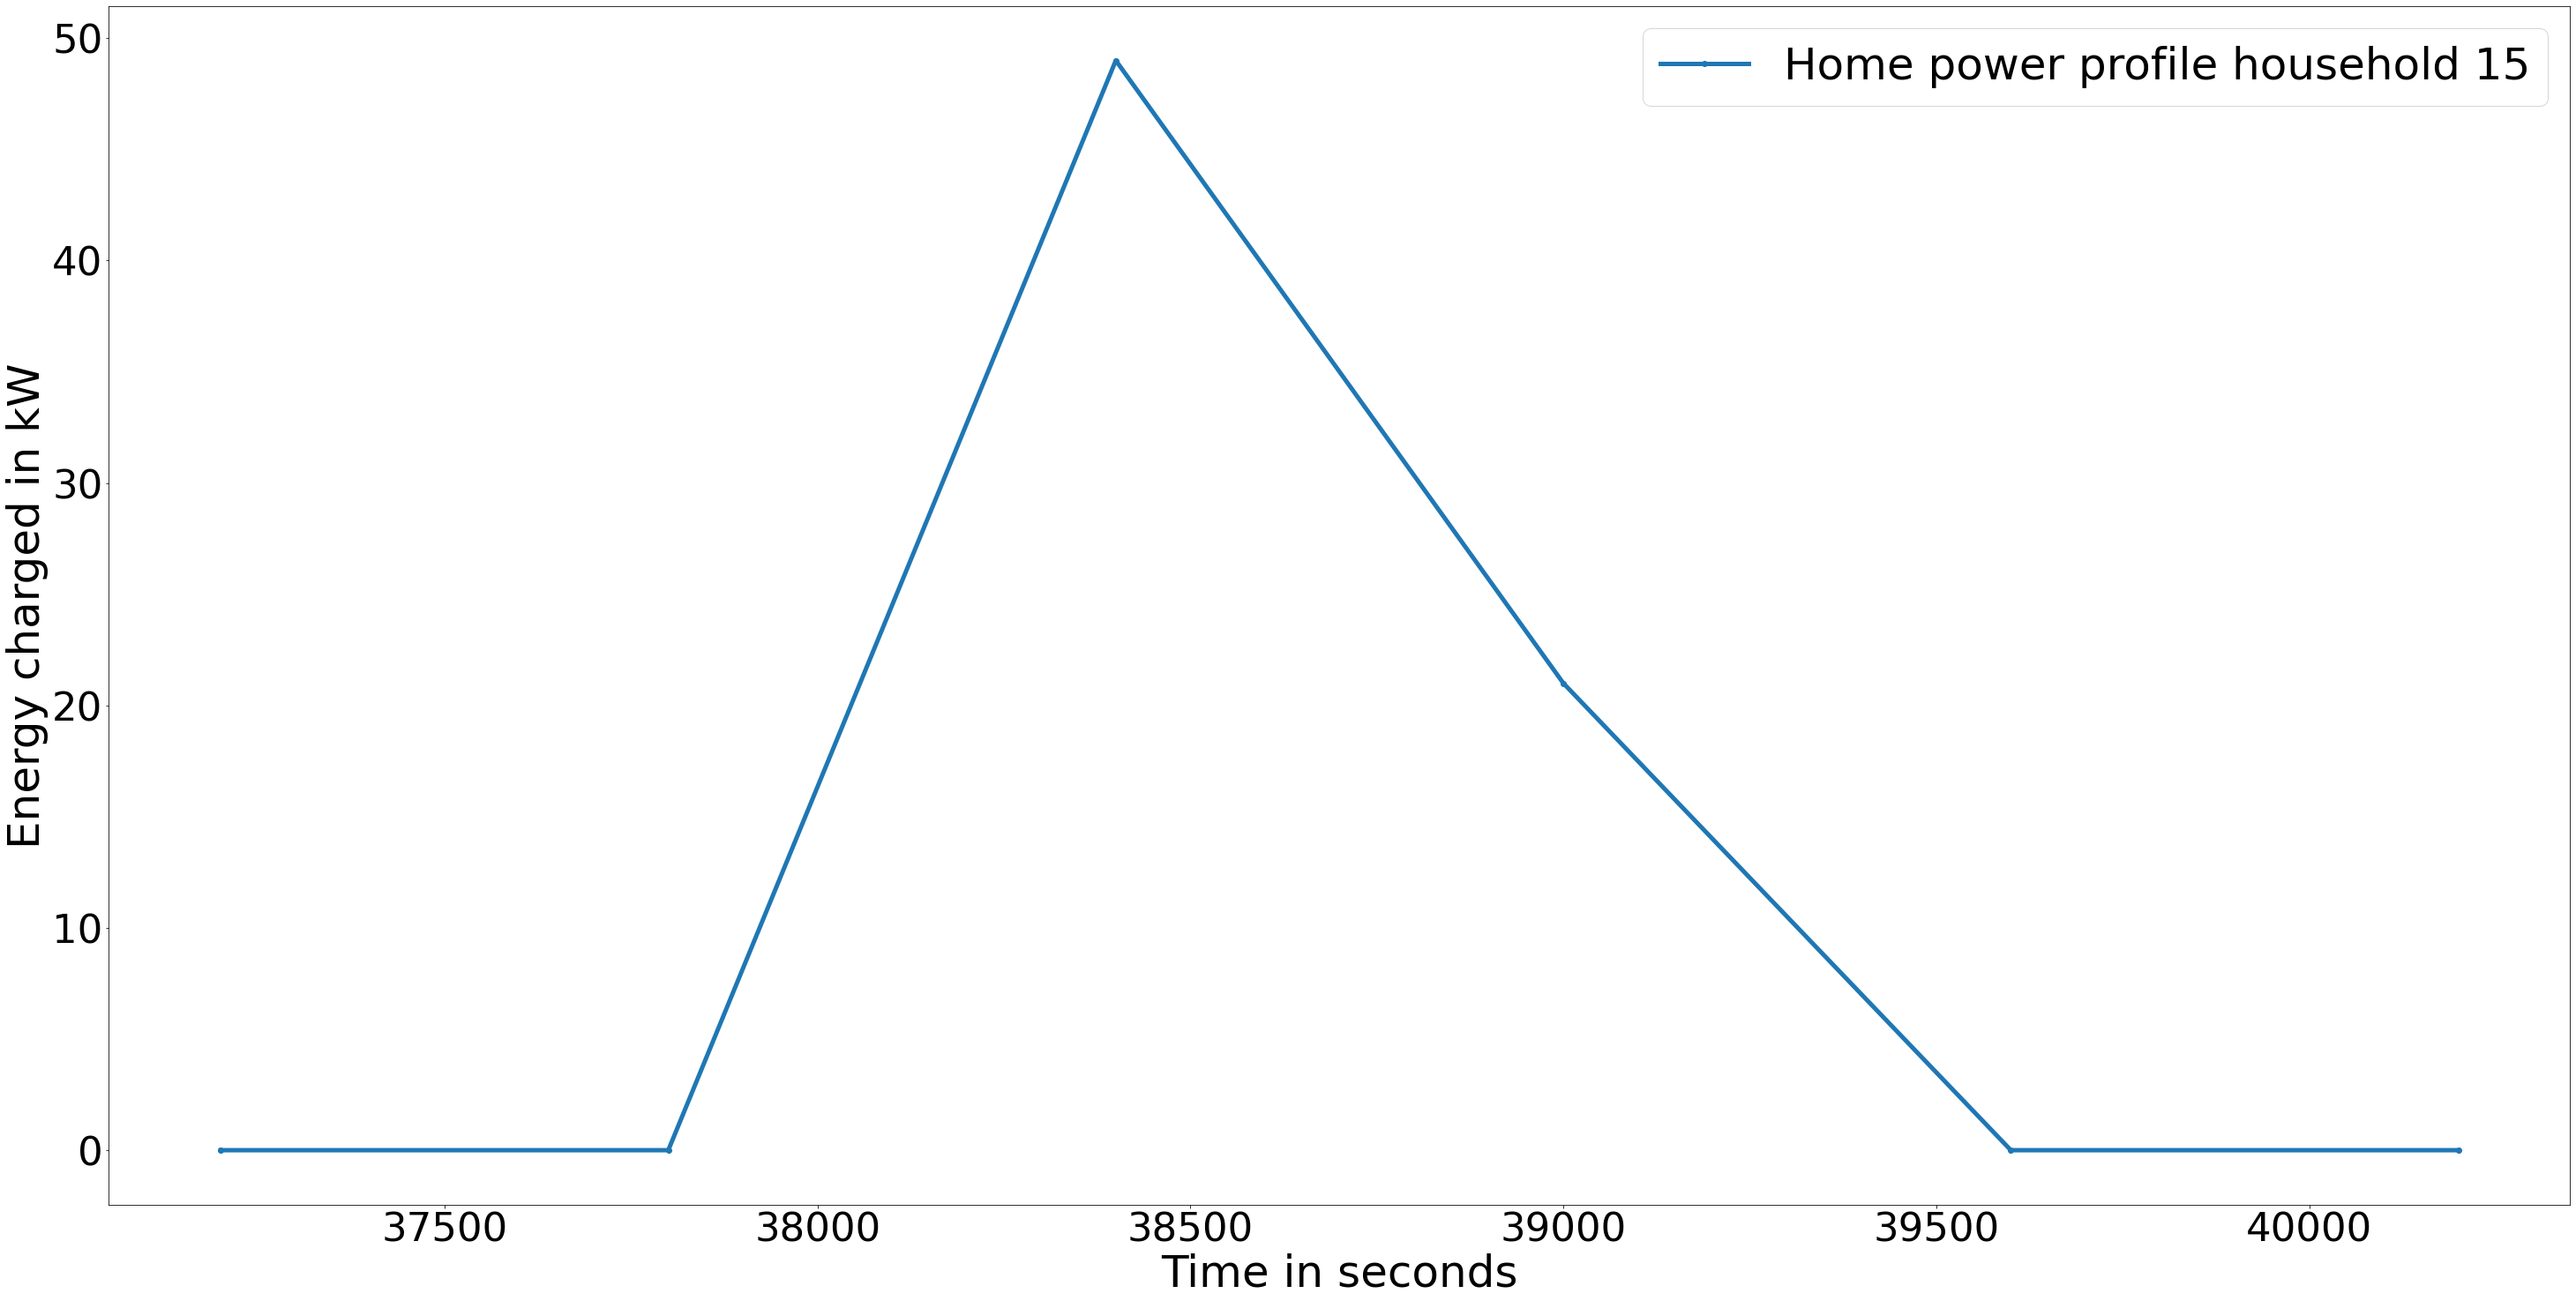

In [82]:
df_sum15.plot(x ='step', y='hh15_homecs', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Home power profile household 15'], fontsize=50)
plt.xlabel('Time in seconds', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()

In [83]:
df_sum16= df_sum[df_sum['charging_station'].str.contains("hh16_ev.*_homecs")]
df_sum16 = df_sum16.groupby(['step']).size().reset_index(name="count")
df_sum16['hh16_homecs'] = df_sum16['count'] * 7
df_sum16 = df_sum16.drop(df_sum16.columns[[1]], axis=1)
df_sum16

,step,hh16_homecs
0,31800,105
1,32400,196
2,33000,70
3,43200,133
4,43800,175
5,44400,63


In [84]:
new_row1 = {'step':31200, 'hh16_homecs':0}
new_row2 = {'step':30600, 'hh16_homecs':0}
new_row3 = {'step':45000, 'hh16_homecs':0}
new_row4 = {'step':45600, 'hh16_homecs':0}

new_row5 = {'step':33600, 'hh16_homecs':0}
new_row6 = {'step':34200, 'hh16_homecs':0}
new_row7 = {'step':34800, 'hh16_homecs':0}
new_row8 = {'step':35400, 'hh16_homecs':0}
new_row9 = {'step':36000, 'hh16_homecs':0}
new_row10 = {'step':36600, 'hh16_homecs':0}
new_row11 = {'step':37200, 'hh16_homecs':0}
new_row12 = {'step':37800, 'hh16_homecs':0}
new_row13 = {'step':38400, 'hh16_homecs':0}
new_row14 = {'step':39000, 'hh16_homecs':0}
new_row15 = {'step':39600, 'hh16_homecs':0}
new_row16 = {'step':40200, 'hh16_homecs':0}
new_row17 = {'step':40800, 'hh16_homecs':0}
new_row18 = {'step':41400, 'hh16_homecs':0}
new_row19 = {'step':42000, 'hh16_homecs':0}
new_row20 = {'step':42600, 'hh16_homecs':0}

#append row to the dataframe
df_sum16 = df_sum16.append(new_row1, ignore_index=True)
df_sum16 = df_sum16.append(new_row2, ignore_index=True)
df_sum16 = df_sum16.append(new_row3, ignore_index=True)
df_sum16 = df_sum16.append(new_row4, ignore_index=True)

df_sum16 = df_sum16.append(new_row5, ignore_index=True)
df_sum16 = df_sum16.append(new_row6, ignore_index=True)
df_sum16 = df_sum16.append(new_row7, ignore_index=True)
df_sum16 = df_sum16.append(new_row8, ignore_index=True)
df_sum16 = df_sum16.append(new_row9, ignore_index=True)
df_sum16 = df_sum16.append(new_row10, ignore_index=True)
df_sum16 = df_sum16.append(new_row11, ignore_index=True)
df_sum16 = df_sum16.append(new_row12, ignore_index=True)
df_sum16 = df_sum16.append(new_row13, ignore_index=True)
df_sum16 = df_sum16.append(new_row14, ignore_index=True)
df_sum16 = df_sum16.append(new_row15, ignore_index=True)
df_sum16 = df_sum16.append(new_row16, ignore_index=True)
df_sum16 = df_sum16.append(new_row17, ignore_index=True)
df_sum16 = df_sum16.append(new_row18, ignore_index=True)
df_sum16 = df_sum16.append(new_row19, ignore_index=True)
df_sum16 = df_sum16.append(new_row20, ignore_index=True)
df_sum16 = df_sum16.sort_values('step')
df_sum16

,step,hh16_homecs
7,30600,0
6,31200,0
0,31800,105
1,32400,196
2,33000,70
10,33600,0
11,34200,0
12,34800,0
13,35400,0
14,36000,0


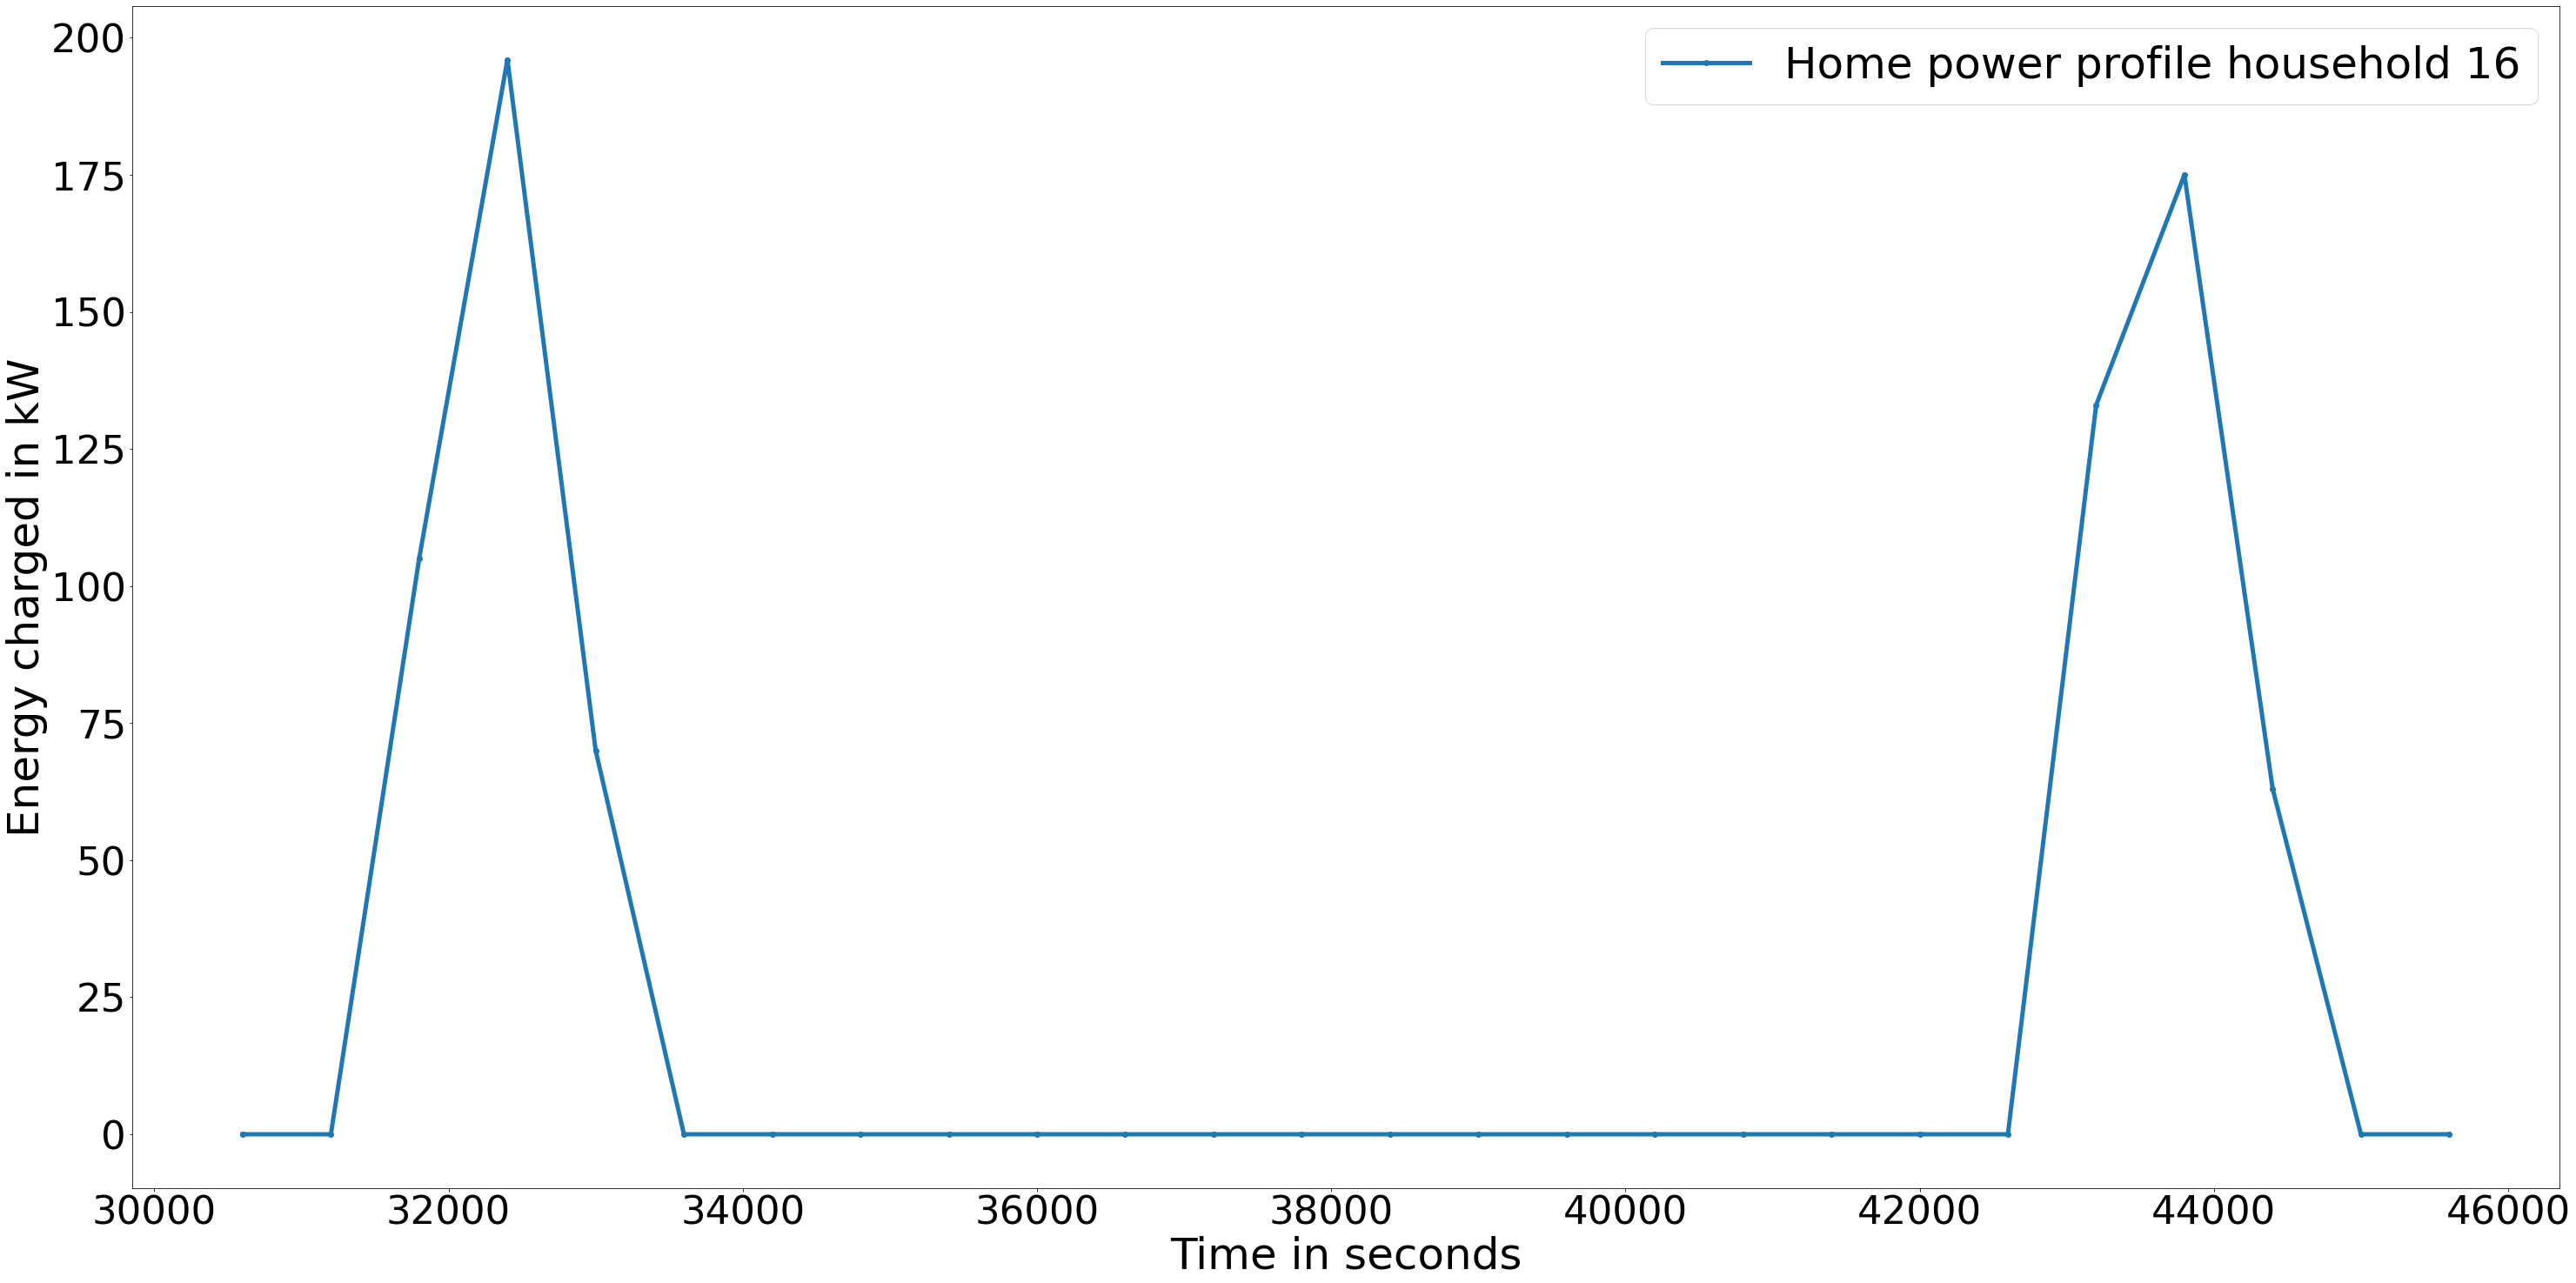

In [85]:
df_sum16.plot(x ='step', y='hh16_homecs', kind = 'line', lw = 5, figsize=(50,25), fontsize=45, style='o-')
plt.legend(['Home power profile household 16'], fontsize=50)
plt.xlabel('Time in seconds', fontsize=50)
plt.ylabel('Energy charged in kW', fontsize=50)
#plt.axhline(y=86.67, color='r', linestyle='-')
plt.show()